### Experiments for Reconstruction of networks using scoring with LSM or with random additions.

In [ ]:
# Ensure necessary packages are installed
!pip install cobra efmtool numpy pandas scipy

COBRApy definition of the DFKI toy network

In [1]:
import cobra
from cobra import Model, Reaction, Metabolite

# Modell erstellen
model = Model('Toy_Model')

# Metaboliten erstellen
A_EX = Metabolite('A_EX', compartment='e')
A = Metabolite('A', compartment='c')
B = Metabolite('B', compartment='c')
D = Metabolite('D', compartment='c')
E = Metabolite('E', compartment='c')
E_EX = Metabolite('E_EX', compartment='e')
F = Metabolite('F', compartment='c')
G = Metabolite('G', compartment='c')
H = Metabolite('H', compartment='c')
I = Metabolite('I', compartment='c')
J = Metabolite('J', compartment='c')
K = Metabolite('K', compartment='c')
L = Metabolite('L', compartment='c')
L_EX = Metabolite('L_EX', compartment='e')
M = Metabolite('M', compartment='c')
M_EX = Metabolite('M_EX', compartment='e')
N = Metabolite('N', compartment='c')
N_EX = Metabolite('N_EX', compartment='e')
O = Metabolite('O', compartment='c')
P = Metabolite('P', compartment='c')
P_EX = Metabolite('P_EX', compartment='e')

# Reaktionen erstellen
a_in = Reaction('A_in')
a_in.name = 'A_EX to A'
a_in.add_metabolites({A_EX: -1, A: 1})

reaction1 = Reaction('R1')
reaction1.name = 'A and G to B'
reaction1.add_metabolites({A: -1, G: -1, B: 1})

reaction2 = Reaction('R2')
reaction2.name = 'B to D'
reaction2.add_metabolites({B: -1, D: 1})

reaction3 = Reaction('R3')
reaction3.name = 'D to E and F'
reaction3.add_metabolites({D: -1, E: 1, F: 1})

reaction4 = Reaction('R4')
reaction4.name = 'B to I'
reaction4.add_metabolites({B: -1, I: 1})
reaction4.lower_bound= -1000.0

reaction5 = Reaction('R5')
reaction5.name = 'I to M and J'
reaction5.add_metabolites({I: -1, M: 1, J: 1})
reaction5.lower_bound= -1000.0

reaction6 = Reaction('R6')
reaction6.name = 'O to P and J'
reaction6.add_metabolites({O: -1, J: 1, P: 1})
reaction6.lower_bound= -1000.0

reaction7 = Reaction('R7')
reaction7.name = 'H to K and L'
reaction7.add_metabolites({H: -1, K: 1, L: 1})
reaction7.lower_bound= -1000.0

reaction8 = Reaction('R8')
reaction8.name = 'K and M to N'
reaction8.add_metabolites({K: -1, M: -1, N: 1})

reaction9 = Reaction('R9')
reaction9.name = 'A and J to I'
reaction9.add_metabolites({A: -1, J: -1, I: 1})
reaction9.lower_bound= -1000.0

reaction10 = Reaction('R10')
reaction10.name = 'F to G'
reaction10.add_metabolites({F: -1, G: 1})

reaction11 = Reaction('R11')
reaction11.name = 'E to H'
reaction11.add_metabolites({E: -1, H: 1})
reaction11.lower_bound= -1000.0

reaction12 = Reaction('R12')
reaction12.name = 'I to P'
reaction12.add_metabolites({I: -1, P: 1})
reaction12.lower_bound= -1000.0

reaction13 = Reaction('R13')
reaction13.name = 'O to M and L'
reaction13.add_metabolites({O: -1, M: 1, L: 1})
reaction13.lower_bound= -1000.0

reaction14 = Reaction('R14')
reaction14.name = 'P to K'
reaction14.add_metabolites({P: -1, K: 1})
reaction14.lower_bound= -1000.0


E_EX_out = Reaction('E_EX_out')
E_EX_out.name = 'E to E_EX'
E_EX_out.add_metabolites({E: -1, E_EX: 1})

L_EX_out = Reaction('L_EX_out')
L_EX_out.name = 'L to L_EX'
L_EX_out.add_metabolites({L: -1, L_EX: 1})

M_EX_out = Reaction('M_EX_out')
M_EX_out.name = 'M to M_EX'
M_EX_out.add_metabolites({M: -1, M_EX: 1})

N_EX_out = Reaction('N_EX_out')
N_EX_out.name = 'N to N_EX'
N_EX_out.add_metabolites({N: -1, N_EX: 1})

P_EX_out = Reaction('P_EX_out')
P_EX_out.name = 'P to P_EX'
P_EX_out.add_metabolites({P: -1, P_EX: 1})

# Reaktionen zum Modell hinzufügen
model.add_reactions([a_in, reaction1, reaction2, reaction3, reaction4, reaction5, 
                     reaction6, reaction7, reaction8, reaction9, reaction10,
                     reaction11, reaction12, reaction13, reaction14, E_EX_out, L_EX_out, M_EX_out, N_EX_out, P_EX_out])

# Exchange Reaktionen für extracelluläre Metaboliten
#model.add_boundary(A_EX, type="exchange")
#model.add_boundary(E_EX, type="exchange")
#model.add_boundary(L_EX, type="exchange")
#model.add_boundary(M_EX, type="exchange")
#model.add_boundary(N_EX, type="exchange")
#model.add_boundary(P_EX, type="exchange")

# Modellinformationen ausgeben
print("Reaktionen im Modell:", len(model.reactions))
print("Metaboliten im Modell:", len(model.metabolites))
print("Gene im Modell:", len(model.genes))


Reaktionen im Modell: 20
Metaboliten im Modell: 21
Gene im Modell: 0


Method to retrieve the stochiometric matrix of a COBRApy model.

In [2]:
import numpy as np
import cobra


def get_stoichiometric_matrix(model):
    # Filtere die Reaktionen, um nur Reaktionen zu behalten, die nicht mit "EX_" beginnen
    internal_reactions = [rxn for rxn in model.reactions if not rxn.id.startswith("EX_")]

    # Extrahiere die Metaboliten aus dem Modell
    internal_metabolites = [meta for meta in model.metabolites if not meta.compartment == 'e']

    # Erstelle die leere Stöchiometrie-Matrix mit (Anzahl der Metaboliten, Anzahl der internen Reaktionen)
    stoichiometric_matrix = np.zeros((len(internal_metabolites), len(internal_reactions)))

    # Befülle die Stöchiometrie-Matrix so, dass jede Spalte eine Reaktion repräsentiert
    for j, rxn in enumerate(internal_reactions):  # Spaltenweise über Reaktionen iterieren
        for i, met in enumerate(internal_metabolites):  # Zeilenweise über Metaboliten iterieren
            stoichiometric_matrix[i, j] = rxn.metabolites.get(met, 0)  # Falls Metabolit nicht in der Reaktion ist, wird 0 zurückgegeben
    return stoichiometric_matrix


In [3]:
stoichiometry=get_stoichiometric_matrix(model)
print("Stoichiometric matrix shape:", stoichiometry.shape)
print("Stoichiometric matrix:", stoichiometry)


Stoichiometric matrix shape: (15, 20)
Stoichiometric matrix: [[ 1. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.
   0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0. -1.
   0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.
   0. -1.]
 [ 0

Definition of the Datapoints from Elementary Flux Modes

In [5]:
# Liste der experimentellen Datenpunkten mit eingefügten 0 für Produkte, die nicht erzeugt werden.
experimental_data_zeropadded_out = [
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0},
    {'A_in':1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}
]

Method to calculate the Fit-Score of a model for some experimental data

In [57]:
import numpy as np
from scipy.optimize import lsq_linear
from scipy.optimize import minimize





#print(reaction_ids)
# Funktion zur Ableitung des Zielvektors aus den experimentellen Daten
def create_target_vector(data_point, reaction_ids):
    target_flux = np.full(len(reaction_ids), np.nan)  # Vektor mit NaN initialisieren
    for rxn_id, value in data_point.items():
        if rxn_id in reaction_ids:  # Nur Reaktionen, die im Modell existieren
            idx = reaction_ids.index(rxn_id)
            target_flux[idx] = value  # Setze den Zielwert
    return target_flux


def least_square_min(model, S, experimental_data):
    reaction_ids = [rxn.id for rxn in model.reactions if not rxn.id.startswith("EX_")]
    total_score = 0.0
    successful_optimizations = 0

    for data_point in experimental_data:
        # Zielvektor für aktuellen Datenpunkt erstellen
        target_flux = create_target_vector(data_point, reaction_ids)

        # Filter für bekannte Flüsse (Reaktionen, die in 'target_flux' nicht NaN sind)
        known_flux_indices = ~np.isnan(target_flux)
        target_flux_values = target_flux[known_flux_indices]

        def objective(x):
            return np.linalg.norm(x[known_flux_indices] - target_flux_values)

        constraints = {'type': 'eq', 'fun': lambda x: np.dot(S, x)}

        initial_guess = np.zeros(len(reaction_ids))
        bounds = [(model.reactions.get_by_id(rxn_id).lower_bound,
                   model.reactions.get_by_id(rxn_id).upper_bound)
                  for rxn_id in reaction_ids]

        result = minimize(objective, initial_guess, constraints=constraints, bounds=bounds, tol=1e-10)

        if result.success:
            optimized_flux = result.x
            total_score += np.linalg.norm(optimized_flux[known_flux_indices] - target_flux_values)
            successful_optimizations += 1
        else:
            print(f"Optimization failed for data point: {data_point}. Message: {result.message}")

    # Return None if any optimization failed, otherwise the total score
    if successful_optimizations < len(experimental_data):
        return 0.0, len(experimental_data)
    else:
        return total_score, len(experimental_data)

 
S = get_stoichiometric_matrix(model)
print(least_square_min(model, S, experimental_data_zeropadded_out))

(7.084858411749409e-08, 11)


Method to generate random reactions for metabolites from the model.

In [71]:
import random
from cobra import Reaction

# Erstellen von Reaktionen mit 1-2 Substrat(en) und 1-2 Produkt(en)
def generate_random_reactions(model, num_reactions=2000):
    # Filter out metabolites that end with '_EX'
    metabolites = [met for met in model.metabolites if not met.compartment == 'e']
    random_reactions = []

    for i in range(num_reactions):
        reaction_valid = False

        while not reaction_valid:
            # Zufällige Auswahl der Anzahl an Substraten und Produkten
            num_reactants = random.randint(1, 2)
            num_products = random.randint(1, 2)

            # Zufällige Auswahl der Substrate und Produkte
            reactants = random.sample(metabolites, num_reactants)
            products = random.sample(metabolites, num_products)

            # Check, dass auf beiden Seiten Metaboliten vorhanden sind
            if set(reactants).isdisjoint(set(products)):
                reaction_valid = True

                # Erstellung der Reaktion
                reaction = Reaction(f'Random_Rxn_{i+1}')
                reaction.name = f'Random Reaction {i+1}'

                reaction.add_metabolites({
                    met: -1.0 for met in reactants
                })
                reaction.add_metabolites({
                    met: 1.0 for met in products
                })

                # 50% Chance, die Reaktion reversibel zu machen
                if random.random() < 0.5:
                    reaction.lower_bound = -1000.0
                else:
                    reaction.lower_bound = 0.0

                reaction.upper_bound = 1000.0

                random_reactions.append(reaction)

    return random_reactions

# Generierung von 2000 zufälligen Reaktionen + den Inversen
random_reactions_list = generate_random_reactions(model, num_reactions=2000)

# Anzahl der insgesamt generierten Reaktionen
print(f"\nTotal number of random reactions generated: {len(random_reactions_list)}")


Total number of random reactions generated: 2000


Methods to sample reactions (either from a model or from a list):

In [8]:
import cobra
import random

def sample_reactions(model, n_reactions):

    # Filter reactions that do not end with '_in' or '_out'
    valid_reactions = [rxn for rxn in model.reactions if not rxn.id.endswith('_in') and not rxn.id.endswith('_out')]

    # Ensure that the model has enough valid reactions
    if n_reactions > len(valid_reactions):
        raise ValueError("Requested number of reactions exceeds the total number of valid reactions in the model")

    # Sample reactions randomly from the valid reactions list
    sampled_reactions = random.sample(valid_reactions, n_reactions)

    for rxn in sampled_reactions:
        print(rxn.id)
    
    return sampled_reactions


In [9]:
import random

def sample_reactions_from_list(reactions_list, n_reactions):

    # Ensure the list has enough reactions to sample from
    if n_reactions > len(reactions_list):
        raise ValueError("Requested number of reactions exceeds the total number of reactions in the list")

    # Sample reactions randomly from the given list
    sampled_reactions = random.sample(reactions_list, n_reactions)

    for rxn in sampled_reactions:
        print(rxn.id if hasattr(rxn, 'id') else rxn)  # Print the ID if the object has one

    return sampled_reactions


Method to calculate the Model-Score between two models.

In [10]:
def model_edit_distance(model1, model2):
    
    # Get sets of reaction IDs for both models
    reactions_model1 = {rxn.id for rxn in model1.reactions}
    reactions_model2 = {rxn.id for rxn in model2.reactions}
    
    # Calculate the symmetric difference (reactions present in one model but not the other)
    differing_reactions = reactions_model1.symmetric_difference(reactions_model2)
    
    # The edit distance is the number of differing reactions
    edit_distance = len(differing_reactions)
    
    return edit_distance



In [11]:
import pandas as pd

def filter_and_display(list1, list2, list3):
    
    # Erstellen des DataFrames
    df = pd.DataFrame({'Scores': list1, 'Edit Distances': list2, 'Computation Count': list3})
    
    # Filtern: Entfernen von Zeilen mit NaN oder 0.0 in der ersten Liste
    filtered_df = df.dropna(subset=['Scores'])
    filtered_df = filtered_df[filtered_df['Scores'] != 0.0]
    
    # Ergebnis zurückgeben oder anzeigen
    return filtered_df




In [12]:
import cobra

def find_no_production_roots(model):
    
    # Lists for results
    upstream_no_consumption_roots = []
    downstream_no_production_roots = []

    # Initialize dictionaries for production and consumption of metabolites
    metabolite_produced = {met: False for met in model.metabolites if met.compartment == 'c'}
    metabolite_consumed = {met: False for met in model.metabolites if met.compartment == 'c'}

    # Iterate over all reactions in the model
    for reaction in model.reactions:
        if reaction.reversibility:
            # If reversible, treat all metabolites as both reactants and products
            for met in reaction.metabolites:
                metabolite_produced[met] = True
                metabolite_consumed[met] = True
        else:
            # Metabolites produced in this reaction
            for product in reaction.products:
                if product.compartment == 'c':  # Only consider intracellular metabolites
                    metabolite_produced[product] = True

            # Metabolites consumed in this reaction
            for reactant in reaction.reactants:
                if reactant.compartment == 'c':  # Only consider intracellular metabolites
                    metabolite_consumed[reactant] = True

    # Determine Upstream No-Consumption Roots (produced but not consumed)
    for met, produced in metabolite_produced.items():
        if produced and not metabolite_consumed[met]:
            upstream_no_consumption_roots.append(met.id)

    # Determine Downstream No-Production Roots (consumed but not produced)
    for met, consumed in metabolite_consumed.items():
        if consumed and not metabolite_produced[met]:
            downstream_no_production_roots.append(met.id)

    print("Upstream No-Consumption Roots:", upstream_no_consumption_roots)
    print("Downstream No-Production Roots:", downstream_no_production_roots)

    return len(upstream_no_consumption_roots) + len(downstream_no_production_roots)


num_roots = find_no_production_roots(model)
print("Total no-production roots:", num_roots)


Upstream No-Consumption Roots: []
Downstream No-Production Roots: []
Total no-production roots: 0


Method to search reaction with best score after addition to a model.

In [56]:
def score_reaction_lsm(model, reaction, experimental_data):
    # Kopiere das Modell und füge die Reaktion hinzu
    with model:
        model.add_reactions([reaction])
        S = get_stoichiometric_matrix(model)
        score, _ = least_square_min(model, S, experimental_data)
    return score

def add_best_reaction_lsm_chance_random(original_model, experimental_data, random_reactions_list, max_iterations=1):
    # Kopiere das Modell
    model = original_model.copy()

    ccs = 0

    S = get_stoichiometric_matrix(model)
    ini_score, cc = least_square_min(model, S, experimental_data)
    ccs += cc
    print(f"Score before addition: {ini_score}")
    if ini_score == 0.0:
        print(f"Model not solvable: {ini_score}")
        return ini_score, original_model, ccs

    iteration = 0
    while ini_score > 0 and iteration < max_iterations:
        if not random_reactions_list:
            print("No more random reactions to add.")
            break

        # Scoring der Reaktionen
        reaction_scores = {
            reaction.id: score
            for reaction in random_reactions_list
            if (score := score_reaction_lsm(model, reaction, experimental_data)) < ini_score and score > 0.0
        }
        ccs += len(experimental_data) * len(random_reactions_list)

        # Auswahl der besten Reaktion basierend auf dem Score
        if reaction_scores:
            best_reaction_id = min(reaction_scores, key=reaction_scores.get)

            best_reaction = next(r for r in random_reactions_list if r.id == best_reaction_id)
            ini_score = reaction_scores[best_reaction_id]

            print(f"Adding reaction: {best_reaction.id} with score: {reaction_scores[best_reaction_id]}")
            model.add_reactions([best_reaction])
            random_reactions_list.remove(best_reaction)
        else:
            print("No reactions with improvements found")
            break

        iteration += 1

    return ini_score, model, ccs

Reconstruction algorithm:

In [68]:
import time
import numpy as np
import random

def evaluate_score_random_evolution(test_model, experimental_data, sampling_size, num_iterations, chance_random):
    min_value = 0.0
    max_value = 1.0

    # Validate the `chance_random` parameter
    if not (min_value <= chance_random <= max_value):
        raise ValueError(f"Argument 'chance_random' must be between {min_value} and {max_value}. Given: {chance_random}")
    
    scores = np.zeros(num_iterations)
    edit_distances = np.zeros(num_iterations)
    counts_computations = np.zeros(num_iterations)
    score_evolutions = []  # To store the evolution of scores for each iteration
    
    for i in range(num_iterations):
        count_computations = 0
        
        # Step 1: Copy model and remove reactions
        model = test_model.copy()
        
        reactions_to_remove = sample_reactions(model, sampling_size)
        removed_reactions = [model.reactions.get_by_id(reaction.id) for reaction in reactions_to_remove]
        model.remove_reactions(reactions_to_remove)
        random_reactions = generate_random_reactions(model, 50)
        random_reactions.extend(removed_reactions) # Include removed reactions in the pool
        print(random_reactions)
        input_model = model.copy()
        # Step 2: Initial score computation
        S = get_stoichiometric_matrix(model)
        score, cc = least_square_min(model, S, experimental_data)
        count_computations += cc
        if score == 0.0:
            score = 1000.0
        
        # Track the evolution of scores
        score_evolution = [score]  # Start with the initial score
        
        # Step 3: Modify model until score meets criteria
        while score > 3e-7:
            decision_value = random.uniform(0.0, 1.0)
            if decision_value < chance_random:
                # Add a random reaction
                random_reaction = random.choice(random_reactions)
                model.add_reactions([random_reaction])
                random_reactions.remove(random_reaction)
            else:
                # Add the best reaction based on LSM
                score, model, cc = add_best_reaction_lsm_chance_random(model, experimental_data, random_reactions)
                count_computations += cc
            
            # Recompute the score
            S = get_stoichiometric_matrix(model)
            score, cc = least_square_min(model, S, experimental_data)
            count_computations += cc
            # Track the score after each addition
            score_evolution.append(score)
            
        
        # Step 4: Store final results
        scores[i] = score if score != 0.0 else None
        edit_distance = model_edit_distance(input_model, model)
        edit_distances[i] = edit_distance
        
        
        counts_computations[i] = count_computations
        
        # Store the score evolution for this iteration
        score_evolutions.append(score_evolution)
        
        
        print(filter_and_display(scores, edit_distances, counts_computations))
    
    # Return all results, including score evolutions
    return scores, edit_distances, counts_computations, score_evolutions


In [16]:
import pandas as pd

def display4(list1, list2, list3, list4):
    
    # Erstellen des DataFrames
    df = pd.DataFrame({'Scores': list1, 'Edit Distances': list2, 'Number of LSQ Computations': list3, 'Score Evolutions': list4})
    
    # Filtern: Entfernen von Zeilen mit NaN oder 0.0 in der ersten Liste
    filtered_df = df.dropna(subset=['Scores'])
    filtered_df = filtered_df[filtered_df['Scores'] != 0.0]
    
    # Ergebnis zurückgeben oder anzeigen
    return filtered_df


Example Usage:

In [70]:
result_dataframes_with_ct = []

for i in range(11):
    scores, edit_distances, computation_times = evaluate_score_random_evolution(model, experimental_data_zeropadded_out, 2, 2, i * 0.1)
    print(len(scores))
    print(len(edit_distances))
    print(len(computation_times))
    df = filter_and_display(scores, edit_distances, computation_times)
    result_dataframes_with_ct.append(df)

R11
R13
[<Reaction Random_Rxn_1 at 0x28e7faa10>, <Reaction Random_Rxn_2 at 0x280f78050>, <Reaction Random_Rxn_3 at 0x28e7fa350>, <Reaction Random_Rxn_4 at 0x17f576f50>, <Reaction Random_Rxn_5 at 0x17f43cc50>, <Reaction Random_Rxn_6 at 0x280f62350>, <Reaction Random_Rxn_7 at 0x28e7fb190>, <Reaction Random_Rxn_8 at 0x17f43ea50>, <Reaction Random_Rxn_9 at 0x17f43fdd0>, <Reaction Random_Rxn_10 at 0x17f43e5d0>, <Reaction Random_Rxn_11 at 0x17f43e410>, <Reaction Random_Rxn_12 at 0x17f43cfd0>, <Reaction Random_Rxn_13 at 0x17f43d1d0>, <Reaction Random_Rxn_14 at 0x17f43fe50>, <Reaction Random_Rxn_15 at 0x284b9f150>, <Reaction Random_Rxn_16 at 0x284b9f350>, <Reaction Random_Rxn_17 at 0x284b9e010>, <Reaction Random_Rxn_18 at 0x284b9ce10>, <Reaction Random_Rxn_19 at 0x284b9cf10>, <Reaction Random_Rxn_20 at 0x284b9da10>, <Reaction Random_Rxn_21 at 0x284b9e510>, <Reaction Random_Rxn_22 at 0x284b9dc50>, <Reaction Random_Rxn_23 at 0x284b9e8d0>, <Reaction Random_Rxn_24 at 0x284b9fe10>, <Reaction Random

ValueError: too many values to unpack (expected 3)

In [74]:
random.seed(42)
np.random.seed(42)

In [75]:
results_dataframes_efm_seed42_evo = []
for j in range(1,4):
    for i in range(11):
        scores, edit_distances, computation_times, score_evos = evaluate_score_random_evolution(model, experimental_data_zeropadded_out, j, 10, i * 0.1)
        df = display4(scores, edit_distances, computation_times, score_evos)
        results_dataframes_efm_seed42_evo.append({"num_reacs": j, "cr": i, "dataframe": df})

R11
[<Reaction Random_Rxn_1 at 0x2816e5d90>, <Reaction Random_Rxn_2 at 0x282d204d0>, <Reaction Random_Rxn_3 at 0x28279ecd0>, <Reaction Random_Rxn_4 at 0x282d20d10>, <Reaction Random_Rxn_5 at 0x17f39a690>, <Reaction Random_Rxn_6 at 0x282d20250>, <Reaction Random_Rxn_7 at 0x282d23650>, <Reaction Random_Rxn_8 at 0x282d21290>, <Reaction Random_Rxn_9 at 0x282d235d0>, <Reaction Random_Rxn_10 at 0x282d21b10>, <Reaction Random_Rxn_11 at 0x282d22190>, <Reaction Random_Rxn_12 at 0x282d23490>, <Reaction Random_Rxn_13 at 0x282d20890>, <Reaction Random_Rxn_14 at 0x282d23e50>, <Reaction Random_Rxn_15 at 0x282d21090>, <Reaction Random_Rxn_16 at 0x28271c6d0>, <Reaction Random_Rxn_17 at 0x282d20210>, <Reaction Random_Rxn_18 at 0x28271eb90>, <Reaction Random_Rxn_19 at 0x28271e1d0>, <Reaction Random_Rxn_20 at 0x282d20bd0>, <Reaction Random_Rxn_21 at 0x28271f490>, <Reaction Random_Rxn_22 at 0x28271e5d0>, <Reaction Random_Rxn_23 at 0x28271f590>, <Reaction Random_Rxn_24 at 0x28271dc50>, <Reaction Random_Rxn

Adding reaction: Random_Rxn_4 with score: 6.162919600472998e-08
         Scores  Edit Distances  Computation Count
0  4.397550e-08             1.0              594.0
1  5.165568e-08             1.0              594.0
2  4.569559e-08             1.0              594.0
3  6.162920e-08             1.0              594.0
R13
[<Reaction Random_Rxn_1 at 0x28327b690>, <Reaction Random_Rxn_2 at 0x2832c3b50>, <Reaction Random_Rxn_3 at 0x282751090>, <Reaction Random_Rxn_4 at 0x282752ed0>, <Reaction Random_Rxn_5 at 0x282751990>, <Reaction Random_Rxn_6 at 0x2832fe310>, <Reaction Random_Rxn_7 at 0x2832fc910>, <Reaction Random_Rxn_8 at 0x2832fc050>, <Reaction Random_Rxn_9 at 0x2832c17d0>, <Reaction Random_Rxn_10 at 0x2832fef90>, <Reaction Random_Rxn_11 at 0x280d5d510>, <Reaction Random_Rxn_12 at 0x280d5c790>, <Reaction Random_Rxn_13 at 0x280d5c390>, <Reaction Random_Rxn_14 at 0x28200da10>, <Reaction Random_Rxn_15 at 0x28200f210>, <Reaction Random_Rxn_16 at 0x2832fd9d0>, <Reaction Random_Rxn_17 at 0x

Score before addition: 3.181980548057406
Adding reaction: R8 with score: 7.090562214779213e-08
         Scores  Edit Distances  Computation Count
0  4.397550e-08             1.0              594.0
1  5.165568e-08             1.0              594.0
2  4.569559e-08             1.0              594.0
3  6.162920e-08             1.0              594.0
4  5.383569e-08             1.0              594.0
8  7.090562e-08             1.0              594.0
R10
[<Reaction Random_Rxn_1 at 0x2826acbd0>, <Reaction Random_Rxn_2 at 0x2826dff50>, <Reaction Random_Rxn_3 at 0x2826debd0>, <Reaction Random_Rxn_4 at 0x2826c4b90>, <Reaction Random_Rxn_5 at 0x2826ac1d0>, <Reaction Random_Rxn_6 at 0x28146db10>, <Reaction Random_Rxn_7 at 0x2826c7890>, <Reaction Random_Rxn_8 at 0x2826c7390>, <Reaction Random_Rxn_9 at 0x282647f10>, <Reaction Random_Rxn_10 at 0x2826471d0>, <Reaction Random_Rxn_11 at 0x282647310>, <Reaction Random_Rxn_12 at 0x2826453d0>, <Reaction Random_Rxn_13 at 0x2826ebf10>, <Reaction Random_Rx

Adding reaction: Random_Rxn_8 with score: 4.3975511866335474e-08
         Scores  Edit Distances  Computation Count
0  4.397551e-08             1.0              594.0
R7
[<Reaction Random_Rxn_1 at 0x283279910>, <Reaction Random_Rxn_2 at 0x280d95f10>, <Reaction Random_Rxn_3 at 0x281486050>, <Reaction Random_Rxn_4 at 0x282082710>, <Reaction Random_Rxn_5 at 0x280d960d0>, <Reaction Random_Rxn_6 at 0x28200cbd0>, <Reaction Random_Rxn_7 at 0x28200e890>, <Reaction Random_Rxn_8 at 0x28305e3d0>, <Reaction Random_Rxn_9 at 0x282dc2350>, <Reaction Random_Rxn_10 at 0x282081dd0>, <Reaction Random_Rxn_11 at 0x28200c490>, <Reaction Random_Rxn_12 at 0x28200d010>, <Reaction Random_Rxn_13 at 0x2826b44d0>, <Reaction Random_Rxn_14 at 0x282081e50>, <Reaction Random_Rxn_15 at 0x2826b4350>, <Reaction Random_Rxn_16 at 0x2826b4f90>, <Reaction Random_Rxn_17 at 0x280d94250>, <Reaction Random_Rxn_18 at 0x2826b7d90>, <Reaction Random_Rxn_19 at 0x2826b57d0>, <Reaction Random_Rxn_20 at 0x2826b7450>, <Reaction Random_R

Adding reaction: Random_Rxn_39 with score: 3.783676899441776e-08
         Scores  Edit Distances  Computation Count
0  4.397551e-08             1.0              594.0
1  6.125546e-08             1.0              594.0
2  4.345968e-08             1.0              594.0
3  4.119087e-08             1.0              594.0
4  3.783677e-08             1.0              594.0
R3
[<Reaction Random_Rxn_1 at 0x282d73ed0>, <Reaction Random_Rxn_2 at 0x282d086d0>, <Reaction Random_Rxn_3 at 0x282d3f190>, <Reaction Random_Rxn_4 at 0x282d3f090>, <Reaction Random_Rxn_5 at 0x282d3f510>, <Reaction Random_Rxn_6 at 0x282d872d0>, <Reaction Random_Rxn_7 at 0x282d86d90>, <Reaction Random_Rxn_8 at 0x282d87710>, <Reaction Random_Rxn_9 at 0x2826b7590>, <Reaction Random_Rxn_10 at 0x2826b6ed0>, <Reaction Random_Rxn_11 at 0x282d9f510>, <Reaction Random_Rxn_12 at 0x282d9c910>, <Reaction Random_Rxn_13 at 0x280d95290>, <Reaction Random_Rxn_14 at 0x280d96910>, <Reaction Random_Rxn_15 at 0x2826b6d90>, <Reaction Random_Rx

Adding reaction: Random_Rxn_17 with score: 4.2646578256266274e-08
         Scores  Edit Distances  Computation Count
0  4.397551e-08             1.0              594.0
1  6.125546e-08             1.0              594.0
2  4.345968e-08             1.0              594.0
3  4.119087e-08             1.0              594.0
4  3.783677e-08             1.0              594.0
6  4.264658e-08             1.0              594.0
R9
[<Reaction Random_Rxn_1 at 0x28103f290>, <Reaction Random_Rxn_2 at 0x2810bb410>, <Reaction Random_Rxn_3 at 0x2810bf390>, <Reaction Random_Rxn_4 at 0x2810bda10>, <Reaction Random_Rxn_5 at 0x2810bdc10>, <Reaction Random_Rxn_6 at 0x2810be450>, <Reaction Random_Rxn_7 at 0x2810bc3d0>, <Reaction Random_Rxn_8 at 0x2810be3d0>, <Reaction Random_Rxn_9 at 0x2810bea90>, <Reaction Random_Rxn_10 at 0x2810bf590>, <Reaction Random_Rxn_11 at 0x2810bf010>, <Reaction Random_Rxn_12 at 0x2810ff310>, <Reaction Random_Rxn_13 at 0x281063ed0>, <Reaction Random_Rxn_14 at 0x2826ac390>, <Reactio

         Scores  Edit Distances  Computation Count
1  5.784572e-08             1.0               22.0
R12
[<Reaction Random_Rxn_1 at 0x2810d5f10>, <Reaction Random_Rxn_2 at 0x281487c10>, <Reaction Random_Rxn_3 at 0x281481650>, <Reaction Random_Rxn_4 at 0x281484e90>, <Reaction Random_Rxn_5 at 0x2826c5c50>, <Reaction Random_Rxn_6 at 0x2826c5a90>, <Reaction Random_Rxn_7 at 0x2826c4950>, <Reaction Random_Rxn_8 at 0x2826c7310>, <Reaction Random_Rxn_9 at 0x281481a10>, <Reaction Random_Rxn_10 at 0x2814851d0>, <Reaction Random_Rxn_11 at 0x2826c5f10>, <Reaction Random_Rxn_12 at 0x281487e90>, <Reaction Random_Rxn_13 at 0x281481750>, <Reaction Random_Rxn_14 at 0x2826c5350>, <Reaction Random_Rxn_15 at 0x2826c7ad0>, <Reaction Random_Rxn_16 at 0x2826c6bd0>, <Reaction Random_Rxn_17 at 0x2826c7350>, <Reaction Random_Rxn_18 at 0x282db53d0>, <Reaction Random_Rxn_19 at 0x2826c4290>, <Reaction Random_Rxn_20 at 0x2826c5710>, <Reaction Random_Rxn_21 at 0x282db4d90>, <Reaction Random_Rxn_22 at 0x282db72d0>, 

Adding reaction: Random_Rxn_6 with score: 3.3857951442952523e-08
         Scores  Edit Distances  Computation Count
1  5.784572e-08             1.0               22.0
2  6.401840e-08             2.0              594.0
4  3.385795e-08             1.0              594.0
R8
[<Reaction Random_Rxn_1 at 0x282570d90>, <Reaction Random_Rxn_2 at 0x2816fd4d0>, <Reaction Random_Rxn_3 at 0x2825737d0>, <Reaction Random_Rxn_4 at 0x282db6450>, <Reaction Random_Rxn_5 at 0x282db4410>, <Reaction Random_Rxn_6 at 0x282db6990>, <Reaction Random_Rxn_7 at 0x282db5150>, <Reaction Random_Rxn_8 at 0x282db6f10>, <Reaction Random_Rxn_9 at 0x282db7690>, <Reaction Random_Rxn_10 at 0x2810d5f10>, <Reaction Random_Rxn_11 at 0x282e4cd10>, <Reaction Random_Rxn_12 at 0x2810bb490>, <Reaction Random_Rxn_13 at 0x282db4bd0>, <Reaction Random_Rxn_14 at 0x282db6e90>, <Reaction Random_Rxn_15 at 0x281480b10>, <Reaction Random_Rxn_16 at 0x282686d10>, <Reaction Random_Rxn_17 at 0x282685910>, <Reaction Random_Rxn_18 at 0x282e4d790>

Adding reaction: Random_Rxn_44 with score: 3.9639311636446056e-08
         Scores  Edit Distances  Computation Count
1  5.784572e-08             1.0               22.0
2  6.401840e-08             2.0              594.0
4  3.385795e-08             1.0              594.0
5  5.996215e-08             2.0              594.0
7  3.963931e-08             1.0              594.0
R8
[<Reaction Random_Rxn_1 at 0x282957f50>, <Reaction Random_Rxn_2 at 0x281645d50>, <Reaction Random_Rxn_3 at 0x2829c08d0>, <Reaction Random_Rxn_4 at 0x281028dd0>, <Reaction Random_Rxn_5 at 0x28102b790>, <Reaction Random_Rxn_6 at 0x2810295d0>, <Reaction Random_Rxn_7 at 0x28102aa90>, <Reaction Random_Rxn_8 at 0x2829049d0>, <Reaction Random_Rxn_9 at 0x282907110>, <Reaction Random_Rxn_10 at 0x281022dd0>, <Reaction Random_Rxn_11 at 0x282907810>, <Reaction Random_Rxn_12 at 0x2829079d0>, <Reaction Random_Rxn_13 at 0x282907410>, <Reaction Random_Rxn_14 at 0x2829074d0>, <Reaction Random_Rxn_15 at 0x281029590>, <Reaction Random_R

Score before addition: 13.269700951967875
Adding reaction: Random_Rxn_40 with score: 5.095439169043676e-08
         Scores  Edit Distances  Computation Count
0  3.288361e-08             1.0              594.0
1  7.091602e-08             1.0               22.0
2  5.095439e-08             1.0              594.0
R10
[<Reaction Random_Rxn_1 at 0x28e888d90>, <Reaction Random_Rxn_2 at 0x17f45d9d0>, <Reaction Random_Rxn_3 at 0x17f3e8810>, <Reaction Random_Rxn_4 at 0x17f3e9e50>, <Reaction Random_Rxn_5 at 0x17f414a90>, <Reaction Random_Rxn_6 at 0x17f45d690>, <Reaction Random_Rxn_7 at 0x17f45c4d0>, <Reaction Random_Rxn_8 at 0x17f363f90>, <Reaction Random_Rxn_9 at 0x17f3c5050>, <Reaction Random_Rxn_10 at 0x17f45cc50>, <Reaction Random_Rxn_11 at 0x17f3ea010>, <Reaction Random_Rxn_12 at 0x17f3ebcd0>, <Reaction Random_Rxn_13 at 0x17f3eb490>, <Reaction Random_Rxn_14 at 0x17f3e8d50>, <Reaction Random_Rxn_15 at 0x17f3ea990>, <Reaction Random_Rxn_16 at 0x28ff94850>, <Reaction Random_Rxn_17 at 0x282ece7d

Adding reaction: Random_Rxn_18 with score: 3.3857951442952523e-08
         Scores  Edit Distances  Computation Count
0  3.288361e-08             1.0              594.0
1  7.091602e-08             1.0               22.0
2  5.095439e-08             1.0              594.0
5  3.385795e-08             1.0              594.0
R2
[<Reaction Random_Rxn_1 at 0x17f695f10>, <Reaction Random_Rxn_2 at 0x17f68b610>, <Reaction Random_Rxn_3 at 0x28e8f6210>, <Reaction Random_Rxn_4 at 0x28e8f5510>, <Reaction Random_Rxn_5 at 0x17f43b290>, <Reaction Random_Rxn_6 at 0x28e8f4c90>, <Reaction Random_Rxn_7 at 0x28e9d0f90>, <Reaction Random_Rxn_8 at 0x29b0958d0>, <Reaction Random_Rxn_9 at 0x17f689a10>, <Reaction Random_Rxn_10 at 0x29b094590>, <Reaction Random_Rxn_11 at 0x17f68b4d0>, <Reaction Random_Rxn_12 at 0x17f4dd310>, <Reaction Random_Rxn_13 at 0x17f4ded90>, <Reaction Random_Rxn_14 at 0x17f4dea90>, <Reaction Random_Rxn_15 at 0x17f4dced0>, <Reaction Random_Rxn_16 at 0x17f4dc610>, <Reaction Random_Rxn_17 at 0

Adding reaction: Random_Rxn_23 with score: 3.948486083571917e-08
         Scores  Edit Distances  Computation Count
0  3.288361e-08             1.0              594.0
1  7.091602e-08             1.0               22.0
2  5.095439e-08             1.0              594.0
5  3.385795e-08             1.0              594.0
7  4.549745e-08             1.0              594.0
8  3.948486e-08             1.0              594.0
R11
[<Reaction Random_Rxn_1 at 0x28e87df10>, <Reaction Random_Rxn_2 at 0x28e87ffd0>, <Reaction Random_Rxn_3 at 0x17f7cdb50>, <Reaction Random_Rxn_4 at 0x17f691590>, <Reaction Random_Rxn_5 at 0x17f691b90>, <Reaction Random_Rxn_6 at 0x17f6923d0>, <Reaction Random_Rxn_7 at 0x17f63a7d0>, <Reaction Random_Rxn_8 at 0x17f63a750>, <Reaction Random_Rxn_9 at 0x17f638fd0>, <Reaction Random_Rxn_10 at 0x17f638dd0>, <Reaction Random_Rxn_11 at 0x17f70b710>, <Reaction Random_Rxn_12 at 0x17f70b410>, <Reaction Random_Rxn_13 at 0x28e9d3150>, <Reaction Random_Rxn_14 at 0x17f4ee090>, <Reactio

Score before addition: 3.181980548057406
Adding reaction: R8 with score: 7.090562214779213e-08
         Scores  Edit Distances  Computation Count
0  8.711837e-08             2.0              594.0
1  4.721180e-08             1.0              594.0
3  7.090562e-08             1.0              594.0
R13
[<Reaction Random_Rxn_1 at 0x17f60df10>, <Reaction Random_Rxn_2 at 0x17f548890>, <Reaction Random_Rxn_3 at 0x17f5546d0>, <Reaction Random_Rxn_4 at 0x17f61f890>, <Reaction Random_Rxn_5 at 0x284ba9290>, <Reaction Random_Rxn_6 at 0x17f61fbd0>, <Reaction Random_Rxn_7 at 0x282060690>, <Reaction Random_Rxn_8 at 0x284baac90>, <Reaction Random_Rxn_9 at 0x17f5fc450>, <Reaction Random_Rxn_10 at 0x282061090>, <Reaction Random_Rxn_11 at 0x17f5fcb10>, <Reaction Random_Rxn_12 at 0x17f61c310>, <Reaction Random_Rxn_13 at 0x17f61d850>, <Reaction Random_Rxn_14 at 0x282062950>, <Reaction Random_Rxn_15 at 0x282063710>, <Reaction Random_Rxn_16 at 0x282063190>, <Reaction Random_Rxn_17 at 0x282060210>, <Reactio

Score before addition: 12.08818135769412
Adding reaction: Random_Rxn_33 with score: 7.891006661679724e-08
         Scores  Edit Distances  Computation Count
0  8.711837e-08             2.0              594.0
1  4.721180e-08             1.0              594.0
3  7.090562e-08             1.0              594.0
4  4.964515e-08             1.0              594.0
6  7.891007e-08             2.0              594.0
R7
[<Reaction Random_Rxn_1 at 0x28128cb90>, <Reaction Random_Rxn_2 at 0x280aa8e50>, <Reaction Random_Rxn_3 at 0x280f1fed0>, <Reaction Random_Rxn_4 at 0x280aaa7d0>, <Reaction Random_Rxn_5 at 0x280aa9110>, <Reaction Random_Rxn_6 at 0x280aab250>, <Reaction Random_Rxn_7 at 0x280aa9fd0>, <Reaction Random_Rxn_8 at 0x281641790>, <Reaction Random_Rxn_9 at 0x28128e0d0>, <Reaction Random_Rxn_10 at 0x28128d810>, <Reaction Random_Rxn_11 at 0x28141b9d0>, <Reaction Random_Rxn_12 at 0x281418b90>, <Reaction Random_Rxn_13 at 0x281640350>, <Reaction Random_Rxn_14 at 0x281418750>, <Reaction Random_Rx

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_7 with score: 3.9030296231107905e-08
         Scores  Edit Distances  Computation Count
0  7.090454e-08             1.0               22.0
2  3.867820e-08             2.0              594.0
3  7.086356e-08             1.0               22.0
4  7.121184e-08             2.0              594.0
5  7.465472e-08             3.0              594.0
6  3.903030e-08             1.0              594.0
R1
[<Reaction Random_Rxn_1 at 0x280c1df10>, <Reaction Random_Rxn_2 at 0x17d41f090>, <Reaction Random_Rxn_3 at 0x17f48c990>, <Reaction Random_Rxn_4 at 0x17f48fd50>, <Reaction Random_Rxn_5 at 0x17f48d410>, <Reaction Random_Rxn_6 at 0x17f48c490>, <Reaction Random_Rxn_7 at 0x28e96a410>, <Reaction Random_Rxn_8 at 0x28e96a490>, <Reaction Random_Rxn_9 at 0x17c0470d0>, <Reaction Random_Rxn_10 at 0x17f48cd10>, <Reaction Random_Rxn_11 at 0x28091bcd0>, <Reaction Random_Rxn_12 at 0x28caaa950>, <Reaction Random_Rxn_13 at 0x28091b410>, <Reaction Random_Rxn_14 at 0x28e8bfad0>, <Reaction

Score before addition: 11.272350949523197
Adding reaction: Random_Rxn_15 with score: 6.113049317861713e-08
         Scores  Edit Distances  Computation Count
0  7.090454e-08             1.0               22.0
2  3.867820e-08             2.0              594.0
3  7.086356e-08             1.0               22.0
4  7.121184e-08             2.0              594.0
5  7.465472e-08             3.0              594.0
6  3.903030e-08             1.0              594.0
8  6.113049e-08             4.0              594.0
R14
[<Reaction Random_Rxn_1 at 0x17f56a190>, <Reaction Random_Rxn_2 at 0x17f586c10>, <Reaction Random_Rxn_3 at 0x17f585990>, <Reaction Random_Rxn_4 at 0x17f67ac50>, <Reaction Random_Rxn_5 at 0x17f587910>, <Reaction Random_Rxn_6 at 0x17f661f50>, <Reaction Random_Rxn_7 at 0x17f660210>, <Reaction Random_Rxn_8 at 0x17f661150>, <Reaction Random_Rxn_9 at 0x17f663990>, <Reaction Random_Rxn_10 at 0x17f6628d0>, <Reaction Random_Rxn_11 at 0x17f5878d0>, <Reaction Random_Rxn_12 at 0x280c90310

Score before addition: 1.0103631839851668
Adding reaction: Random_Rxn_43 with score: 7.420679858749166e-08
         Scores  Edit Distances  Computation Count
0  4.250721e-08             1.0              594.0
2  7.420680e-08             3.0              594.0
R5
[<Reaction Random_Rxn_1 at 0x281135e10>, <Reaction Random_Rxn_2 at 0x280dee8d0>, <Reaction Random_Rxn_3 at 0x280dee7d0>, <Reaction Random_Rxn_4 at 0x280deeb90>, <Reaction Random_Rxn_5 at 0x280b4b910>, <Reaction Random_Rxn_6 at 0x17c465a50>, <Reaction Random_Rxn_7 at 0x2810b1750>, <Reaction Random_Rxn_8 at 0x2811b2dd0>, <Reaction Random_Rxn_9 at 0x2810b0410>, <Reaction Random_Rxn_10 at 0x2810b3c90>, <Reaction Random_Rxn_11 at 0x2810b0310>, <Reaction Random_Rxn_12 at 0x2810b3310>, <Reaction Random_Rxn_13 at 0x280b48150>, <Reaction Random_Rxn_14 at 0x2810b0890>, <Reaction Random_Rxn_15 at 0x17f48ebd0>, <Reaction Random_Rxn_16 at 0x28cbf8310>, <Reaction Random_Rxn_17 at 0x280b46210>, <Reaction Random_Rxn_18 at 0x2810b2490>, <Reacti

         Scores  Edit Distances  Computation Count
0  4.250721e-08             1.0              594.0
2  7.420680e-08             3.0              594.0
3  3.444303e-08             2.0              594.0
6  7.852681e-08             1.0               22.0
R9
[<Reaction Random_Rxn_1 at 0x2810a7390>, <Reaction Random_Rxn_2 at 0x17f6525d0>, <Reaction Random_Rxn_3 at 0x280a1ac10>, <Reaction Random_Rxn_4 at 0x281068350>, <Reaction Random_Rxn_5 at 0x280da4f10>, <Reaction Random_Rxn_6 at 0x28106bc10>, <Reaction Random_Rxn_7 at 0x28106bed0>, <Reaction Random_Rxn_8 at 0x2810697d0>, <Reaction Random_Rxn_9 at 0x280a2b310>, <Reaction Random_Rxn_10 at 0x281068710>, <Reaction Random_Rxn_11 at 0x280a28750>, <Reaction Random_Rxn_12 at 0x280a28ed0>, <Reaction Random_Rxn_13 at 0x280a28550>, <Reaction Random_Rxn_14 at 0x280a28a90>, <Reaction Random_Rxn_15 at 0x280a2b110>, <Reaction Random_Rxn_16 at 0x280a280d0>, <Reaction Random_Rxn_17 at 0x280a29a50>, <Reaction Random_Rxn_18 at 0x282dc14d0>, <Reaction Ra

Score before addition: 3.504532281110282
Adding reaction: Random_Rxn_19 with score: 8.730312485061711e-08
         Scores  Edit Distances  Computation Count
0  8.730312e-08             3.0              594.0
R3
[<Reaction Random_Rxn_1 at 0x280e085d0>, <Reaction Random_Rxn_2 at 0x280e099d0>, <Reaction Random_Rxn_3 at 0x28274fe10>, <Reaction Random_Rxn_4 at 0x281213f90>, <Reaction Random_Rxn_5 at 0x280e95c50>, <Reaction Random_Rxn_6 at 0x280e95050>, <Reaction Random_Rxn_7 at 0x282639350>, <Reaction Random_Rxn_8 at 0x28273e450>, <Reaction Random_Rxn_9 at 0x28273e650>, <Reaction Random_Rxn_10 at 0x2811c9450>, <Reaction Random_Rxn_11 at 0x2811cbad0>, <Reaction Random_Rxn_12 at 0x28273f290>, <Reaction Random_Rxn_13 at 0x28274eb90>, <Reaction Random_Rxn_14 at 0x28263ac90>, <Reaction Random_Rxn_15 at 0x28274ef10>, <Reaction Random_Rxn_16 at 0x17f41cfd0>, <Reaction Random_Rxn_17 at 0x17f41f0d0>, <Reaction Random_Rxn_18 at 0x17f41f210>, <Reaction Random_Rxn_19 at 0x17f41fe10>, <Reaction Random_R

         Scores  Edit Distances  Computation Count
0  8.730312e-08             3.0              594.0
3  6.640391e-08             2.0               33.0
R9
[<Reaction Random_Rxn_1 at 0x28294ab50>, <Reaction Random_Rxn_2 at 0x282e71d50>, <Reaction Random_Rxn_3 at 0x282c0ee10>, <Reaction Random_Rxn_4 at 0x282e731d0>, <Reaction Random_Rxn_5 at 0x282c0d810>, <Reaction Random_Rxn_6 at 0x282c0f290>, <Reaction Random_Rxn_7 at 0x282c0ec10>, <Reaction Random_Rxn_8 at 0x282c0df10>, <Reaction Random_Rxn_9 at 0x282c0c490>, <Reaction Random_Rxn_10 at 0x282e70f90>, <Reaction Random_Rxn_11 at 0x282e72190>, <Reaction Random_Rxn_12 at 0x282c0fb90>, <Reaction Random_Rxn_13 at 0x282d15710>, <Reaction Random_Rxn_14 at 0x282c0f190>, <Reaction Random_Rxn_15 at 0x282c0df50>, <Reaction Random_Rxn_16 at 0x282baa990>, <Reaction Random_Rxn_17 at 0x282c0ed10>, <Reaction Random_Rxn_18 at 0x282babad0>, <Reaction Random_Rxn_19 at 0x282c0fa50>, <Reaction Random_Rxn_20 at 0x282ba9010>, <Reaction Random_Rxn_21 at 0x282

R2
[<Reaction Random_Rxn_1 at 0x28322df10>, <Reaction Random_Rxn_2 at 0x283238110>, <Reaction Random_Rxn_3 at 0x28307bbd0>, <Reaction Random_Rxn_4 at 0x2830798d0>, <Reaction Random_Rxn_5 at 0x28293f210>, <Reaction Random_Rxn_6 at 0x28322e150>, <Reaction Random_Rxn_7 at 0x28307abd0>, <Reaction Random_Rxn_8 at 0x280dce6d0>, <Reaction Random_Rxn_9 at 0x280dce890>, <Reaction Random_Rxn_10 at 0x28322cb90>, <Reaction Random_Rxn_11 at 0x280dce990>, <Reaction Random_Rxn_12 at 0x28322c5d0>, <Reaction Random_Rxn_13 at 0x280dcfe90>, <Reaction Random_Rxn_14 at 0x280dce9d0>, <Reaction Random_Rxn_15 at 0x280dcc410>, <Reaction Random_Rxn_16 at 0x280dcd550>, <Reaction Random_Rxn_17 at 0x280dcf8d0>, <Reaction Random_Rxn_18 at 0x280dceed0>, <Reaction Random_Rxn_19 at 0x280dcf350>, <Reaction Random_Rxn_20 at 0x280dcd650>, <Reaction Random_Rxn_21 at 0x28302c5d0>, <Reaction Random_Rxn_22 at 0x28302ed50>, <Reaction Random_Rxn_23 at 0x28302ebd0>, <Reaction Random_Rxn_24 at 0x28302cf90>, <Reaction Random_Rxn_

Adding reaction: Random_Rxn_1 with score: 5.327187690653819e-08
         Scores  Edit Distances  Computation Count
0  8.870866e-08             9.0              110.0
1  5.327188e-08             1.0              594.0
R11
[<Reaction Random_Rxn_1 at 0x282bb9850>, <Reaction Random_Rxn_2 at 0x282ee8fd0>, <Reaction Random_Rxn_3 at 0x282794950>, <Reaction Random_Rxn_4 at 0x28290b990>, <Reaction Random_Rxn_5 at 0x28322d910>, <Reaction Random_Rxn_6 at 0x282c962d0>, <Reaction Random_Rxn_7 at 0x282d4fad0>, <Reaction Random_Rxn_8 at 0x283031610>, <Reaction Random_Rxn_9 at 0x282d4e690>, <Reaction Random_Rxn_10 at 0x282759290>, <Reaction Random_Rxn_11 at 0x282759e90>, <Reaction Random_Rxn_12 at 0x282a1b290>, <Reaction Random_Rxn_13 at 0x282a1bf90>, <Reaction Random_Rxn_14 at 0x28275a0d0>, <Reaction Random_Rxn_15 at 0x282a1a590>, <Reaction Random_Rxn_16 at 0x282a1b0d0>, <Reaction Random_Rxn_17 at 0x282a1af50>, <Reaction Random_Rxn_18 at 0x282796190>, <Reaction Random_Rxn_19 at 0x28274e6d0>, <Reactio

         Scores  Edit Distances  Computation Count
0  8.870866e-08             9.0              110.0
1  5.327188e-08             1.0              594.0
2  6.409919e-08             2.0              594.0
4  8.028723e-08             8.0               99.0
R13
[<Reaction Random_Rxn_1 at 0x282a92350>, <Reaction Random_Rxn_2 at 0x282f1dd50>, <Reaction Random_Rxn_3 at 0x282c72dd0>, <Reaction Random_Rxn_4 at 0x282a935d0>, <Reaction Random_Rxn_5 at 0x282c73c90>, <Reaction Random_Rxn_6 at 0x282c717d0>, <Reaction Random_Rxn_7 at 0x282c70d90>, <Reaction Random_Rxn_8 at 0x282c720d0>, <Reaction Random_Rxn_9 at 0x282c73150>, <Reaction Random_Rxn_10 at 0x282c70810>, <Reaction Random_Rxn_11 at 0x282c72250>, <Reaction Random_Rxn_12 at 0x282c704d0>, <Reaction Random_Rxn_13 at 0x282c71390>, <Reaction Random_Rxn_14 at 0x282c71690>, <Reaction Random_Rxn_15 at 0x282ed4510>, <Reaction Random_Rxn_16 at 0x282ed6cd0>, <Reaction Random_Rxn_17 at 0x282ed5590>, <Reaction Random_Rxn_18 at 0x282ed62d0>, <Reaction R

         Scores  Edit Distances  Computation Count
0  8.971172e-08             6.0               77.0
R4
[<Reaction Random_Rxn_1 at 0x283152210>, <Reaction Random_Rxn_2 at 0x283261a90>, <Reaction Random_Rxn_3 at 0x282b50ad0>, <Reaction Random_Rxn_4 at 0x282b52c10>, <Reaction Random_Rxn_5 at 0x283143a10>, <Reaction Random_Rxn_6 at 0x283262990>, <Reaction Random_Rxn_7 at 0x2832ed810>, <Reaction Random_Rxn_8 at 0x283095a90>, <Reaction Random_Rxn_9 at 0x282ed4750>, <Reaction Random_Rxn_10 at 0x282dcb810>, <Reaction Random_Rxn_11 at 0x282b51710>, <Reaction Random_Rxn_12 at 0x282b50b90>, <Reaction Random_Rxn_13 at 0x282b53a50>, <Reaction Random_Rxn_14 at 0x282b53650>, <Reaction Random_Rxn_15 at 0x2832e84d0>, <Reaction Random_Rxn_16 at 0x2832eb550>, <Reaction Random_Rxn_17 at 0x2832eafd0>, <Reaction Random_Rxn_18 at 0x282b52650>, <Reaction Random_Rxn_19 at 0x282b50a50>, <Reaction Random_Rxn_20 at 0x2832ea210>, <Reaction Random_Rxn_21 at 0x2832e95d0>, <Reaction Random_Rxn_22 at 0x2832e8450>, <

         Scores  Edit Distances  Computation Count
0  8.971172e-08             6.0               77.0
3  7.445107e-08             6.0               77.0
R10
[<Reaction Random_Rxn_1 at 0x280e7a010>, <Reaction Random_Rxn_2 at 0x28317f1d0>, <Reaction Random_Rxn_3 at 0x283064e50>, <Reaction Random_Rxn_4 at 0x283066c10>, <Reaction Random_Rxn_5 at 0x282d21a90>, <Reaction Random_Rxn_6 at 0x2830666d0>, <Reaction Random_Rxn_7 at 0x283065490>, <Reaction Random_Rxn_8 at 0x283065290>, <Reaction Random_Rxn_9 at 0x283067a90>, <Reaction Random_Rxn_10 at 0x283064390>, <Reaction Random_Rxn_11 at 0x283065f50>, <Reaction Random_Rxn_12 at 0x283066a90>, <Reaction Random_Rxn_13 at 0x283066190>, <Reaction Random_Rxn_14 at 0x282f7a590>, <Reaction Random_Rxn_15 at 0x283065550>, <Reaction Random_Rxn_16 at 0x282c65d90>, <Reaction Random_Rxn_17 at 0x283066250>, <Reaction Random_Rxn_18 at 0x2830675d0>, <Reaction Random_Rxn_19 at 0x282fd2f90>, <Reaction Random_Rxn_20 at 0x282c65dd0>, <Reaction Random_Rxn_21 at 0x28

         Scores  Edit Distances  Computation Count
0  8.971172e-08             6.0               77.0
3  7.445107e-08             6.0               77.0
5  8.831676e-08             4.0               55.0
R2
[<Reaction Random_Rxn_1 at 0x283085f10>, <Reaction Random_Rxn_2 at 0x2830844d0>, <Reaction Random_Rxn_3 at 0x2832ba910>, <Reaction Random_Rxn_4 at 0x282049f50>, <Reaction Random_Rxn_5 at 0x28204a5d0>, <Reaction Random_Rxn_6 at 0x28204ab50>, <Reaction Random_Rxn_7 at 0x28204ae10>, <Reaction Random_Rxn_8 at 0x28204a6d0>, <Reaction Random_Rxn_9 at 0x2832557d0>, <Reaction Random_Rxn_10 at 0x28204af10>, <Reaction Random_Rxn_11 at 0x282049d50>, <Reaction Random_Rxn_12 at 0x28204b250>, <Reaction Random_Rxn_13 at 0x283255b50>, <Reaction Random_Rxn_14 at 0x2832555d0>, <Reaction Random_Rxn_15 at 0x283254450>, <Reaction Random_Rxn_16 at 0x283256810>, <Reaction Random_Rxn_17 at 0x283256210>, <Reaction Random_Rxn_18 at 0x2832578d0>, <Reaction Random_Rxn_19 at 0x2832562d0>, <Reaction Random_Rxn_2

         Scores  Edit Distances  Computation Count
0  8.971172e-08             6.0               77.0
3  7.445107e-08             6.0               77.0
5  8.831676e-08             4.0               55.0
7  8.028929e-08             5.0               66.0
8  8.308148e-08             6.0               77.0
R13
[<Reaction Random_Rxn_1 at 0x283345f10>, <Reaction Random_Rxn_2 at 0x2833463d0>, <Reaction Random_Rxn_3 at 0x2831cf850>, <Reaction Random_Rxn_4 at 0x2831ce5d0>, <Reaction Random_Rxn_5 at 0x2831cced0>, <Reaction Random_Rxn_6 at 0x2831ce550>, <Reaction Random_Rxn_7 at 0x2831cfed0>, <Reaction Random_Rxn_8 at 0x2831ce2d0>, <Reaction Random_Rxn_9 at 0x2831ccd10>, <Reaction Random_Rxn_10 at 0x2831cc590>, <Reaction Random_Rxn_11 at 0x2831eda10>, <Reaction Random_Rxn_12 at 0x28324d210>, <Reaction Random_Rxn_13 at 0x28324d4d0>, <Reaction Random_Rxn_14 at 0x2832ed0d0>, <Reaction Random_Rxn_15 at 0x282049a10>, <Reaction Random_Rxn_16 at 0x28324e1d0>, <Reaction Random_Rxn_17 at 0x28332ce50>, <

         Scores  Edit Distances  Computation Count
2  8.535149e-08             6.0               77.0
R2
[<Reaction Random_Rxn_1 at 0x1044ff950>, <Reaction Random_Rxn_2 at 0x17776ff10>, <Reaction Random_Rxn_3 at 0x177786e50>, <Reaction Random_Rxn_4 at 0x177778fd0>, <Reaction Random_Rxn_5 at 0x177778cd0>, <Reaction Random_Rxn_6 at 0x177779590>, <Reaction Random_Rxn_7 at 0x177787190>, <Reaction Random_Rxn_8 at 0x177779850>, <Reaction Random_Rxn_9 at 0x177779d50>, <Reaction Random_Rxn_10 at 0x17777a250>, <Reaction Random_Rxn_11 at 0x17777a790>, <Reaction Random_Rxn_12 at 0x17777ae50>, <Reaction Random_Rxn_13 at 0x17777b9d0>, <Reaction Random_Rxn_14 at 0x17777bad0>, <Reaction Random_Rxn_15 at 0x17777bf10>, <Reaction Random_Rxn_16 at 0x17777b490>, <Reaction Random_Rxn_17 at 0x280ba3ad0>, <Reaction Random_Rxn_18 at 0x280ba1f90>, <Reaction Random_Rxn_19 at 0x177778710>, <Reaction Random_Rxn_20 at 0x280ba2910>, <Reaction Random_Rxn_21 at 0x280ba2390>, <Reaction Random_Rxn_22 at 0x280ba1f50>, <

         Scores  Edit Distances  Computation Count
2  8.535149e-08             6.0               77.0
4  7.691143e-08             2.0               33.0
5  8.820540e-08             8.0               99.0
R1
[<Reaction Random_Rxn_1 at 0x282d87fd0>, <Reaction Random_Rxn_2 at 0x282d86a50>, <Reaction Random_Rxn_3 at 0x282d09550>, <Reaction Random_Rxn_4 at 0x282d65d10>, <Reaction Random_Rxn_5 at 0x28303b710>, <Reaction Random_Rxn_6 at 0x282da9790>, <Reaction Random_Rxn_7 at 0x282d65890>, <Reaction Random_Rxn_8 at 0x282d656d0>, <Reaction Random_Rxn_9 at 0x282d65250>, <Reaction Random_Rxn_10 at 0x282d64950>, <Reaction Random_Rxn_11 at 0x282d65910>, <Reaction Random_Rxn_12 at 0x282d650d0>, <Reaction Random_Rxn_13 at 0x282d65450>, <Reaction Random_Rxn_14 at 0x2826b7150>, <Reaction Random_Rxn_15 at 0x2826b5450>, <Reaction Random_Rxn_16 at 0x2826b61d0>, <Reaction Random_Rxn_17 at 0x2826b5050>, <Reaction Random_Rxn_18 at 0x2826b4b90>, <Reaction Random_Rxn_19 at 0x2826b4bd0>, <Reaction Random_Rxn_2

         Scores  Edit Distances  Computation Count
2  8.535149e-08             6.0               77.0
4  7.691143e-08             2.0               33.0
5  8.820540e-08             8.0               99.0
6  5.897658e-08             2.0               33.0
7  6.324844e-08             3.0               44.0
8  7.304467e-08             3.0               44.0
R9
[<Reaction Random_Rxn_1 at 0x282578d90>, <Reaction Random_Rxn_2 at 0x2825798d0>, <Reaction Random_Rxn_3 at 0x28250b510>, <Reaction Random_Rxn_4 at 0x28250bc90>, <Reaction Random_Rxn_5 at 0x28250bd10>, <Reaction Random_Rxn_6 at 0x2825644d0>, <Reaction Random_Rxn_7 at 0x28250b910>, <Reaction Random_Rxn_8 at 0x282564f10>, <Reaction Random_Rxn_9 at 0x282565390>, <Reaction Random_Rxn_10 at 0x282565710>, <Reaction Random_Rxn_11 at 0x282565c90>, <Reaction Random_Rxn_12 at 0x282565fd0>, <Reaction Random_Rxn_13 at 0x28250b2d0>, <Reaction Random_Rxn_14 at 0x28250b250>, <Reaction Random_Rxn_15 at 0x282566950>, <Reaction Random_Rxn_16 at 0x2825

Adding reaction: Random_Rxn_16 with score: 6.125754127090842
Score before addition: 6.125754127090842
Adding reaction: Random_Rxn_40 with score: 5.1888811167544756e-08
         Scores  Edit Distances  Computation Count
0  5.980880e-08             2.0             1188.0
1  5.931028e-08             2.0             1188.0
2  5.188881e-08             2.0             1188.0
R1
R3
[<Reaction Random_Rxn_1 at 0x283327f50>, <Reaction Random_Rxn_2 at 0x28150fa90>, <Reaction Random_Rxn_3 at 0x283325f10>, <Reaction Random_Rxn_4 at 0x2833bc1d0>, <Reaction Random_Rxn_5 at 0x2833cc490>, <Reaction Random_Rxn_6 at 0x2833252d0>, <Reaction Random_Rxn_7 at 0x2833ccc90>, <Reaction Random_Rxn_8 at 0x2833bfed0>, <Reaction Random_Rxn_9 at 0x2833cd150>, <Reaction Random_Rxn_10 at 0x2833cd950>, <Reaction Random_Rxn_11 at 0x2833cddd0>, <Reaction Random_Rxn_12 at 0x2833ce210>, <Reaction Random_Rxn_13 at 0x2833ceb10>, <Reaction Random_Rxn_14 at 0x2833bf790>, <Reaction Random_Rxn_15 at 0x2833bf890>, <Reaction Rando

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Adding reaction: Random_Rxn_36 with score: 6.283850523160419
Score before addition: 6.283850523160419
Adding reaction: R7 with score: 4.509701984054137e-08
         Scores  Edit Distances  Computation Count
0  5.980880e-08             2.0             1188.0
1  5.931028e-08             2.0             1188.0
2  5.188881e-08             2.0             1188.0
4  4.509702e-08             2.0             1188.0
R10
R2
[<Reaction Random_Rxn_1 at 0x283378d50>, <Reaction Random_Rxn_2 at 0x2833e5f10>, <Reaction Random_Rxn_3 at 0x28338d2d0>, <Reaction Random_Rxn_4 at 0x28338e650>, <Reaction Random_Rxn_5 at 0x282bb1f90>, <Reaction Random_Rxn_6 at 0x282bb2790>, <Reaction Random_Rxn_7 at 0x282bb2810>, <Reaction Random_Rxn_8 at 0x282bb2d50>, <Reaction Random_Rxn_9 at 0x28337bf50>, <Reaction Random_Rxn_10 at 0x282bb3750>, <Reaction R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_28 with score: 6.996030605729896
Score before addition: 6.996030605729896
Adding reaction: R13 with score: 0.35634835939051923
Score before addition: 0.35634835939051923
Adding reaction: Random_Rxn_48 with score: 6.103761750484754e-08
         Scores  Edit Distances  Computation Count
0  4.254432e-08             2.0             1188.0
1  6.103762e-08             3.0             1760.0
R9
R12
[<Reaction Random_Rxn_1 at 0x2833e7ad0>, <Reaction Random_Rxn_2 at 0x280a0dd50>, <Reaction Random_Rxn_3 at 0x280a800d0>, <Reaction Random_Rxn_4 at 0x2833e6e90>, <Reaction Random_Rxn_5 at 0x280a82650>, <Reaction Random_Rxn_6 at 0x280a82ad0>, <Reaction Random_Rxn_7 at 0x280a82f50>, <Reaction Random_Rxn_8 at 0x282a02250>, <Reaction Random_Rxn_9 at 0x280a83990>, <Reaction Random_Rxn_10 at 0x280a83e10>, <Reaction Random_Rxn_11 at 0x280a81f50>, <Reaction Random_Rxn_12 at 0x280a83e90>, <Reaction Random_Rxn_13 at 0x280a83010>, <Reaction Random_Rxn_14 at 0x280ad4f10>, <Reaction R

Score before addition: 13.268235302060248
Adding reaction: Random_Rxn_36 with score: 3.181980526258849
Score before addition: 3.181980526258849
Adding reaction: Random_Rxn_15 with score: 5.298780640039185e-08
         Scores  Edit Distances  Computation Count
0  4.254432e-08             2.0             1188.0
1  6.103762e-08             3.0             1760.0
2  3.851967e-08             3.0             1760.0
8  5.298781e-08             2.0             1188.0
R3
R1
[<Reaction Random_Rxn_1 at 0x177a393d0>, <Reaction Random_Rxn_2 at 0x177a3a3d0>, <Reaction Random_Rxn_3 at 0x176680910>, <Reaction Random_Rxn_4 at 0x1766cf250>, <Reaction Random_Rxn_5 at 0x1766cfbd0>, <Reaction Random_Rxn_6 at 0x1766cf750>, <Reaction Random_Rxn_7 at 0x1766ce8d0>, <Reaction Random_Rxn_8 at 0x1766cce50>, <Reaction Random_Rxn_9 at 0x1766ccd90>, <Reaction Random_Rxn_10 at 0x1766ce250>, <Reaction Random_Rxn_11 at 0x1766cd850>, <Reaction Random_Rxn_12 at 0x177a39590>, <Reaction Random_Rxn_13 at 0x1766cc910>, <Reac

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Adding reaction: R13 with score: 6.436088774724528
Score before addition: 6.436088774724528
Adding reaction: Random_Rxn_9 with score: 5.251964336033951e-08
         Scores  Edit Distances  Computation Count
0  5.251964e-08             3.0             1177.0
R1
R13
[<Reaction Random_Rxn_1 at 0x177a0a350>, <Reaction Random_Rxn_2 at 0x176682010>, <Reaction Random_Rxn_3 at 0x177a3b010>, <Reaction Random_Rxn_4 at 0x177a3bed0>, <Reaction Random_Rxn_5 at 0x176

Adding reaction: R7 with score: 6.996030606511921
Score before addition: 5.619095838764654
Adding reaction: Random_Rxn_12 with score: 6.740653667047204e-08
         Scores  Edit Distances  Computation Count
0  5.251964e-08             3.0             1177.0
3  6.740654e-08             3.0             1188.0
R9
R7
[<Reaction Random_Rxn_1 at 0x2821c45d0>, <Reaction Random_Rxn_2 at 0x282188b10>, <Reaction Random_Rxn_3 at 0x28218a590>, <Reaction Random_Rxn_4 at 0x282175010>, <Reaction Random_Rxn_5 at 0x282175410>, <Reaction Random_Rxn_6 at 0x282175810>, <Reaction Random_Rxn_7 at 0x282175c10>, <Reaction Random_Rxn_8 at 0x282176010>, <Reaction Random_Rxn_9 at 0x282175c50>, <Reaction Random_Rxn_10 at 0x282175e90>, <Reaction Random_Rxn_11 at 0x2821fb5d0>, <Reaction Random_Rxn_12 at 0x2821fbc50>, <Reaction Random_Rxn_13 at 0x2821fa890>, <Reaction Random_Rxn_14 at 0x282175910>, <Reaction Random_Rxn_15 at 0x2821f8890>, <Reaction Random_Rxn_16 at 0x2821fa050>, <Reaction Random_Rxn_17 at 0x2821f9fd

Score before addition: 18.8096307123356
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_E

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Score before addition: 0.0
Model not solvable: 0.0
Optimization failed for data point: {'A_in

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: R14 with score: 4.939565015159073
Score before addition: 4.939565015159073
Adding reaction: Random_Rxn_24 with score: 4.8458857133607974e-08
         Scores  Edit Distances  Computation Count
0  4.411823e-08             2.0             1188.0
2  4.574434e-08             3.0             1188.0
7  4.845886e-08             2.0             1188.0
R13
R4
[<Reaction Random_Rxn_1 at 0x1766b97d0>, <Reaction Random_Rxn_2 at 0x1766ba010>, <Reaction Random_Rxn_3 at 0x2821f9450>, <Reaction Random_Rxn_4 at 0x1766b9cd0>, <Reaction Random_Rxn_5 at 0x176660890>, <Reaction Random_Rxn_6 at 0x176660990>, <Reaction Random_Rxn_7 at 0x1766b9490>, <Reaction Random_Rxn_8 at 0x1766bafd0>, <Reaction Random_Rxn_9 at 0x176678210>, <Reaction Random_Rxn_10 at 0x1766584d0>, <Reaction Random_Rxn_11 at 0x1766622d0>, <Reaction Random_Rxn_12 at 0x176662bd0>, <Reaction Random_Rxn_13 at 0x176679850>, <Reaction Random_Rxn_14 at 0x176662d90>, <Reaction Random_Rxn_15 at 0x176662750>, <Reaction Random_Rxn_16 

Adding reaction: Random_Rxn_32 with score: 4.793921036529237
Score before addition: 4.793921036529237
Adding reaction: Random_Rxn_15 with score: 3.7327421815503495e-08
         Scores  Edit Distances  Computation Count
0  4.411823e-08             2.0             1188.0
2  4.574434e-08             3.0             1188.0
7  4.845886e-08             2.0             1188.0
9  3.732742e-08             2.0             1188.0
R4
R3
[<Reaction Random_Rxn_1 at 0x282a01d50>, <Reaction Random_Rxn_2 at 0x177a0b510>, <Reaction Random_Rxn_3 at 0x280a00ed0>, <Reaction Random_Rxn_4 at 0x282197610>, <Reaction Random_Rxn_5 at 0x177a03dd0>, <Reaction Random_Rxn_6 at 0x280a63bd0>, <Reaction Random_Rxn_7 at 0x282a03550>, <Reaction Random_Rxn_8 at 0x280a0f8d0>, <Reaction Random_Rxn_9 at 0x280a0dbd0>, <Reaction Random_Rxn_10 at 0x282a02e50>, <Reaction Random_Rxn_11 at 0x177a09d90>, <Reaction Random_Rxn_12 at 0x282a009d0>, <Reaction Random_Rxn_13 at 0x177a0b0d0>, <Reaction Random_Rxn_14 at 0x177a08150>, <Reac

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Adding reaction: R2 with score: 4.793921045750609
Score before addition: 4.793921045750609
Adding reaction: Random_Rxn_21 with score: 4.53462004774808e-08
         Scores  Edit Distances  Computation Count
5  4.534620e-08             3.0             1177.0
R14
R8
[<Reaction Random_Rxn_1 at 0x1779afa10>, <Reaction Random_Rxn_2 at 0x282b9f610>, <Reaction Random_Rxn_3 at 0x1779af510>, <Reaction Random_Rxn_4 at 0x176670b90>, <Reaction Random_Rxn_5 at 0x176673250>, <Reaction Random_Rxn_6 at 0x176673710>, <Reaction Random_Rxn_7 at 0x176670bd0>, <Reaction Random_Rxn_8 at 0x1766b8590>, <Reaction Random_Rxn_9 at 0x282aacb90>, <Reaction Ran

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_19 with score: 2.389768611902035
Score before addition: 2.389768611902035
Adding reaction: Random_Rxn_3 with score: 6.350006652664383e-08
         Scores  Edit Distances  Computation Count
1  6.350007e-08             3.0             1177.0
R11
R4
[<Reaction Random_Rxn_1 at 0x282d76e10>, <Reaction Random_Rxn_2 at 0x282d75c10>, <Reaction Random_Rxn_3 at 0x283347390>, <Reaction Random_Rxn_4 at 0x283345a90>, <Reaction Random_Rxn_5 at 0x283346f10>, <Reaction Random_Rxn_6 at 0x280d422d0>, <Reaction Random_Rxn_7 at 0x280d40250>, <Reaction Random_Rxn_8 at 0x282d746d0>, <Reaction Random_Rxn_9 at 0x17672dc50>, <Reaction Random_Rxn_10 at 0x282c02810>, <Reaction Random_Rxn_11 at 0x177acb690>, <Reaction Random_Rxn_12 at 0x28303aad0>, <Reaction Random_Rxn_13 at 0x28303aed0>, <Reaction Random_Rxn_14 at 0x28303af10>, <Reaction Random_Rxn_15 at 0x28303a0d0>, <Reaction Random_Rxn_16 at 0x282c01550>, <Reaction Random_Rxn_17 at 0x282d757d0>, <Reaction Random_Rxn_18 at 0x2830384

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Iteration limit reached
Adding reaction: Random_Rxn_30 with score: 6.2920889860541855
Score before addition: 6.2920889860541855
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Iteration limit reached
Adding reaction: Random_Rxn_4 with score: 2.2941990993906924
Score before addition: 1.2534435718921846
Adding reaction: Random_Rxn_24 with score: 5.3654555045948176e-08
         Scores  Edit Distances  Computation Count
1  6.350007e-08             3.0             1177.0
2  6.529726e-08             4.0              605.0
5  4.620676e-08             2.0             1188.0
7  5.365456e-08             4.0             1760.0
R9
R6
[<Reaction Random_Rxn_1 at 0x283242150>, <Reaction Random_Rxn_2 at 0x2832437d0>, <Reaction Random_Rxn_3 at 0x28329d090>, <Reacti

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
         Scores  Edit Distances  Computation Count
1  1.007260e-07             3.0              605.0
R1
R11
[<Reaction Random_Rxn_1 at 0x28319b850>, <Reaction Random_Rxn_2 at 0x28321c6d0>, <Reaction Random_Rxn_3 at 0x28319a810>, <Reaction Random_Rxn_4 at 0x28331b2d0>, <Reaction Random_Rxn_5 at 0x282dcab90>, <Reaction Random_Rxn_6 at 0x283198e90>, <Reaction Random_Rxn_7 at 0x28331b3d0>, <Reaction Random_Rxn_8 at 0x283319810>, <Reaction Random_Rxn_9 at 

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 6.210721885699499
Adding reaction: R5 with score: 5.303479886695277e-08
         Scores  Edit Distances  Computation Count
0  5.303480e-08             3.0              605.0
R5
R8
[<Reaction Random_Rxn_1 at 0x280b3a810>, <Reaction Random_Rxn_2 at 0x2826c8250>, <Reaction Random_Rxn_3 at 0x2826c8410>, <Reaction Random_Rxn_4 at 0x2826cbc50>, <Reaction Random_Rxn_5 at 0x2829486d0>, <Reaction Random_Rxn_6 at 0x282963350>, <Reaction Random_Rxn_7 at 0x282963290>, <Reaction Random_Rxn_8 at 0x17f3a3110>, <Reaction Random_Rxn_9 at 0x2826c8b90>, <Reaction Random_Rxn_10 at 0x282963550>, <Reaction Random_Rxn_11 at 0x28294af90>, <Reaction Random_Rxn_12 at 0x282949450>, <Reaction Random_Rxn_13 at 0x2826d9d10>, <Reaction Random_Rxn_14 at 0x17f3a3450>, <Reaction Random_Rxn_15 at 0x2826d9110>, <Reaction Random_Rxn_16 at 0x2826d9890>, <Reaction Random_Rxn_17 at 0x282f90610>, <Reaction Random_Rxn_18 at 0x2826daad0>, <Reaction Random_Rxn_19 at 0x283238450>, <Reaction Random_Rxn_20 at

Adding reaction: Random_Rxn_18 with score: 2.375342362676859
Score before addition: 2.5129057776596877
Adding reaction: Random_Rxn_29 with score: 6.021901990625932e-08
         Scores  Edit Distances  Computation Count
0  5.303480e-08             3.0              605.0
1  8.288953e-08             5.0              616.0
3  6.021902e-08             4.0             1177.0
R7
R10
[<Reaction Random_Rxn_1 at 0x17f6e91d0>, <Reaction Random_Rxn_2 at 0x2809d5f10>, <Reaction Random_Rxn_3 at 0x2809d5750>, <Reaction Random_Rxn_4 at 0x28279fe50>, <Reaction Random_Rxn_5 at 0x17f4611d0>, <Reaction Random_Rxn_6 at 0x17f461110>, <Reaction Random_Rxn_7 at 0x17f427350>, <Reaction Random_Rxn_8 at 0x17f461610>, <Reaction Random_Rxn_9 at 0x17f463510>, <Reaction Random_Rxn_10 at 0x17f4604d0>, <Reaction Random_Rxn_11 at 0x17f427d90>, <Reaction Random_Rxn_12 at 0x17f426fd0>, <Reaction Random_Rxn_13 at 0x17f425c50>, <Reaction Random_Rxn_14 at 0x17f425fd0>, <Reaction Random_Rxn_15 at 0x17f4255d0>, <Reaction Rand

Adding reaction: Random_Rxn_5 with score: 8.653805218510515
Score before addition: 0.333333417968487
Adding reaction: Random_Rxn_13 with score: 5.897933974411751e-08
         Scores  Edit Distances  Computation Count
0  5.303480e-08             3.0              605.0
1  8.288953e-08             5.0              616.0
3  6.021902e-08             4.0             1177.0
4  5.897934e-08             6.0             1177.0
R4
R8
[<Reaction Random_Rxn_1 at 0x2825ad850>, <Reaction Random_Rxn_2 at 0x28260cad0>, <Reaction Random_Rxn_3 at 0x28260cf90>, <Reaction Random_Rxn_4 at 0x28250f850>, <Reaction Random_Rxn_5 at 0x28250ea90>, <Reaction Random_Rxn_6 at 0x2825aea50>, <Reaction Random_Rxn_7 at 0x280a9b090>, <Reaction Random_Rxn_8 at 0x2811cb3d0>, <Reaction Random_Rxn_9 at 0x28260ead0>, <Reaction Random_Rxn_10 at 0x282602e10>, <Reaction Random_Rxn_11 at 0x282601a50>, <Reaction Random_Rxn_12 at 0x28250db90>, <Reaction Random_Rxn_13 at 0x28250e890>, <Reaction Random_Rxn_14 at 0x28250d3d0>, <Reacti

Score before addition: 5.085622293968999
Adding reaction: Random_Rxn_50 with score: 1.6962983225084547
         Scores  Edit Distances  Computation Count
0  5.303480e-08             3.0              605.0
1  8.288953e-08             5.0              616.0
3  6.021902e-08             4.0             1177.0
4  5.897934e-08             6.0             1177.0
7  9.905409e-08             4.0              616.0
R12
R1
[<Reaction Random_Rxn_1 at 0x28250ee10>, <Reaction Random_Rxn_2 at 0x28b7f9850>, <Reaction Random_Rxn_3 at 0x280e94b90>, <Reaction Random_Rxn_4 at 0x2825adb10>, <Reaction Random_Rxn_5 at 0x17f657f90>, <Reaction Random_Rxn_6 at 0x179d328d0>, <Reaction Random_Rxn_7 at 0x17cc99150>, <Reaction Random_Rxn_8 at 0x17f657950>, <Reaction Random_Rxn_9 at 0x17f479c90>, <Reaction Random_Rxn_10 at 0x17f661e10>, <Reaction Random_Rxn_11 at 0x17d2fd550>, <Reaction Random_Rxn_12 at 0x17c201910>, <Reaction Random_Rxn_13 at 0x17cb8f6d0>, <Reaction Random_Rxn_14 at 0x17cc9bed0>, <Reaction Random_R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

         Scores  Edit Distances  Computation Count
1  8.345059e-08             5.0              605.0
2  7.288109e-08             5.0               66.0
R6
R2
[<Reaction Random_Rxn_1 at 0x17cecb6d0>, <Reaction Random_Rxn_2 at 0x17c4efd10>, <Reaction Random_Rxn_3 at 0x280c67f50>, <Reaction Random_Rxn_4 at 0x2812c3510>, <Reaction Random_Rxn_5 at 0x28091b610>, <Reaction Random_Rxn_6 at 0x2809198d0>, <Reaction Random_Rxn_7 at 0x17c8284d0>, <Reaction Random_Rxn_8 at 0x17d4e49d0>, <Reaction Random_Rxn_9 at 0x17d306090>, <Reaction Random_Rxn_10 at 0x28cbd2910>, <Reaction Random_Rxn_11 at 0x28091bb10>, <Reaction Random_Rxn_12 at 0x2825afc10>, <Reaction Random_Rxn_13 at 0x2825ae910>, <Reaction Random_Rxn_14 at 0x17b8efad0>, <Reaction Random_Rxn_15 at 0x17f6247d0>, <Reaction Random_Rxn_16 at 0x17f625a50>, <Reaction Random_Rxn_17 at 0x2825ad2d0>, <Reaction Random_Rxn_18 at 0x2825afbd0>, <Reaction Random_Rxn_19 at 0x28091a390>, <Reaction Random_Rxn_20 at 0x28091b310>, <Reaction Random_Rxn_21 at 0x

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 0.21389637371630946
Adding reaction: Random_Rxn_31 with score: 4.525047668207657e-08
         Scores  Edit Distances  Computation Count
1  8.345059e-08             5.0              605.0
2  7.288109e-08             5.0               66.0
3  8.561750e-08             6.0              627.0
4  4.525048e-08             3.0             1177.0
R4
R7
[<Reaction Random_Rxn_1 at 0x280c71850>, <Reaction Random_Rxn_2 at 0x280c71890>, <Reaction Random_Rxn_3 at 0x280f10410>, <Reaction Random_Rxn_4 at 0x17f583a90>, <Reaction Random_Rxn_5 at 0x17f582b90>, <Reaction Random_Rxn_6 at 0x17f581350>, <Reaction Random_Rxn_7 at 0x17f5800d0>, <Reaction Random_Rxn_8 at 0x17f580610>, <Reaction Random_Rxn_9 at 0x17f5810d0>, <Reaction Random_Rxn_10 at 0x17f583c90>, <Reaction Random_Rxn_11 at 0x17f581790>, <Reaction Random_Rxn_12 at 0x17f580050>, <Reaction Random_Rxn_13 at 0x280c72d10>, <Reaction Random_Rxn_14 at 0x17f580cd0>, <Reaction Random_Rxn_15 at 0x17f583590>, <Reaction Random_Rxn_16 

Score before addition: 2.2500000471096
Adding reaction: Random_Rxn_18 with score: 7.892708965084571e-08
         Scores  Edit Distances  Computation Count
1  8.345059e-08             5.0              605.0
2  7.288109e-08             5.0               66.0
3  8.561750e-08             6.0              627.0
4  4.525048e-08             3.0             1177.0
5  6.010182e-08             3.0               44.0
7  7.892709e-08             8.0              605.0
R7
R13
[<Reaction Random_Rxn_1 at 0x280e4bf50>, <Reaction Random_Rxn_2 at 0x280e438d0>, <Reaction Random_Rxn_3 at 0x280e48e50>, <Reaction Random_Rxn_4 at 0x280e48a10>, <Reaction Random_Rxn_5 at 0x280f63150>, <Reaction Random_Rxn_6 at 0x280f60b10>, <Reaction Random_Rxn_7 at 0x280f60690>, <Reaction Random_Rxn_8 at 0x17ca7be50>, <Reaction Random_Rxn_9 at 0x280f60d90>, <Reaction Random_Rxn_10 at 0x17c50d5d0>, <Reaction Random_Rxn_11 at 0x280f62950>, <Reaction Random_Rxn_12 at 0x2812b4e90>, <Reaction Random_Rxn_13 at 0x280d07950>, <Reacti

         Scores  Edit Distances  Computation Count
0  5.990009e-08             5.0              605.0
3  9.965430e-08             4.0               55.0
R5
R13
[<Reaction Random_Rxn_1 at 0x17f61ce10>, <Reaction Random_Rxn_2 at 0x285146910>, <Reaction Random_Rxn_3 at 0x282061cd0>, <Reaction Random_Rxn_4 at 0x17f61ee10>, <Reaction Random_Rxn_5 at 0x28e7fb650>, <Reaction Random_Rxn_6 at 0x28e7fa010>, <Reaction Random_Rxn_7 at 0x28145b610>, <Reaction Random_Rxn_8 at 0x28e7fad10>, <Reaction Random_Rxn_9 at 0x28e7fa4d0>, <Reaction Random_Rxn_10 at 0x28145b750>, <Reaction Random_Rxn_11 at 0x28145a050>, <Reaction Random_Rxn_12 at 0x28145a3d0>, <Reaction Random_Rxn_13 at 0x2814592d0>, <Reaction Random_Rxn_14 at 0x281458e90>, <Reaction Random_Rxn_15 at 0x28145b6d0>, <Reaction Random_Rxn_16 at 0x28145b490>, <Reaction Random_Rxn_17 at 0x28145b910>, <Reaction Random_Rxn_18 at 0x28169e590>, <Reaction Random_Rxn_19 at 0x28169c050>, <Reaction Random_Rxn_20 at 0x28169ed10>, <Reaction Random_Rxn_21 at 0

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: R10 with score: 1.7219816640888523
         Scores  Edit Distances  Computation Count
0  5.990009e-08             5.0              605.0
3  9.965430e-08             4.0               55.0
4  1.014528e-07             5.0               66.0
5  6.879068e-08            14.0              165.0
6  1.025773e-07             4.0              638.0
7  8.823277e-08             6.0              638.0
R5
R9
[<Reaction Random_Rxn_1 at 0x28513b390>, <Reaction Random_Rxn_2 at 0x17f791610>, <Reaction Random_Rxn_3 at 0x17f4e9ad0>, <Reaction Random_Rxn_4 at 0x17f6c0c90>, <Reaction Random_Rxn_5 at 0x28157c210>, <Reaction Random_Rxn_6 at 0x28157fa50>, <Reaction Random_Rxn_7 at 0x17f6c3750>, <Reaction Random_Rxn_8 at 0x17f6c3b10>, <Reaction Random_Rxn_9 at 0x17f34be10>, <Reaction Random_Rxn_10 at 0x17f7926d0>, <R

         Scores  Edit Distances  Computation Count
1  9.577125e-08             6.0               77.0
R1
R9
[<Reaction Random_Rxn_1 at 0x17f6ed090>, <Reaction Random_Rxn_2 at 0x17f5b4850>, <Reaction Random_Rxn_3 at 0x17f543390>, <Reaction Random_Rxn_4 at 0x17f542f90>, <Reaction Random_Rxn_5 at 0x17f541610>, <Reaction Random_Rxn_6 at 0x17f6edd90>, <Reaction Random_Rxn_7 at 0x17f5400d0>, <Reaction Random_Rxn_8 at 0x17f5422d0>, <Reaction Random_Rxn_9 at 0x17f5b5450>, <Reaction Random_Rxn_10 at 0x17f543910>, <Reaction Random_Rxn_11 at 0x17f543bd0>, <Reaction Random_Rxn_12 at 0x17f541d90>, <Reaction Random_Rxn_13 at 0x17f542150>, <Reaction Random_Rxn_14 at 0x17f542490>, <Reaction Random_Rxn_15 at 0x28e8b1950>, <Reaction Random_Rxn_16 at 0x28e8b2b90>, <Reaction Random_Rxn_17 at 0x17f543010>, <Reaction Random_Rxn_18 at 0x17f540490>, <Reaction Random_Rxn_19 at 0x28e8b3c10>, <Reaction Random_Rxn_20 at 0x28e8b3850>, <Reaction Random_Rxn_21 at 0x28e872fd0>, <Reaction Random_Rxn_22 at 0x28e8b3b10>

         Scores  Edit Distances  Computation Count
1  9.577125e-08             6.0               77.0
3  1.061138e-07             5.0               66.0
5  8.861465e-08             7.0               88.0
R2
R6
[<Reaction Random_Rxn_1 at 0x17f5a5a10>, <Reaction Random_Rxn_2 at 0x17f439850>, <Reaction Random_Rxn_3 at 0x17f61b3d0>, <Reaction Random_Rxn_4 at 0x17f439050>, <Reaction Random_Rxn_5 at 0x17f543c90>, <Reaction Random_Rxn_6 at 0x17f434c50>, <Reaction Random_Rxn_7 at 0x17f4363d0>, <Reaction Random_Rxn_8 at 0x17f43a9d0>, <Reaction Random_Rxn_9 at 0x17f446e10>, <Reaction Random_Rxn_10 at 0x17f436a50>, <Reaction Random_Rxn_11 at 0x17f446ed0>, <Reaction Random_Rxn_12 at 0x17f446c90>, <Reaction Random_Rxn_13 at 0x17f444490>, <Reaction Random_Rxn_14 at 0x17f446a50>, <Reaction Random_Rxn_15 at 0x17f447d50>, <Reaction Random_Rxn_16 at 0x17f42ea90>, <Reaction Random_Rxn_17 at 0x17f447790>, <Reaction Random_Rxn_18 at 0x17f42fc10>, <Reaction Random_Rxn_19 at 0x17f42f290>, <Reaction Random_Rx

         Scores  Edit Distances  Computation Count
1  9.577125e-08             6.0               77.0
3  1.061138e-07             5.0               66.0
5  8.861465e-08             7.0               88.0
7  8.346223e-08             4.0               55.0
9  9.097025e-08             6.0               77.0
R2
R9
R4
[<Reaction Random_Rxn_1 at 0x17f6eef90>, <Reaction Random_Rxn_2 at 0x17f59dcd0>, <Reaction Random_Rxn_3 at 0x17f59f790>, <Reaction Random_Rxn_4 at 0x17f6ee350>, <Reaction Random_Rxn_5 at 0x17f59d550>, <Reaction Random_Rxn_6 at 0x17f6ec390>, <Reaction Random_Rxn_7 at 0x28e8b18d0>, <Reaction Random_Rxn_8 at 0x17f62e510>, <Reaction Random_Rxn_9 at 0x28e8f50d0>, <Reaction Random_Rxn_10 at 0x280035390>, <Reaction Random_Rxn_11 at 0x28e8b3f10>, <Reaction Random_Rxn_12 at 0x17f62f390>, <Reaction Random_Rxn_13 at 0x28059ff90>, <Reaction Random_Rxn_14 at 0x28059f310>, <Reaction Random_Rxn_15 at 0x28110de10>, <Reaction Random_Rxn_16 at 0x17f4ecf10>, <Reaction Random_Rxn_17 at 0x17f542f5

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_43 with score: 8.555475062067398
Score before addition: 8.555475062067398
Adding reaction: Random_Rxn_28 with score: 5.178600098248075
Score before addition: 5.178600098248075
Adding reaction: Random_Rxn_12 with score: 2.375000006495897
Score before addition: 2.375000006495897
Adding reaction: Random_Rxn_47 with score: 6.823173547498179e-08
         Scores  Edit Distances  Computation Count
2  6.823174e-08             4.0             2365.0
R8
R4
R10
[<Reaction Random_Rxn_1 at 0x17f638390>, <Reaction Random_Rxn_2 at 0x28e888a50>, <Reaction Random_Rxn_3 at 0x17f6ee7d0>, <Reaction Random_Rxn_4 at 0x17f3c63d0>, <Reaction Random_Rxn_5 at 0x17f4290d0>, <Reaction Random_Rxn_6 at 0x17f5e8bd0>, <Reaction Random_Rxn_7 at 0x17f3c7050>, <Reaction Random_Rxn_8 at 0x17f42b3d0>, <Reaction Rando

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_43 with score: 10.408919914685125
Score before addition: 10.408919914685125
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Optimization fa

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 12.479339158800462


/Users/philipp/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_22 with score: 3.651559884707482
Score before addition: 3.651559884707482
Adding reaction: Random_Rxn_42 with score: 1.7035960577213038
Score before addition: 1.7035960577213038
Adding reaction: Random_Rxn_43 with score: 6.278028775567711e-08
         Scores  Edit Distances  Computation Count
0  4.543582e-08             3.0             1793.0
1  6.024822e-08             4.0             1782.0
4  6.226042e-08             4.0             2365.0
5  6.

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: R7 with score: 4.7938577683365976e-08
         Scores  Edit Distances  Computation Count
0  4.543582e-08             3.0             1793.0
1  6.024822e-08             4.0             1782.0
4  6.226042e-08             4.0             2365.0
5  6.278029e-08             4.0             1771.0
6  1.047738e-07             4.0             1771.0
8  4.846511e-08             3.0             1793.0
9  4.793858e-08             3.0             1793.0
R2
R1
R13
[<Reaction Random_Rxn_1 at 0x282d0b9d0>, <Reaction Random_Rxn_2 at 0x28e8da390>, <Reaction Random_Rxn_3 at 0x2825c6450>, <Reaction Random_Rxn_4 at 0x282c14d50>, <Reaction Random_Rxn_5 at 0x282c17a50>, <Reaction Random_Rxn_6 at 0x2829b2990>, <Reaction Random_Rxn_7 at 0x2829b0850>, <Reaction Random_Rxn_8 at 0x28267c3d0>, <Reaction Random_Rxn_9 at 0x2826206d0>, <Reaction Random_Rxn_10 at 0x281132ed0>, <Reaction Random_Rxn_11 at 0x282621950>, <Reaction Random_Rxn_12 at 0x280dcd650>, <Reaction Random_Rxn_13 at 0x282621d10>, <R

Adding reaction: R7 with score: 6.803168130730018
Score before addition: 6.803168130730018
Adding reaction: R9 with score: 3.181980548100345
Score before addition: 2.2500000360714254
Adding reaction: Random_Rxn_26 with score: 6.860586336014278e-08
         Scores  Edit Distances  Computation Count
4  6.860586e-08             4.0             1793.0
R2
R12
R8
[<Reaction Random_Rxn_1 at 0x28e8c61d0>, <Reaction Random_Rxn_2 at 0x28e8c7a10>, <Reaction Random_Rxn_3 at 0x28e8c5f10>, <Reaction Random_Rxn_4 at 0x28e80e7d0>, <Reaction Random_Rxn_5 at 0x28e80cad0>, <Reaction Random_Rxn_6 at 0x28e80d590>, <Reaction Random_Rxn_7 at 0x28e80f6d0>, <Reaction Random_Rxn_8 at 0x28e80ec50>, <Reaction Random_Rxn_9 at 0x28090fd90>, <Reaction Random_Rxn_10 at 0x28e80e050>, <Reaction Random_Rxn_11 at 0x28090c490>, <Reaction Random_Rxn_12 at 0x280d8b2d0>, <Reaction Random_Rxn_13 at 0x281130ed0>, <Reaction Random_Rxn_14 at 0x281132090>, <Reaction Random_Rxn_15 at 0x28090d350>, <Reaction Random_Rxn_16 at 0x28e8

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 8.03972406498875
Adding reaction: Random_Rxn_29 with score: 3.1819805356016464
Score before addition: 2.2500000190629197
Adding reaction: Random_Rxn_40 with score: 4.4406676509119e-08
         Scores  Edit Distances  Computation Count
4  6.860586e-08             4.0             1793.0
5  4.440668e-08             4.0             1793.0
R13
R12
R9
[<Reaction Random_Rxn_1 at 0x28e832710>, <Reaction Random_Rxn_2 at 0x281137f10>, <Reaction Random_Rxn_3 at 0x280bb6950>, <Reaction Random_Rxn_4 at 0x280b48150>, <Reaction Random_Rxn_5 at 0x280bb6c50>, <Reaction Random_Rxn_6 at 0x280b4a590>, <Reaction Random_Rxn_7 at 0x280b49d10>, <Reaction Random_Rxn_8 at 0x280b49750>, <Reaction Random_Rxn_9 at 0x280b48250>, <Reaction Random_Rxn_10 at 0x280b4a890>, <Reaction Random_Rxn_11 at 0x280da5f10>, <Reaction Random_Rxn_12 at 0x280b4ba50>, <Reaction Random_Rxn_13 at 0x280b4aa10>, <Reaction Random_Rxn_14 at 0x280b49a10>, <Reaction Random_Rxn_15 at 0x280b4ad90>, <Reaction Random_Rxn_1

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Score before addition: 16.755937537201884
Adding reaction: R7 with score: 10.57049335634237
Score before addition: 10.57049335634237
Adding reaction: R13 with score: 4.737473396824558
Score before addition: 4.737473396824558
Adding reaction: Random_Rxn_23 with score: 9.170915690427083e-08
         Scores  Edit Distances  Computation Count
1  7.439317e-08             4.0             2365.0
6  9.170916e-08             4.0             1771.0
R2
R5
R9
[<Reaction Random_Rxn_1 at 0x280adc050>, <Reaction Random_Rxn_2 at 0x280a7df10>, <Reaction Random_Rxn_3 at 0x1766c6950>, <Reaction Random_Rxn_4 at 0x282a524d0>, <Reaction Random_Rxn_5 at 0x282a537d0>, <Reaction Random_Rxn_6 at 0x282a373d0>, <Reaction Random_Rxn_7 at 0x280ab90d0>, <Reaction Random_Rxn_8 at 0x176647650>, <Reaction Random_Rxn_9 at 0x282a539d0>, <Reaction Random_Rxn_10 at 0x280a4f510>, <Reaction Random_Rxn_11 at 0x282a37790>, <Reaction Random_Rxn_12 at 0x282a78690>, <Reaction Random_Rxn_13 at 0x280a4d710>, <Reaction Random_Rxn_14

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 8.554018935810246
Adding reaction: Random_Rxn_40 with score: 2.1049385278492503
Score before addition: 2.1049385278492503
Adding reaction: Random_Rxn_11 with score: 7.142944343032036e-08
         Scores  Edit Distances  Computation Count
1  7.439317e-08             4.0             2365.0
6  9.170916e-08             4.0             1771.0
7  4.153514e-08             3.0             1793.0
8  7.142944e-08             4.0             1771.0
R6
R7
R1
[<Reaction Random_Rxn_1 at 0x2833971d0>, <Reaction Random_Rxn_2 at 0x282ba78d0>, <Reaction Random_Rxn_3 at 0x282b95310>, <Reaction Random_Rxn_4 at 0x282b372d0>, <Reaction Random_Rxn_5 at 0x282b34d10>, <Reaction Random_Rxn_6 at 0x282b95a10>, <Reaction Random_Rxn_7 at 0x28336cc50>, <Reaction Random_Rxn_8 at 0x282b954d0>, <Reaction Random_Rxn_9 at 0x282b95d90>, <Reaction Random_Rxn_10 at 0x282b95ad0>, <Reaction Random_Rxn_11 at 0x282b97190>, <Reaction Random_Rxn_12 at 0x282b95590>, <Reaction Random_Rxn_13 at 0x282b95990>, <

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_40 with score: 3.752776780746564
Score before addition: 3.752776780746564
Adding reaction: Random_Rxn_20 with score: 1.0000000813247885
Score before addition: 1.0000000813247885
Adding reaction: Random_Rxn_46 with score: 6.402473365082632e-08
         Scores  Edit Distances  Computation Count
3  6.256342e-08             8.0             1210.0
6  6.402473e-08             5.0             1749.0
R4
R11
R14
[<Reaction Random_Rxn_1 at 0x280b922d0>, <Reaction Random_Rxn_2 at 0x282ab11d0>, <Reaction Random_Rxn_3 at 0x282ab07d0>, <Reaction Random_Rxn_4 at 0x28e80e510>, <Reaction Random_Rxn_5 at 0x28e80e2d0>, <Reaction Random_Rxn_6 at 0x28e80de50>, <Reaction Random_Rxn_7 at 0x28e80e090>, <Reaction Random_Rxn_8 at 0x28e80d390>, <Reaction Random_Rxn_9 at 0x28cbeb090>, <Reaction Random_Rxn_10 at 0x28cbea7d0>, <Reaction Random_Rxn_11 at 0x28e8c57d0>, <Reaction Random_Rxn_12 at 0x28e80fe90>, <Reaction Random_Rxn_13 at 0x28e8c4e90>, <Reaction Random_Rxn_14 at 0x28e8c5090>,

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Empty DataFrame
Columns: [Scores, Edit Distances, Computation Count]
Index: []
R10
R14
R1
[<Reaction Random_Rxn_1 at 0x28e8d3190>, <Reaction Random_Rxn_2 at 0x28e8d11d0>, <Reaction Random_Rxn_3 at 0x28e8d2c90>, <Reaction Random_Rxn_4 at 0x280dd44d0>, <Reaction Random_Rxn_5 at 0x280dd5310>, <Reaction Random_Rxn_6 at 0x28107b050>, <Reaction Random_Rxn_7 at 0x280dd5c50>, <Reaction Random_Rxn_8 at 0x280dd6a90>, <Reaction Random_Rxn_9 at 0x280dd4450>, <Reaction Random_Rxn_10 at 0x280dd52d0>, <Reaction Random_Rxn_11 at 0x280dd7e90>, <Reaction Random_Rxn_12 at 0x28107bf90>, <Reaction Random_Rxn_13 at 0x280dd5950>, <Reaction Random_Rxn_14 at 0x28e9977d0>, <Reaction Random_Rxn_15 at 0x28e997bd0>, <Reaction Random_Rxn_16 at 0x28e995c50>, <Reaction Random_Rxn_17 at 0x28e997310>, <Reaction Random_Rxn_18 at 0x28e996290>,

Adding reaction: Random_Rxn_34 with score: 2.2500000237947417
Score before addition: 2.2500000237947417
Adding reaction: Random_Rxn_39 with score: 6.489720553404291e-08
         Scores  Edit Distances  Computation Count
2  6.489721e-08             4.0             1188.0
R13
R10
R12
[<Reaction Random_Rxn_1 at 0x28e901a90>, <Reaction Random_Rxn_2 at 0x28cc19810>, <Reaction Random_Rxn_3 at 0x2810691d0>, <Reaction Random_Rxn_4 at 0x282615dd0>, <Reaction Random_Rxn_5 at 0x2826173d0>, <Reaction Random_Rxn_6 at 0x282614f90>, <Reaction Random_Rxn_7 at 0x282616450>, <Reaction Random_Rxn_8 at 0x282617910>, <Reaction Random_Rxn_9 at 0x28e95c710>, <Reaction Random_Rxn_10 at 0x28274d9d0>, <Reaction Random_Rxn_11 at 0x280dcfc90>, <Reaction Random_Rxn_12 at 0x2826158d0>, <Reaction Random_Rxn_13 at 0x280dccb10>, <Reaction Random_Rxn_14 at 0x28e95d250>, <Reaction Random_Rxn_15 at 0x280dce1d0>, <Reaction Random_Rxn_16 at 0x280dcf410>, <Reaction Random_Rxn_17 at 0x282562010>, <Reaction Random_Rxn_18 at 0

Score before addition: 335.6453668374578
Adding reaction: R12 with score: 3.181980531364642
Score before addition: 3.1819805565975376
Adding reaction: Random_Rxn_6 with score: 8.012923934262837e-08
         Scores  Edit Distances  Computation Count
2  6.489721e-08             4.0             1188.0
9  8.012924e-08             5.0             1199.0
R1
R8
R7
[<Reaction Random_Rxn_1 at 0x2827ec750>, <Reaction Random_Rxn_2 at 0x28320dc10>, <Reaction Random_Rxn_3 at 0x282d9c350>, <Reaction Random_Rxn_4 at 0x28267d110>, <Reaction Random_Rxn_5 at 0x282d9da50>, <Reaction Random_Rxn_6 at 0x17c4da390>, <Reaction Random_Rxn_7 at 0x28267c150>, <Reaction Random_Rxn_8 at 0x282d44950>, <Reaction Random_Rxn_9 at 0x282d44710>, <Reaction Random_Rxn_10 at 0x282d47950>, <Reaction Random_Rxn_11 at 0x282d45f10>, <Reaction Random_Rxn_12 at 0x282d45210>, <Reaction Random_Rxn_13 at 0x282d46d90>, <Reaction Random_Rxn_14 at 0x282d479d0>, <Reaction Random_Rxn_15 at 0x282d47650>, <Reaction Random_Rxn_16 at 0x282d

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_20 with score: 3.547577939660715
Score before addition: 3.161683316624393
Adding reaction: R3 with score: 7.14145496688165e-08
         Scores  Edit Distances  Computation Count
1  5.505483e-08             7.0             1771.0
6  7.141455e-08             4.0             1793.0
R2
R6
R4
[<Reaction Random_Rxn_1 at 0x282a19090>, <Reaction Random_Rxn_2 at 0x2810bae90>, <Reaction Random_Rxn_3 at 0x282729090>, <Reaction Random_Rxn_4 at 0x28305ea90>, <Reaction Random_Rxn_5 at 0x28272a250>, <Reaction Random_Rxn_6 at 0x28272ae50>, <Reaction Random_Rxn_7 at 0x282dd0210>, <Reaction Random_Rxn_8 at 0x282dd25d0>, <Reaction Random_Rxn_9 at 0x28305c710>, <Reaction Random_Rxn_10 at 0x282cf21d0>, <Reaction Random_Rxn_11 at 0x282d09990>, <Reaction Random_Rxn_12 at 0x28272a790>, <Reaction Random_R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Score before addition: 3.520686888216011
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_E

Adding reaction: R13 with score: 0.20334301977075406
         Scores  Edit Distances  Computation Count
1  5.505483e-08             7.0             1771.0
6  7.141455e-08             4.0             1793.0
7  7.277607e-08             5.0              616.0
8  8.378044e-08             5.0             1199.0
R2
R11
R14
[<Reaction Random_Rxn_1 at 0x28277de50>, <Reaction Random_Rxn_2 at 0x282572090>, <Reaction Random_Rxn_3 at 0x28277e1d0>, <Reaction Random_Rxn_4 at 0x2810b9d10>, <Reaction Random_Rxn_5 at 0x17f2a9dd0>, <Reaction Random_Rxn_6 at 0x17f3e4e50>, <Reaction Random_Rxn_7 at 0x17f3e6dd0>, <Reaction Random_Rxn_8 at 0x281645d50>, <Reaction Random_Rxn_9 at 0x281646490>, <Reaction Random_Rxn_10 at 0x17f2aa050>, <Reaction Random_Rxn_11 at 0x29b0ef450>, <Reaction Random_Rxn_12 at 0x29b0eeb10>, <Reaction Random_Rxn_13 at 0x29b0ed9d0>, <Reaction Random_Rxn_14 at 0x29b0ec710>, <Reaction Random_Rxn_15 at 0x29b0ee690>, <Reaction Random_Rxn_16 at 0x281645ad0>, <Reaction Random_Rxn_17 at 0x2829

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_50 with score: 6.171025285219095
Score before addition: 6.171025285219095
Adding reaction: Random_Rxn_46 with score: 3.1819805399905965
Score before addition: 3.1819805399905965
Adding reaction: Random_Rxn_20 with score: 4.8654116113565596e-08
         Scores  Edit Distances  Computation Count
2  4.865412e-08             3.0             1793.0
R5
R4
R1
[<Reaction Random_Rxn_1 at 0x29b11ef10>, <Reaction Random_Rxn_2 at 0x17f45b890>, <Reaction Random_Rxn_3 at 0x28e889c10>, <Reaction Random_Rxn_4 at 0x17f3c7550>, <Reaction Random_Rxn_5 at 0x17f3ebf90>, <Reaction Random_Rxn_6 at 0x17f3ea3d0>, <Reaction Random_Rxn_7 at 0x17f3ea090>, <Reaction Random_Rxn_8 at 0x17f3ea290>, <Reaction Random_Rxn_9 at 0x17f3ebd90>, <Reaction Random_Rxn_10 at 0x17f3e8a50>, <Reaction Random_Rxn_11 at 0x17f3eb5d0>, <Reaction Random_Rxn_12 at 0x17f3ea950>, <Reaction Random_Rxn_13 at 0x17f3ea510>, <Reaction Random_Rxn_14 at 0x17f3e9510>, <Reaction Random_Rxn_15 at 0x17f3eae50>, <Reaction 

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 6.859701082943935
Adding reaction: Random_Rxn_7 with score: 1.0062306087597197
Score before addition: 1.0062306217981891
Adding reaction: R11 with score: 5.4648983411245375e-08
         Scores  Edit Distances  Computation Count
2  4.865412e-08             3.0             1793.0
3  8.384527e-08             6.0              660.0
4  2.323852e-07             4.0             1232.0
5  7.926313e-08             4.0              649.0
9  5.464898e-08             5.0             1782.0
R4
R14
R2
[<Reaction Random_Rxn_1 at 0x17f4ef050>, <Reaction Random_Rxn_2 at 0x17f5cae90>, <Reaction Random_Rxn_3 at 0x17f5c9c50>, <Reaction Random_Rxn_4 at 0x17f62c710>, <Reaction Random_Rxn_5 at 0x17f5cba90>, <Reaction Random_Rxn_6 at 0x17f5c9d10>, <Reaction Random_Rxn_7 at 0x17f5cb610>, <Reaction Random_Rxn_8 at 0x17f62ef50>, <Reaction Random_Rxn_9 at 0x17f5c9390>, <Reaction Random_Rxn_10 at 0x17f5cb010>, <Reaction Random_Rxn_11 at 0x17f5c9590>, <Reaction Random_Rxn_12 at 0x17f5ca510>, 

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: R13 with score: 8.010094138201815e-08
         Scores  Edit Distances  Computation Count
0  6.178272e-08             6.0             1771.0
2  8.010094e-08             6.0              616.0
R11
R2
R14
[<Reaction Random_Rxn_1 at 0x17f4eb8d0>, <Reaction Random_Rxn_2 at 0x17d37f050>, <Reaction Random_Rxn_3 at 0x17f5540d0>, <Reaction Random_Rxn_4 at 0x17f4a6190>, <Reaction Random_Rxn_5 at 0x17f7c48d0>, <Reaction Random_Rxn_6 at 0x17f4e8710>, <Reaction Random_Rxn_7 at 0x17f6c74d0>, <Reaction Random_Rxn_8 at 0x17f6c4150>, <Reaction Random_Rxn_9 at 0x17f6c7790>, <Reaction Random_Rxn_10 at 0x17f6c7010>, <Reaction Random_Rxn_11 at 0x17f6c6e50>, <Reaction Random_Rxn_12 at 0x17f5bde90>, <Reaction Random_Rxn_13 at 0x17f5bca10>, <Reaction Random_Rxn_14 at 0x17f35cb10>, <Reaction Random_Rxn_15 at 0x17f4a7b10>, <Reaction Random_Rxn_16 at 0x17f35f7d0>, <Reaction Random_Rxn_17 at 0x17f35c890>, <Reaction Random_Rxn_18 at 0x17f35df90>, <Reaction Random_Rxn_19 at 0x17f35ec90>, <Reaction 

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
         Scores  Edit Distances  Computation Count
1  6.585586e-08             4.0             1232.0
R12
R5
R3
[<Reaction Random_Rxn_1 at 0x17c76ed10>, <Reaction Random_Rxn_2 at 0x17c7e2b10>, <Reaction Random_Rxn_3 at 0x17d2b6e50>, <Reaction Random_Rxn_4 at 0x17c76d390>, <Reaction Random_Rxn_5 at 0x280c51710>, <Reaction Random_Rxn_6 at 0x280c50fd0>, <Reaction Random_Rxn_7 at 0x280c512d0>, <Reaction Random_Rxn_8 at 0x280c50c50>, <Reaction Random_Rxn_9 at 0x280c51250>, <Reaction Random_Rxn_10 at 0x280c513d0>, <Reaction Random_Rxn_11 at 0x280c52210>, <Reaction Random_Rxn_12 at 0x280c53950>, <Reaction Random_Rxn_13 at 0x280c515d0>, <

Adding reaction: Random_Rxn_16 with score: 4.919024558162636
         Scores  Edit Distances  Computation Count
1  6.585586e-08             4.0             1232.0
4  8.108255e-08             7.0               88.0
5  8.030187e-08             6.0               77.0
8  6.282185e-08             5.0              649.0
R1
R5
R14
[<Reaction Random_Rxn_1 at 0x280aaa310>, <Reaction Random_Rxn_2 at 0x28e8bdf10>, <Reaction Random_Rxn_3 at 0x28144c0d0>, <Reaction Random_Rxn_4 at 0x280aa9e10>, <Reaction Random_Rxn_5 at 0x280aa93d0>, <Reaction Random_Rxn_6 at 0x17f627f50>, <Reaction Random_Rxn_7 at 0x17f626ed0>, <Reaction Random_Rxn_8 at 0x280ceb990>, <Reaction Random_Rxn_9 at 0x280ce8cd0>, <Reaction Random_Rxn_10 at 0x280ce8950>, <Reaction Random_Rxn_11 at 0x280ce9c90>, <Reaction Random_Rxn_12 at 0x280ce9ed0>, <Reaction Random_Rxn_13 at 0x280ceacd0>, <Reaction Random_Rxn_14 at 0x280ce8c10>, <Reaction Random_Rxn_15 at 0x17f6252d0>, <Reaction Random_Rxn_16 at 0x280ce9c10>, <Reaction Random_Rxn_17 at

In [78]:
# Convert to a pandas DataFrame for easier querying
results_df_efm_seed42 = pd.DataFrame(results_dataframes_efm_seed42_evo)

# Example access for num_reacs 2 and cr 1
experiment_df_efm_seed42 = results_df_efm_seed42[(results_df_efm_seed42['num_reacs'] == 2) & (results_df_efm_seed42['cr'] == 1)]
print(experiment_df_efm_seed42["dataframe"].iloc[0])  # Access the DataFrame

         Scores  Edit Distances  Number of LSQ Computations  \
0  4.254432e-08             2.0                      1188.0   
1  6.103762e-08             3.0                      1760.0   
2  3.851967e-08             3.0                      1760.0   
8  5.298781e-08             2.0                      1188.0   

                                    Score Evolutions  
0  [18.8096307123356, 4.9395650166057425, 4.25443...  
1  [10.937845306152514, 6.996030605729896, 0.3563...  
2  [10.570493356342304, 4.919024556787381, 0.8215...  
8  [13.268235302060248, 3.181980526258849, 5.2987...  


In [76]:
random.seed(17)
np.random.seed(17)

In [77]:
results_dataframes_efm_seed17_evo = []
for j in range(1,4):
    for i in range(11):
        scores, edit_distances, computation_times, score_evos = evaluate_score_random_evolution(model, experimental_data_zeropadded_out, j, 10, i * 0.1)
        df = display4(scores, edit_distances, computation_times, score_evos)
        results_dataframes_efm_seed17_evo.append({"num_reacs": j, "cr": i, "dataframe": df})

R9
[<Reaction Random_Rxn_1 at 0x17f581b90>, <Reaction Random_Rxn_2 at 0x281213c50>, <Reaction Random_Rxn_3 at 0x281213790>, <Reaction Random_Rxn_4 at 0x281211550>, <Reaction Random_Rxn_5 at 0x281213810>, <Reaction Random_Rxn_6 at 0x281212290>, <Reaction Random_Rxn_7 at 0x281211790>, <Reaction Random_Rxn_8 at 0x281213b90>, <Reaction Random_Rxn_9 at 0x281213850>, <Reaction Random_Rxn_10 at 0x281210190>, <Reaction Random_Rxn_11 at 0x281210b90>, <Reaction Random_Rxn_12 at 0x281211250>, <Reaction Random_Rxn_13 at 0x281211050>, <Reaction Random_Rxn_14 at 0x17f3bd6d0>, <Reaction Random_Rxn_15 at 0x17f3bc710>, <Reaction Random_Rxn_16 at 0x281210890>, <Reaction Random_Rxn_17 at 0x2812137d0>, <Reaction Random_Rxn_18 at 0x17f3bca90>, <Reaction Random_Rxn_19 at 0x17f715f50>, <Reaction Random_Rxn_20 at 0x2820197d0>, <Reaction Random_Rxn_21 at 0x17f3bcb50>, <Reaction Random_Rxn_22 at 0x280b3add0>, <Reaction Random_Rxn_23 at 0x280e09150>, <Reaction Random_Rxn_24 at 0x280b3a0d0>, <Reaction Random_Rxn_

Adding reaction: R8 with score: 7.090562214779213e-08
         Scores  Edit Distances  Computation Count
0  4.264679e-08             1.0              594.0
2  7.090562e-08             1.0              594.0
R4
[<Reaction Random_Rxn_1 at 0x282b7e110>, <Reaction Random_Rxn_2 at 0x282d16550>, <Reaction Random_Rxn_3 at 0x280cebed0>, <Reaction Random_Rxn_4 at 0x280cea850>, <Reaction Random_Rxn_5 at 0x280cebb90>, <Reaction Random_Rxn_6 at 0x282968790>, <Reaction Random_Rxn_7 at 0x17cb0a2d0>, <Reaction Random_Rxn_8 at 0x284b907d0>, <Reaction Random_Rxn_9 at 0x17d2fc650>, <Reaction Random_Rxn_10 at 0x17ca00c10>, <Reaction Random_Rxn_11 at 0x28296ab90>, <Reaction Random_Rxn_12 at 0x2810246d0>, <Reaction Random_Rxn_13 at 0x28e9fea50>, <Reaction Random_Rxn_14 at 0x17f39d490>, <Reaction Random_Rxn_15 at 0x280ae60d0>, <Reaction Random_Rxn_16 at 0x179d328d0>, <Reaction Random_Rxn_17 at 0x280ceee90>, <Reaction Random_Rxn_18 at 0x280ae6b50>, <Reaction Random_Rxn_19 at 0x17f67be10>, <Reaction Random_Rx

Adding reaction: Random_Rxn_35 with score: 2.6340524185774397e-08
         Scores  Edit Distances  Computation Count
0  4.264679e-08             1.0              594.0
2  7.090562e-08             1.0              594.0
4  2.634052e-08             1.0              594.0
R4
[<Reaction Random_Rxn_1 at 0x282d4df10>, <Reaction Random_Rxn_2 at 0x282d4fa10>, <Reaction Random_Rxn_3 at 0x282a22a90>, <Reaction Random_Rxn_4 at 0x282d4c590>, <Reaction Random_Rxn_5 at 0x282df8a10>, <Reaction Random_Rxn_6 at 0x282df9390>, <Reaction Random_Rxn_7 at 0x282dfb010>, <Reaction Random_Rxn_8 at 0x282908210>, <Reaction Random_Rxn_9 at 0x282df8d10>, <Reaction Random_Rxn_10 at 0x28290bf10>, <Reaction Random_Rxn_11 at 0x282dfb650>, <Reaction Random_Rxn_12 at 0x28e7ec590>, <Reaction Random_Rxn_13 at 0x28e7ec450>, <Reaction Random_Rxn_14 at 0x2826dab90>, <Reaction Random_Rxn_15 at 0x282dfa7d0>, <Reaction Random_Rxn_16 at 0x282df8d90>, <Reaction Random_Rxn_17 at 0x28c0de890>, <Reaction Random_Rxn_18 at 0x28c0dd7d0

Adding reaction: Random_Rxn_7 with score: 4.3008896262227674e-08
         Scores  Edit Distances  Computation Count
0  4.264679e-08             1.0              594.0
2  7.090562e-08             1.0              594.0
4  2.634052e-08             1.0              594.0
6  4.300890e-08             1.0              594.0
R11
[<Reaction Random_Rxn_1 at 0x28322df10>, <Reaction Random_Rxn_2 at 0x28323a910>, <Reaction Random_Rxn_3 at 0x282ac4890>, <Reaction Random_Rxn_4 at 0x28322d0d0>, <Reaction Random_Rxn_5 at 0x17f7bc150>, <Reaction Random_Rxn_6 at 0x17f7bf0d0>, <Reaction Random_Rxn_7 at 0x28e7c2510>, <Reaction Random_Rxn_8 at 0x28e7c2f50>, <Reaction Random_Rxn_9 at 0x17f7bfc90>, <Reaction Random_Rxn_10 at 0x17f581490>, <Reaction Random_Rxn_11 at 0x17f581710>, <Reaction Random_Rxn_12 at 0x280ca7010>, <Reaction Random_Rxn_13 at 0x28e7ce950>, <Reaction Random_Rxn_14 at 0x28e7ccd50>, <Reaction Random_Rxn_15 at 0x17f3bc1d0>, <Reaction Random_Rxn_16 at 0x17f7bf090>, <Reaction Random_Rxn_17 at 0

Adding reaction: Random_Rxn_36 with score: 3.8521925234462345e-08
         Scores  Edit Distances  Computation Count
0  3.852193e-08             1.0              594.0
R8
[<Reaction Random_Rxn_1 at 0x28e7ce490>, <Reaction Random_Rxn_2 at 0x282c95f10>, <Reaction Random_Rxn_3 at 0x282d835d0>, <Reaction Random_Rxn_4 at 0x282c94cd0>, <Reaction Random_Rxn_5 at 0x282d83bd0>, <Reaction Random_Rxn_6 at 0x282d808d0>, <Reaction Random_Rxn_7 at 0x282d81490>, <Reaction Random_Rxn_8 at 0x282c95fd0>, <Reaction Random_Rxn_9 at 0x17f5806d0>, <Reaction Random_Rxn_10 at 0x282fb0c90>, <Reaction Random_Rxn_11 at 0x283031b10>, <Reaction Random_Rxn_12 at 0x283095b50>, <Reaction Random_Rxn_13 at 0x283096750>, <Reaction Random_Rxn_14 at 0x2830959d0>, <Reaction Random_Rxn_15 at 0x283095010>, <Reaction Random_Rxn_16 at 0x283094fd0>, <Reaction Random_Rxn_17 at 0x283096150>, <Reaction Random_Rxn_18 at 0x283096b10>, <Reaction Random_Rxn_19 at 0x2830972d0>, <Reaction Random_Rxn_20 at 0x283096b50>, <Reaction Random_

Adding reaction: Random_Rxn_26 with score: 3.852095701149608e-08
         Scores  Edit Distances  Computation Count
0  3.852193e-08             1.0              594.0
1  7.090562e-08             1.0              594.0
2  4.793817e-08             1.0              594.0
3  3.097042e-08             1.0              594.0
5  3.852096e-08             1.0              594.0
R10
[<Reaction Random_Rxn_1 at 0x281316a50>, <Reaction Random_Rxn_2 at 0x281315f10>, <Reaction Random_Rxn_3 at 0x280f44890>, <Reaction Random_Rxn_4 at 0x282d23450>, <Reaction Random_Rxn_5 at 0x282d22510>, <Reaction Random_Rxn_6 at 0x282d22a50>, <Reaction Random_Rxn_7 at 0x282c088d0>, <Reaction Random_Rxn_8 at 0x282c09e50>, <Reaction Random_Rxn_9 at 0x280f47310>, <Reaction Random_Rxn_10 at 0x280f44150>, <Reaction Random_Rxn_11 at 0x282cc3910>, <Reaction Random_Rxn_12 at 0x282cc2450>, <Reaction Random_Rxn_13 at 0x282c6a490>, <Reaction Random_Rxn_14 at 0x282d218d0>, <Reaction Random_Rxn_15 at 0x282d21490>, <Reaction Random_R

Adding reaction: Random_Rxn_9 with score: 5.7128152636431925e-08
         Scores  Edit Distances  Computation Count
0  3.852193e-08             1.0              594.0
1  7.090562e-08             1.0              594.0
2  4.793817e-08             1.0              594.0
3  3.097042e-08             1.0              594.0
5  3.852096e-08             1.0              594.0
7  5.712815e-08             1.0              594.0
R9
[<Reaction Random_Rxn_1 at 0x282ed5f10>, <Reaction Random_Rxn_2 at 0x2832ea8d0>, <Reaction Random_Rxn_3 at 0x282c73390>, <Reaction Random_Rxn_4 at 0x282c70a90>, <Reaction Random_Rxn_5 at 0x283262c90>, <Reaction Random_Rxn_6 at 0x2831538d0>, <Reaction Random_Rxn_7 at 0x283263a90>, <Reaction Random_Rxn_8 at 0x2831534d0>, <Reaction Random_Rxn_9 at 0x283153710>, <Reaction Random_Rxn_10 at 0x2831533d0>, <Reaction Random_Rxn_11 at 0x283153610>, <Reaction Random_Rxn_12 at 0x282c73b90>, <Reaction Random_Rxn_13 at 0x2832ebb90>, <Reaction Random_Rxn_14 at 0x282ed4150>, <Reaction

Adding reaction: Random_Rxn_28 with score: 4.539150567141026e-08
         Scores  Edit Distances  Computation Count
0  4.539151e-08             1.0              594.0
R4
[<Reaction Random_Rxn_1 at 0x282ca02d0>, <Reaction Random_Rxn_2 at 0x280d10cd0>, <Reaction Random_Rxn_3 at 0x282c47ad0>, <Reaction Random_Rxn_4 at 0x282d20cd0>, <Reaction Random_Rxn_5 at 0x282c45b10>, <Reaction Random_Rxn_6 at 0x282d23cd0>, <Reaction Random_Rxn_7 at 0x28329dd10>, <Reaction Random_Rxn_8 at 0x282d22d10>, <Reaction Random_Rxn_9 at 0x282d21590>, <Reaction Random_Rxn_10 at 0x282d23690>, <Reaction Random_Rxn_11 at 0x282d21dd0>, <Reaction Random_Rxn_12 at 0x282d224d0>, <Reaction Random_Rxn_13 at 0x28329cc50>, <Reaction Random_Rxn_14 at 0x282ca3610>, <Reaction Random_Rxn_15 at 0x282f7a590>, <Reaction Random_Rxn_16 at 0x283260a10>, <Reaction Random_Rxn_17 at 0x283260750>, <Reaction Random_Rxn_18 at 0x282c65390>, <Reaction Random_Rxn_19 at 0x282a91450>, <Reaction Random_Rxn_20 at 0x2831527d0>, <Reaction Random_R

Score before addition: 0.3563483836107872
Adding reaction: Random_Rxn_26 with score: 4.662964249133391e-08
         Scores  Edit Distances  Computation Count
0  4.539151e-08             1.0              594.0
3  4.662964e-08             2.0              594.0
R11
[<Reaction Random_Rxn_1 at 0x283152210>, <Reaction Random_Rxn_2 at 0x280d4b010>, <Reaction Random_Rxn_3 at 0x282ceea90>, <Reaction Random_Rxn_4 at 0x282cee450>, <Reaction Random_Rxn_5 at 0x282cef310>, <Reaction Random_Rxn_6 at 0x280d11a90>, <Reaction Random_Rxn_7 at 0x282cef1d0>, <Reaction Random_Rxn_8 at 0x283152090>, <Reaction Random_Rxn_9 at 0x280d4b990>, <Reaction Random_Rxn_10 at 0x282cc0050>, <Reaction Random_Rxn_11 at 0x283085c90>, <Reaction Random_Rxn_12 at 0x2831bc450>, <Reaction Random_Rxn_13 at 0x2831bda50>, <Reaction Random_Rxn_14 at 0x28329eed0>, <Reaction Random_Rxn_15 at 0x282cec890>, <Reaction Random_Rxn_16 at 0x28327b750>, <Reaction Random_Rxn_17 at 0x28327bf50>, <Reaction Random_Rxn_18 at 0x282c70a90>, <React

Adding reaction: Random_Rxn_36 with score: 6.064526103060173e-08
         Scores  Edit Distances  Computation Count
0  4.539151e-08             1.0              594.0
3  4.662964e-08             2.0              594.0
4  4.759193e-08             1.0              594.0
5  3.972159e-08             1.0              594.0
7  6.064526e-08             1.0              594.0
R5
[<Reaction Random_Rxn_1 at 0x177784d50>, <Reaction Random_Rxn_2 at 0x176885f10>, <Reaction Random_Rxn_3 at 0x280d94590>, <Reaction Random_Rxn_4 at 0x17776da50>, <Reaction Random_Rxn_5 at 0x1779bd350>, <Reaction Random_Rxn_6 at 0x1779bdb50>, <Reaction Random_Rxn_7 at 0x1766cd150>, <Reaction Random_Rxn_8 at 0x1766cc950>, <Reaction Random_Rxn_9 at 0x1766cd1d0>, <Reaction Random_Rxn_10 at 0x1779bd990>, <Reaction Random_Rxn_11 at 0x1766ce5d0>, <Reaction Random_Rxn_12 at 0x1766cc790>, <Reaction Random_Rxn_13 at 0x177786f90>, <Reaction Random_Rxn_14 at 0x1768846d0>, <Reaction Random_Rxn_15 at 0x1766cc490>, <Reaction Random_Rx

Adding reaction: Random_Rxn_38 with score: 3.540655015513689e-08
         Scores  Edit Distances  Computation Count
0  5.313920e-08             1.0              594.0
1  3.540655e-08             1.0              594.0
R12
[<Reaction Random_Rxn_1 at 0x282a9c150>, <Reaction Random_Rxn_2 at 0x282a745d0>, <Reaction Random_Rxn_3 at 0x282a49cd0>, <Reaction Random_Rxn_4 at 0x176660510>, <Reaction Random_Rxn_5 at 0x282a9fad0>, <Reaction Random_Rxn_6 at 0x282a9cb90>, <Reaction Random_Rxn_7 at 0x176660c10>, <Reaction Random_Rxn_8 at 0x176662d90>, <Reaction Random_Rxn_9 at 0x282a0ccd0>, <Reaction Random_Rxn_10 at 0x282bb0d10>, <Reaction Random_Rxn_11 at 0x282579090>, <Reaction Random_Rxn_12 at 0x282bb0290>, <Reaction Random_Rxn_13 at 0x282bb1f50>, <Reaction Random_Rxn_14 at 0x280a1d650>, <Reaction Random_Rxn_15 at 0x282a0d190>, <Reaction Random_Rxn_16 at 0x280a1e750>, <Reaction Random_Rxn_17 at 0x280a1ee10>, <Reaction Random_Rxn_18 at 0x280a1de50>, <Reaction Random_Rxn_19 at 0x280a1c990>, <Reacti

Score before addition: 13.268235301767929
Adding reaction: Random_Rxn_9 with score: 4.059892889665845e-08
         Scores  Edit Distances  Computation Count
0  5.313920e-08             1.0              594.0
1  3.540655e-08             1.0              594.0
2  7.540803e-08             2.0              594.0
6  4.059893e-08             1.0              594.0
R9
[<Reaction Random_Rxn_1 at 0x177a0b010>, <Reaction Random_Rxn_2 at 0x1778b1a90>, <Reaction Random_Rxn_3 at 0x2821d6610>, <Reaction Random_Rxn_4 at 0x2821d60d0>, <Reaction Random_Rxn_5 at 0x17665aed0>, <Reaction Random_Rxn_6 at 0x282bb1f50>, <Reaction Random_Rxn_7 at 0x280a61d10>, <Reaction Random_Rxn_8 at 0x177a08150>, <Reaction Random_Rxn_9 at 0x177a08250>, <Reaction Random_Rxn_10 at 0x177a09b50>, <Reaction Random_Rxn_11 at 0x1766bbc50>, <Reaction Random_Rxn_12 at 0x1766bba90>, <Reaction Random_Rxn_13 at 0x1766babd0>, <Reaction Random_Rxn_14 at 0x1766bbdd0>, <Reaction Random_Rxn_15 at 0x1766b9cd0>, <Reaction Random_Rxn_16 at 0x

Adding reaction: Random_Rxn_18 with score: 5.7123119279017625e-08
         Scores  Edit Distances  Computation Count
0  5.712312e-08             1.0              594.0
R11
[<Reaction Random_Rxn_1 at 0x2825d37d0>, <Reaction Random_Rxn_2 at 0x282542ad0>, <Reaction Random_Rxn_3 at 0x177941190>, <Reaction Random_Rxn_4 at 0x177941350>, <Reaction Random_Rxn_5 at 0x2825ab750>, <Reaction Random_Rxn_6 at 0x2825aa750>, <Reaction Random_Rxn_7 at 0x282522690>, <Reaction Random_Rxn_8 at 0x2825aad90>, <Reaction Random_Rxn_9 at 0x177918dd0>, <Reaction Random_Rxn_10 at 0x17676bc90>, <Reaction Random_Rxn_11 at 0x177919b10>, <Reaction Random_Rxn_12 at 0x2825c0b50>, <Reaction Random_Rxn_13 at 0x177919990>, <Reaction Random_Rxn_14 at 0x2825c1210>, <Reaction Random_Rxn_15 at 0x2825c1690>, <Reaction Random_Rxn_16 at 0x17791bcd0>, <Reaction Random_Rxn_17 at 0x2825c2190>, <Reaction Random_Rxn_18 at 0x2825c2610>, <Reaction Random_Rxn_19 at 0x2825c2a90>, <Reaction Random_Rxn_20 at 0x2825c2f10>, <Reaction Random

Adding reaction: Random_Rxn_27 with score: 5.0998894697665534e-08
         Scores  Edit Distances  Computation Count
0  5.712312e-08             1.0              594.0
1  4.317229e-08             2.0              594.0
2  3.865207e-08             2.0              594.0
4  5.099889e-08             1.0              594.0
R5
[<Reaction Random_Rxn_1 at 0x176800d90>, <Reaction Random_Rxn_2 at 0x176806ad0>, <Reaction Random_Rxn_3 at 0x1767e7a90>, <Reaction Random_Rxn_4 at 0x176802fd0>, <Reaction Random_Rxn_5 at 0x176795190>, <Reaction Random_Rxn_6 at 0x1767952d0>, <Reaction Random_Rxn_7 at 0x282793a50>, <Reaction Random_Rxn_8 at 0x176756150>, <Reaction Random_Rxn_9 at 0x176756d10>, <Reaction Random_Rxn_10 at 0x176795210>, <Reaction Random_Rxn_11 at 0x176757b10>, <Reaction Random_Rxn_12 at 0x176757e90>, <Reaction Random_Rxn_13 at 0x176757790>, <Reaction Random_Rxn_14 at 0x176731210>, <Reaction Random_Rxn_15 at 0x176754cd0>, <Reaction Random_Rxn_16 at 0x2827b32d0>, <Reaction Random_Rxn_17 at 0

Adding reaction: Random_Rxn_24 with score: 5.010240253941456e-08
         Scores  Edit Distances  Computation Count
0  5.712312e-08             1.0              594.0
1  4.317229e-08             2.0              594.0
2  3.865207e-08             2.0              594.0
4  5.099889e-08             1.0              594.0
5  3.477474e-08             1.0              594.0
6  3.783375e-08             1.0              594.0
7  2.946290e-08             1.0              594.0
9  5.010240e-08             1.0              594.0
R5
[<Reaction Random_Rxn_1 at 0x177a76850>, <Reaction Random_Rxn_2 at 0x1779eb290>, <Reaction Random_Rxn_3 at 0x177a77a50>, <Reaction Random_Rxn_4 at 0x177a75610>, <Reaction Random_Rxn_5 at 0x177a76410>, <Reaction Random_Rxn_6 at 0x177a7b890>, <Reaction Random_Rxn_7 at 0x1767921d0>, <Reaction Random_Rxn_8 at 0x177a79b50>, <Reaction Random_Rxn_9 at 0x177a7b910>, <Reaction Random_Rxn_10 at 0x282169950>, <Reaction Random_Rxn_11 at 0x177a770d0>, <Reaction Random_Rxn_12 at 0x1

Score before addition: 3.181980548057406
Adding reaction: R8 with score: 7.090562214779213e-08
         Scores  Edit Distances  Computation Count
0  4.904026e-08             2.0              594.0
1  6.008780e-08             2.0              594.0
3  5.481136e-08             1.0               22.0
4  7.090562e-08             1.0              594.0
R7
[<Reaction Random_Rxn_1 at 0x2825c30d0>, <Reaction Random_Rxn_2 at 0x28256f1d0>, <Reaction Random_Rxn_3 at 0x282520210>, <Reaction Random_Rxn_4 at 0x282521290>, <Reaction Random_Rxn_5 at 0x282523d50>, <Reaction Random_Rxn_6 at 0x282520410>, <Reaction Random_Rxn_7 at 0x282521210>, <Reaction Random_Rxn_8 at 0x2825aa1d0>, <Reaction Random_Rxn_9 at 0x2827b4c50>, <Reaction Random_Rxn_10 at 0x176800890>, <Reaction Random_Rxn_11 at 0x2827b7550>, <Reaction Random_Rxn_12 at 0x282523c50>, <Reaction Random_Rxn_13 at 0x17677cd10>, <Reaction Random_Rxn_14 at 0x176800690>, <Reaction Random_Rxn_15 at 0x17677d290>, <Reaction Random_Rxn_16 at 0x17677c6d0>,

Score before addition: 4.47641698950257
Adding reaction: Random_Rxn_9 with score: 5.8539733802693424e-08
         Scores  Edit Distances  Computation Count
0  4.904026e-08             2.0              594.0
1  6.008780e-08             2.0              594.0
3  5.481136e-08             1.0               22.0
4  7.090562e-08             1.0              594.0
5  3.539830e-08             1.0              594.0
8  5.853973e-08             2.0              594.0
R13
[<Reaction Random_Rxn_1 at 0x177a085d0>, <Reaction Random_Rxn_2 at 0x176670b10>, <Reaction Random_Rxn_3 at 0x28211be50>, <Reaction Random_Rxn_4 at 0x1766baa50>, <Reaction Random_Rxn_5 at 0x177a386d0>, <Reaction Random_Rxn_6 at 0x282110990>, <Reaction Random_Rxn_7 at 0x177a38b10>, <Reaction Random_Rxn_8 at 0x177a39310>, <Reaction Random_Rxn_9 at 0x177a3b2d0>, <Reaction Random_Rxn_10 at 0x177a381d0>, <Reaction Random_Rxn_11 at 0x176672e10>, <Reaction Random_Rxn_12 at 0x177a39e90>, <Reaction Random_Rxn_13 at 0x177a39f90>, <Reaction

Adding reaction: Random_Rxn_27 with score: 7.940150380633461e-08
         Scores  Edit Distances  Computation Count
0  7.336240e-08             2.0              594.0
1  5.673005e-08             1.0               22.0
3  7.940150e-08             2.0              594.0
R13
[<Reaction Random_Rxn_1 at 0x282a9ce90>, <Reaction Random_Rxn_2 at 0x280aafcd0>, <Reaction Random_Rxn_3 at 0x1778b3450>, <Reaction Random_Rxn_4 at 0x280ab61d0>, <Reaction Random_Rxn_5 at 0x177952090>, <Reaction Random_Rxn_6 at 0x1778b1910>, <Reaction Random_Rxn_7 at 0x280aad510>, <Reaction Random_Rxn_8 at 0x17667b2d0>, <Reaction Random_Rxn_9 at 0x176679590>, <Reaction Random_Rxn_10 at 0x280aae110>, <Reaction Random_Rxn_11 at 0x282a4a890>, <Reaction Random_Rxn_12 at 0x1778b3ad0>, <Reaction Random_Rxn_13 at 0x280aaca50>, <Reaction Random_Rxn_14 at 0x282a4a710>, <Reaction Random_Rxn_15 at 0x282a4a750>, <Reaction Random_Rxn_16 at 0x1766b6890>, <Reaction Random_Rxn_17 at 0x1766b7550>, <Reaction Random_Rxn_18 at 0x1766b4b90

         Scores  Edit Distances  Computation Count
0  7.336240e-08             2.0              594.0
1  5.673005e-08             1.0               22.0
3  7.940150e-08             2.0              594.0
4  4.942857e-08             1.0              594.0
6  2.258460e-07             3.0               44.0
R11
[<Reaction Random_Rxn_1 at 0x1766cde50>, <Reaction Random_Rxn_2 at 0x282a49310>, <Reaction Random_Rxn_3 at 0x104508f10>, <Reaction Random_Rxn_4 at 0x10450dc90>, <Reaction Random_Rxn_5 at 0x1766ce750>, <Reaction Random_Rxn_6 at 0x1766ced90>, <Reaction Random_Rxn_7 at 0x282509090>, <Reaction Random_Rxn_8 at 0x28e8785d0>, <Reaction Random_Rxn_9 at 0x28e878f10>, <Reaction Random_Rxn_10 at 0x28e879190>, <Reaction Random_Rxn_11 at 0x177787210>, <Reaction Random_Rxn_12 at 0x28e87b910>, <Reaction Random_Rxn_13 at 0x28e8783d0>, <Reaction Random_Rxn_14 at 0x28e87b550>, <Reaction Random_Rxn_15 at 0x28e878ed0>, <Reaction Random_Rxn_16 at 0x28e87b850>, <Reaction Random_Rxn_17 at 0x28e87aa90>, <

Adding reaction: Random_Rxn_43 with score: 4.711128097728621e-08
         Scores  Edit Distances  Computation Count
0  7.336240e-08             2.0              594.0
1  5.673005e-08             1.0               22.0
3  7.940150e-08             2.0              594.0
4  4.942857e-08             1.0              594.0
6  2.258460e-07             3.0               44.0
7  9.534380e-08             2.0               33.0
8  5.235305e-08             3.0              594.0
9  4.711128e-08             1.0              594.0
R4
[<Reaction Random_Rxn_1 at 0x2833285d0>, <Reaction Random_Rxn_2 at 0x281573b50>, <Reaction Random_Rxn_3 at 0x281570c50>, <Reaction Random_Rxn_4 at 0x281571710>, <Reaction Random_Rxn_5 at 0x2825090d0>, <Reaction Random_Rxn_6 at 0x281538c10>, <Reaction Random_Rxn_7 at 0x281538490>, <Reaction Random_Rxn_8 at 0x28153a390>, <Reaction Random_Rxn_9 at 0x281538550>, <Reaction Random_Rxn_10 at 0x28153a1d0>, <Reaction Random_Rxn_11 at 0x281538090>, <Reaction Random_Rxn_12 at 0x2

         Scores  Edit Distances  Computation Count
2  6.569734e-08             1.0               22.0
R12
[<Reaction Random_Rxn_1 at 0x282d76790>, <Reaction Random_Rxn_2 at 0x283254690>, <Reaction Random_Rxn_3 at 0x177aca890>, <Reaction Random_Rxn_4 at 0x177ac9b50>, <Reaction Random_Rxn_5 at 0x177ac9450>, <Reaction Random_Rxn_6 at 0x283256fd0>, <Reaction Random_Rxn_7 at 0x28327bbd0>, <Reaction Random_Rxn_8 at 0x282d76a50>, <Reaction Random_Rxn_9 at 0x283345c10>, <Reaction Random_Rxn_10 at 0x282d75a50>, <Reaction Random_Rxn_11 at 0x283124510>, <Reaction Random_Rxn_12 at 0x283345c50>, <Reaction Random_Rxn_13 at 0x283347f50>, <Reaction Random_Rxn_14 at 0x283345450>, <Reaction Random_Rxn_15 at 0x283346090>, <Reaction Random_Rxn_16 at 0x283346a90>, <Reaction Random_Rxn_17 at 0x283344350>, <Reaction Random_Rxn_18 at 0x283347f90>, <Reaction Random_Rxn_19 at 0x283347e10>, <Reaction Random_Rxn_20 at 0x2833455d0>, <Reaction Random_Rxn_21 at 0x283346510>, <Reaction Random_Rxn_22 at 0x283344710>, 

         Scores  Edit Distances  Computation Count
2  6.569734e-08             1.0               22.0
3  5.814388e-08             4.0              594.0
6  8.781083e-08             4.0               55.0
R11
[<Reaction Random_Rxn_1 at 0x282fd06d0>, <Reaction Random_Rxn_2 at 0x282fd2f10>, <Reaction Random_Rxn_3 at 0x2830ffd90>, <Reaction Random_Rxn_4 at 0x2830ffe50>, <Reaction Random_Rxn_5 at 0x2830ff850>, <Reaction Random_Rxn_6 at 0x2830ff590>, <Reaction Random_Rxn_7 at 0x282fd1a10>, <Reaction Random_Rxn_8 at 0x280f441d0>, <Reaction Random_Rxn_9 at 0x2830fe410>, <Reaction Random_Rxn_10 at 0x2830ff650>, <Reaction Random_Rxn_11 at 0x2830fe210>, <Reaction Random_Rxn_12 at 0x280f47910>, <Reaction Random_Rxn_13 at 0x2830ff510>, <Reaction Random_Rxn_14 at 0x2830fcf50>, <Reaction Random_Rxn_15 at 0x280f44ad0>, <Reaction Random_Rxn_16 at 0x280f478d0>, <Reaction Random_Rxn_17 at 0x2830fe7d0>, <Reaction Random_Rxn_18 at 0x280f44a50>, <Reaction Random_Rxn_19 at 0x280f46f50>, <Reaction Random_Rxn_

Score before addition: 2.287086192263282
Adding reaction: Random_Rxn_29 with score: 7.525642067331216e-08
         Scores  Edit Distances  Computation Count
1  6.091514e-08             2.0               33.0
2  7.525642e-08             4.0              594.0
R14
[<Reaction Random_Rxn_1 at 0x282c5df10>, <Reaction Random_Rxn_2 at 0x282d23610>, <Reaction Random_Rxn_3 at 0x280d13350>, <Reaction Random_Rxn_4 at 0x280f45490>, <Reaction Random_Rxn_5 at 0x281315d50>, <Reaction Random_Rxn_6 at 0x280f455d0>, <Reaction Random_Rxn_7 at 0x280f44490>, <Reaction Random_Rxn_8 at 0x2830ff510>, <Reaction Random_Rxn_9 at 0x282d21510>, <Reaction Random_Rxn_10 at 0x280f47cd0>, <Reaction Random_Rxn_11 at 0x280d13e10>, <Reaction Random_Rxn_12 at 0x2830fdf10>, <Reaction Random_Rxn_13 at 0x283084f90>, <Reaction Random_Rxn_14 at 0x280d12810>, <Reaction Random_Rxn_15 at 0x283086490>, <Reaction Random_Rxn_16 at 0x283086590>, <Reaction Random_Rxn_17 at 0x282c5dd50>, <Reaction Random_Rxn_18 at 0x283084910>, <Reacti

Adding reaction: Random_Rxn_46 with score: 4.188175332016144e-08
         Scores  Edit Distances  Computation Count
1  6.091514e-08             2.0               33.0
2  7.525642e-08             4.0              594.0
3  5.889200e-08             2.0              594.0
5  4.188175e-08             1.0              594.0
R10
[<Reaction Random_Rxn_1 at 0x2832edf10>, <Reaction Random_Rxn_2 at 0x2832ecb50>, <Reaction Random_Rxn_3 at 0x283092850>, <Reaction Random_Rxn_4 at 0x283093110>, <Reaction Random_Rxn_5 at 0x283090690>, <Reaction Random_Rxn_6 at 0x28332a790>, <Reaction Random_Rxn_7 at 0x283092c10>, <Reaction Random_Rxn_8 at 0x2830900d0>, <Reaction Random_Rxn_9 at 0x283092d10>, <Reaction Random_Rxn_10 at 0x283090c10>, <Reaction Random_Rxn_11 at 0x283142850>, <Reaction Random_Rxn_12 at 0x283142690>, <Reaction Random_Rxn_13 at 0x283092710>, <Reaction Random_Rxn_14 at 0x283140dd0>, <Reaction Random_Rxn_15 at 0x283140390>, <Reaction Random_Rxn_16 at 0x280d4ac10>, <Reaction Random_Rxn_17 at 0

Adding reaction: Random_Rxn_34 with score: 4.542046218523067e-08
         Scores  Edit Distances  Computation Count
1  6.091514e-08             2.0               33.0
2  7.525642e-08             4.0              594.0
3  5.889200e-08             2.0              594.0
5  4.188175e-08             1.0              594.0
7  4.841073e-08             4.0               55.0
8  4.542046e-08             1.0              594.0
R10
[<Reaction Random_Rxn_1 at 0x283143690>, <Reaction Random_Rxn_2 at 0x2831edf10>, <Reaction Random_Rxn_3 at 0x282fa0590>, <Reaction Random_Rxn_4 at 0x282fa07d0>, <Reaction Random_Rxn_5 at 0x2831efb50>, <Reaction Random_Rxn_6 at 0x283097fd0>, <Reaction Random_Rxn_7 at 0x282fb33d0>, <Reaction Random_Rxn_8 at 0x28329fed0>, <Reaction Random_Rxn_9 at 0x282fa3ad0>, <Reaction Random_Rxn_10 at 0x283142dd0>, <Reaction Random_Rxn_11 at 0x282fa3590>, <Reaction Random_Rxn_12 at 0x282fa2150>, <Reaction Random_Rxn_13 at 0x2832fb690>, <Reaction Random_Rxn_14 at 0x2832fbd90>, <Reactio

Adding reaction: Random_Rxn_23 with score: 5.447073279584012e-08
         Scores  Edit Distances  Computation Count
0  5.447073e-08             1.0              594.0
R8
[<Reaction Random_Rxn_1 at 0x28322df10>, <Reaction Random_Rxn_2 at 0x28307a350>, <Reaction Random_Rxn_3 at 0x282ee8390>, <Reaction Random_Rxn_4 at 0x282eeb1d0>, <Reaction Random_Rxn_5 at 0x282f92dd0>, <Reaction Random_Rxn_6 at 0x2830788d0>, <Reaction Random_Rxn_7 at 0x282eeaa50>, <Reaction Random_Rxn_8 at 0x282fa0590>, <Reaction Random_Rxn_9 at 0x282fa1f50>, <Reaction Random_Rxn_10 at 0x282fa2710>, <Reaction Random_Rxn_11 at 0x282fa11d0>, <Reaction Random_Rxn_12 at 0x282fa0f50>, <Reaction Random_Rxn_13 at 0x282fa3f10>, <Reaction Random_Rxn_14 at 0x282fa0190>, <Reaction Random_Rxn_15 at 0x282fa0510>, <Reaction Random_Rxn_16 at 0x282fa2250>, <Reaction Random_Rxn_17 at 0x282fa3290>, <Reaction Random_Rxn_18 at 0x282fa1c90>, <Reaction Random_Rxn_19 at 0x2832fbd90>, <Reaction Random_Rxn_20 at 0x2832fbc90>, <Reaction Random_R

         Scores  Edit Distances  Computation Count
0  5.447073e-08             1.0              594.0
1  7.118387e-08             4.0              594.0
2  2.035521e-07             5.0               66.0
4  6.914527e-08             4.0               55.0
R11
[<Reaction Random_Rxn_1 at 0x282c96150>, <Reaction Random_Rxn_2 at 0x282948550>, <Reaction Random_Rxn_3 at 0x28275b250>, <Reaction Random_Rxn_4 at 0x282759010>, <Reaction Random_Rxn_5 at 0x28a3a7f50>, <Reaction Random_Rxn_6 at 0x282b7c950>, <Reaction Random_Rxn_7 at 0x282c95d90>, <Reaction Random_Rxn_8 at 0x282b7e790>, <Reaction Random_Rxn_9 at 0x282b7f190>, <Reaction Random_Rxn_10 at 0x282b7ead0>, <Reaction Random_Rxn_11 at 0x282b7d7d0>, <Reaction Random_Rxn_12 at 0x282b7d810>, <Reaction Random_Rxn_13 at 0x282b7c190>, <Reaction Random_Rxn_14 at 0x282b7c490>, <Reaction Random_Rxn_15 at 0x282b7c6d0>, <Reaction Random_Rxn_16 at 0x282b7fcd0>, <Reaction Random_Rxn_17 at 0x282b7d150>, <Reaction Random_Rxn_18 at 0x282b7ca50>, <Reaction R

         Scores  Edit Distances  Computation Count
0  5.447073e-08             1.0              594.0
1  7.118387e-08             4.0              594.0
2  2.035521e-07             5.0               66.0
4  6.914527e-08             4.0               55.0
5  4.397303e-08             2.0              594.0
6  6.579686e-08             6.0              594.0
8  9.001438e-08             8.0               99.0
R10
[<Reaction Random_Rxn_1 at 0x282f788d0>, <Reaction Random_Rxn_2 at 0x284b92910>, <Reaction Random_Rxn_3 at 0x28296b950>, <Reaction Random_Rxn_4 at 0x17f6ebe90>, <Reaction Random_Rxn_5 at 0x282968250>, <Reaction Random_Rxn_6 at 0x2826c9790>, <Reaction Random_Rxn_7 at 0x2826c8610>, <Reaction Random_Rxn_8 at 0x28001f0d0>, <Reaction Random_Rxn_9 at 0x282f7b1d0>, <Reaction Random_Rxn_10 at 0x17f41ce10>, <Reaction Random_Rxn_11 at 0x17f6e8390>, <Reaction Random_Rxn_12 at 0x17f6eb150>, <Reaction Random_Rxn_13 at 0x17f6e9090>, <Reaction Random_Rxn_14 at 0x2810c5350>, <Reaction Random_Rxn_1

         Scores  Edit Distances  Computation Count
0  9.265484e-08             6.0               77.0
1  8.493562e-08             3.0               44.0
3  8.433328e-08             3.0               44.0
R9
[<Reaction Random_Rxn_1 at 0x2825af1d0>, <Reaction Random_Rxn_2 at 0x2825ac850>, <Reaction Random_Rxn_3 at 0x28260ead0>, <Reaction Random_Rxn_4 at 0x28260e5d0>, <Reaction Random_Rxn_5 at 0x280b9cb50>, <Reaction Random_Rxn_6 at 0x28260e610>, <Reaction Random_Rxn_7 at 0x280b9d390>, <Reaction Random_Rxn_8 at 0x28260f210>, <Reaction Random_Rxn_9 at 0x280b9df10>, <Reaction Random_Rxn_10 at 0x280b9cc90>, <Reaction Random_Rxn_11 at 0x280b9c850>, <Reaction Random_Rxn_12 at 0x280b9c550>, <Reaction Random_Rxn_13 at 0x280b9ebd0>, <Reaction Random_Rxn_14 at 0x280b9d610>, <Reaction Random_Rxn_15 at 0x280b9ef10>, <Reaction Random_Rxn_16 at 0x280b9c6d0>, <Reaction Random_Rxn_17 at 0x280b9e210>, <Reaction Random_Rxn_18 at 0x280b9c890>, <Reaction Random_Rxn_19 at 0x28e7c1810>, <Reaction Random_Rxn_2

         Scores  Edit Distances  Computation Count
0  9.265484e-08             6.0               77.0
1  8.493562e-08             3.0               44.0
3  8.433328e-08             3.0               44.0
4  7.801309e-08             4.0               55.0
5  9.214424e-08             8.0               99.0
6  6.731063e-08             6.0               77.0
7  8.361097e-08             2.0               33.0
8  1.971355e-07             7.0               88.0
R9
[<Reaction Random_Rxn_1 at 0x28e8be610>, <Reaction Random_Rxn_2 at 0x17f5851d0>, <Reaction Random_Rxn_3 at 0x280c92b50>, <Reaction Random_Rxn_4 at 0x280c932d0>, <Reaction Random_Rxn_5 at 0x280c93690>, <Reaction Random_Rxn_6 at 0x280c90210>, <Reaction Random_Rxn_7 at 0x280c90e10>, <Reaction Random_Rxn_8 at 0x280c90150>, <Reaction Random_Rxn_9 at 0x17f5861d0>, <Reaction Random_Rxn_10 at 0x280c90e90>, <Reaction Random_Rxn_11 at 0x280c93b90>, <Reaction Random_Rxn_12 at 0x17f577190>, <Reaction Random_Rxn_13 at 0x17f574d90>, <Reaction Ran

Adding reaction: Random_Rxn_7 with score: 3.181980538699717
Score before addition: 3.181980538699717
Adding reaction: R8 with score: 5.1524396926539787e-08
         Scores  Edit Distances  Computation Count
1  5.152440e-08             2.0             1188.0
R1
R13
[<Reaction Random_Rxn_1 at 0x2813b8b10>, <Reaction Random_Rxn_2 at 0x280c71e10>, <Reaction Random_Rxn_3 at 0x2813ba010>, <Reaction Random_Rxn_4 at 0x28c0de190>, <Reaction Random_Rxn_5 at 0x28144fd90>, <Reaction Random_Rxn_6 at 0x2813b8a90>, <Reaction Random_Rxn_7 at 0x28c0dd390>, <Reaction Random_Rxn_8 at 0x28c0de5d0>, <Reaction Random_Rxn_9 at 0x28e8aabd0>, <Reaction Random_Rxn_10 at 0x280c73390>, <Reaction Random_Rxn_11 at 0x28144d6d0>, <Reaction Random_Rxn_12 at 0x28144f390>, <Reaction Random_Rxn_13 at 0x28e8aa6d0>, <Reaction Random_Rxn_14 at 0x17c31f110>, <Reaction Random_Rxn_15 at 0x282f7a710>, <Reaction Random_Rxn_16 at 0x282f79990>, <Reaction Random_Rxn_17 at 0x282c74a50>, <Reaction Random_Rxn_18 at 0x282f79350>, <Reac

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_6 with score: 6.9892565397590705
Score before addition: 6.9892565397590705
Adding reaction: Random_Rxn_27 with score: 2.3750000130361606
Score before addition: 2.3750000130361606
Adding reaction: Random_Rxn_31 with score: 6.333409517672758e-08
         Scores  Edit Distances  Computation Count
0  4.355323e-08             3.0             1760.0
1  6.333410e-08             4.0             1738.0
R7
R3
[<Reaction Random_Rxn_1 at 0x281297110>, <Reaction Random_Rxn_2 at 0x17f548a90>, <Reaction Random_Rxn_3 at 0x28168ec50>, <Reaction Random_Rxn_4 at 0x17f5fe1d0>, <Reaction Random_Rxn_5 at 0x17f54b550>, <Reaction Random_Rxn_6 at 0x17f5fe4d0>, <Reaction Random_Rxn_7 at 0x17f5ff450>, <Reaction Random_Rxn_8 at 0x17f5fd450>, <Reaction Random_Rxn_9 at 0x17f5fe110>, <Reaction Random_Rxn_10 at 0x17f5fc650>, <Reaction Random_Rxn_11 at 0x17f5ff6d0>, <Reaction Random_Rxn_12 at 0x28169d190>, <Reaction Random_Rxn_13 at 0x28169cf50>, <Reaction Random_Rxn_14 at 0x28169da90>, <Re

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 9.99761740684204
Adding reaction: Random_Rxn_4 with score: 1.154678867895905
Score before addition: 1.154678867895905
Adding reaction: Random_Rxn_45 with score: 5.9254819094569775e-08
         Scores  Edit Distances  Computation Count
0  4.355323e-08             3.0             1760.0
1  6.333410e-08             4.0             1738.0
2  5.925482e-08             3.0             1760.0
R2
R6
[<Reaction Random_Rxn_1 at 0x17f6c3ad0>, <Reaction Random_Rxn_2 at 0x17f6c1490>, <Reaction Random_Rxn_3 at 0x17f554a90>, <Reaction Random_Rxn_4 at 0x17f6c1550>, <Reaction Random_Rxn_5 at 0x17f6c6dd0>, <Reaction Random_Rxn_6 at 0x17f6c7f90>, <Reaction Random_Rxn_7 at 0x17f6c7690>, <Reaction Random_Rxn_8 at 0x17f6c6c50>, <Reaction Random_Rxn_9 at 0x17f6c5950>, <Reaction Random_Rxn_10 at 0x17f6c5210>, <Reaction Random_Rxn_11 at 0x17f6c5150>, <Reaction Random_Rxn_12 at 0x17f6c4390>, <Reaction Random_Rxn_13 at 0x17f6c43d0>, <Reaction Random_Rxn_14 at 0x17f6c32d0>, <Reaction Random_

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 4.939565015263934
Adding reaction: Random_Rxn_49 with score: 4.6147246484145426e-08
         Scores  Edit Distances  Computation Count
0  4.355323e-08             3.0             1760.0
1  6.333410e-08             4.0             1738.0
2  5.925482e-08             3.0             1760.0
4  4.358048e-08             2.0             1188.0
8  4.614725e-08             2.0             1188.0
R8
R12
[<Reaction Random_Rxn_1 at 0x17f5ca450>, <Reaction Random_Rxn_2 at 0x17f5c9590>, <Reaction Random_Rxn_3 at 0x17f5e95d0>, <Reaction Random_Rxn_4 at 0x17f5c8cd0>, <Reaction Random_Rxn_5 at 0x17f5cbad0>, <Reaction Random_Rxn_6 at 0x17f5e83d0>, <Reaction Random_Rxn_7 at 0x17f5eac10>, <Reaction Random_Rxn_8 at 0x17f5eb650>, <Reaction Random_Rxn_9 at 0x17f5e9790>, <Reaction Random_Rxn_10 at 0x17f5e94d0>, <Reaction Random_Rxn_11 at 0x17f5e9550>, <Reaction Random_Rxn_12 at 0x17f5eb110>, <Reaction Random_Rxn_13 at 0x28e987690>, <Reaction Random_Rxn_14 at 0x28e987990>, <Reaction Rand

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_30 with score: 5.3511424186620785e-08
         Scores  Edit Distances  Computation Count
7  5.351142e-08             2.0              605.0
R8
R5
[<Reaction Random_Rxn_1 at 0x17f692050>, <Reaction Random_Rxn_2 at 0x17f6c0850>, <Reaction Random_Rxn_3 at 0x28e8e5790>, <Reaction Random_Rxn_4 at 0x17f45bd50>, <Reaction Random_Rxn_5 at 0x17f45a590>, <Reaction Random_Rxn_6 at 0x28003c690>, <Reaction Random_Rxn_7 at 0x17f458b10>, <Reaction Random_Rxn_8 at 0x17f692490>, <Reaction Random_Rxn_9 at 0x28003f4d0>, <Reaction Random_Rxn_10 at 0x28003e090>, <Reaction Random_Rxn_11 at 0x28003f390>, <Reaction Random_Rxn_12 at 0x28003e950>, <Reaction Random_Rxn_13 at 0x28003ee50>, <Reaction Random_Rxn_14 at 0x28003ddd0>, <Reaction Random_Rxn_15 at 0x17f4d3010>, <Reaction Random_Rxn_16 at 0x28e809190>, <Reaction Random_Rxn_17 at 0x28003cb90>, <Reaction Random_Rxn_18 at 0x17f45ef90>, <Reaction Random_Rxn_19 at 0x28e808f50>, <Reaction Random_Rxn_20 at 0x17f45c410>, <Reaction Rand

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_39 with score: 6.168089118013388
         Scores  Edit Distances  Computation Count
0  2.323734e-08             2.0             1188.0
1  5.226767e-08             2.0              616.0
R1
R10
[<Reaction Random_Rxn_1 at 0x2826b0d50>, <Reaction Random_Rxn_2 at 0x2826b38d0>, <Reaction Random_Rxn_3 at 0x282775b10>, <Reaction Random_Rxn_4 at 0x2827f9550>, <Reaction Random_Rxn_5 at 0x282db5090>, <Reaction Random_Rxn_6 at 0x282db4ed0>, <Reaction Random_Rxn_7 at 0x282db7250>, <Reaction Random_Rxn_8 at 0x282db4b90>, <Reaction Random_Rxn_9 at 0x28300b9d0>, <Reaction Random_Rxn_10 at 0x282db6e50>, <Reaction Rand

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Score before addition: 13.210315302988128
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Adding reaction: Random_Rxn_13 with score: 4.905152231808111
Score before addition: 4.905152231808111
Adding reaction: Random_Rxn_4 with score: 6.124897735077923e-08
         Scores  Edit Distances  Computation Count
0  2.323734e-08             2.0             1188.0
1  5.226767e-08             2.0              616.0
8  5.684683e-08             3.0             1177.0
9  6.124898e-08             3.0             1177.0
R2
R13
[<Reaction Random_Rxn_1 at 0x282775b90>, <Reaction Random_Rxn_2 at 0x282d7df10>, <Reaction Random_Rxn_3 at 0x282d7eb90>, <Reaction Random_Rxn_4 at 0x17f4d3450>, <Reaction Random_Rxn_5 at 0x2827fab90>, <Reaction Random_Rxn_6 at 0x2826854d0>, <Reaction Random_Rxn_7 at 0x2816fe4d0>, <Reaction Random_Rxn_8 at 0x2816fd850>, <Reaction Random_Rxn_9 at 0x17f3d6490>, 

Adding reaction: R7 with score: 6.996030606511921
Score before addition: 6.996030606511921
Adding reaction: Random_Rxn_21 with score: 3.778856926350165e-08
         Scores  Edit Distances  Computation Count
0  9.460815e-08             4.0               55.0
1  4.975604e-08             2.0             1188.0
5  3.778857e-08             2.0             1188.0
R4
R10
[<Reaction Random_Rxn_1 at 0x282e2cd10>, <Reaction Random_Rxn_2 at 0x282d9f790>, <Reaction Random_Rxn_3 at 0x282d9c250>, <Reaction Random_Rxn_4 at 0x282d9ff90>, <Reaction Random_Rxn_5 at 0x282d9e750>, <Reaction Random_Rxn_6 at 0x282d9e610>, <Reaction Random_Rxn_7 at 0x282d9e650>, <Reaction Random_Rxn_8 at 0x282dab510>, <Reaction Random_Rxn_9 at 0x282da9590>, <Reaction Random_Rxn_10 at 0x282d9f090>, <Reaction Random_Rxn_11 at 0x282da90d0>, <Reaction Random_Rxn_12 at 0x282daa690>, <Reaction Random_Rxn_13 at 0x282da9550>, <Reaction Random_Rxn_14 at 0x282dabb90>, <Reaction Random_Rxn_15 at 0x282da9490>, <Reaction Random_Rxn_16 at

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 6.288945202863583
Adding reaction: Random_Rxn_22 with score: 5.8299246063275866e-08
         Scores  Edit Distances  Computation Count
0  9.460815e-08             4.0               55.0
1  4.975604e-08             2.0             1188.0
5  3.778857e-08             2.0             1188.0
8  5.829925e-08             3.0             1188.0
R2
R8
[<Reaction Random_Rxn_1 at 0x280dd4cd0>, <Reaction Random_Rxn_2 at 0x2810b0990>, <Reaction Random_Rxn_3 at 0x281130d90>, <Reaction Random_Rxn_4 at 0x28090b150>, <Reaction Random_Rxn_5 at 0x2810d6f90>, <Reaction Random_Rxn_6 at 0x2810f1b90>, <Reaction Random_Rxn_7 at 0x2810f2450>, <Reaction Random_Rxn_8 at 0x2810f2750>, <Reaction Random_Rxn_9 at 0x28090ba90>, <Reaction Random_Rxn_10 at 0x2810f2790>, <Reaction Random_Rxn_11 at 0x28090bf10>, <Reaction Random_Rxn_12 at 0x2810f0f50>, <Reaction Random_Rxn_13 at 0x2810f1510>, <Reaction Random_Rxn_14 at 0x2810640d0>, <Reaction Random_Rxn_15 at 0x282e2c3d0>, <Reaction Random_Rxn_16 a

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Empty DataFrame
Columns: [Scores, Edit Distances, Computation Count]
Index: []
R3
R7
[<Reaction Random_Rxn_1 at 0x282615cd0>, <Reaction Random_Rxn_2 at 0x2811b2150>, <Reaction Random_Rxn_3 at 0x280dcd1d0>, <Reaction Random_Rxn_4 at 0x280da5450>, <Reaction Random_Rxn_5 at 0x281068bd0>, <Reaction Random_Rxn_6 at 0x280da45d0>, <Reaction Random_Rxn_7 at 0x280da5910>, <Reaction Random_Rxn_8 at 0x280da5110>, <Reaction Random_Rxn_9 at 0x282615bd0>, <Reaction Random_Rxn_10 at 0x280da5a90>, <Reaction Random_Rxn_11 at 0x280da7650>, <Reaction Random_Rxn_12 at 0x282616610>, <Reaction Random_Rxn_13 at 0x282614490>, <Reaction Random_Rxn_14 at 0x2811b0890>, <Reaction Random_Rxn_15 at 0x2811b1c10>, <Reaction Random_Rxn_16 at 0x280dec810>, <Reaction Random_Rxn_17 at 0x28e95fb10>, <Reaction Random_Rxn_18 at 0x280deed90>, <Rea

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_16 with score: 3.350209103681376
Score before addition: 1.3992187332847443
Adding reaction: Random_Rxn_43 with score: 7.716895712308736e-08
         Scores  Edit Distances  Computation Count
2  7.885674e-08             3.0             1188.0
3  5.778659e-08             3.0             1177.0
4  7.151290e-08             5.0             1188.0
5  7.716896e-08             4.0             1177.0
R6
R4
[<Reaction Random_Rxn_1 at 0x282b97010>, <Reaction Random_Rxn_2 at 0x280ab9ad0>, <Reaction Random_Rxn_3 at 0x282ab1490>, <Reaction Random_Rxn_4 at 0x282ab3b10>, <Reaction Random_Rxn_5 at 0x282ab14d0>, <Reaction Random_Rxn_6 at 0x282ab2850>, <Reaction Random_Rxn_7 at 0x282ab34d0>, <Reaction Random_Rxn_8 at 0x282ab0950>, <Reaction Random_Rxn_9 at 0x282ab2250>, <Reaction Random_Rxn_10 at 0x282ab3f10>, <Reaction Random_Rxn_11 at 0x282ab3d10>, <Reaction Random_Rxn_12 at 0x282ab1c90>, <Reaction Random_Rxn_13 at 0x280acfad0>, <Reaction Random_Rxn_14 at 0x280accc10>, <Reac

Adding reaction: Random_Rxn_3 with score: 4.919024558235541
Score before addition: 2.4325975188541964
Adding reaction: Random_Rxn_34 with score: 7.792738459787136e-08
         Scores  Edit Distances  Computation Count
2  7.885674e-08             3.0             1188.0
3  5.778659e-08             3.0             1177.0
4  7.151290e-08             5.0             1188.0
5  7.716896e-08             4.0             1177.0
7  7.792738e-08             3.0             1188.0
R4
R11
[<Reaction Random_Rxn_1 at 0x280aa6390>, <Reaction Random_Rxn_2 at 0x283374110>, <Reaction Random_Rxn_3 at 0x282be0a50>, <Reaction Random_Rxn_4 at 0x283337c90>, <Reaction Random_Rxn_5 at 0x280aa6310>, <Reaction Random_Rxn_6 at 0x280aa4a10>, <Reaction Random_Rxn_7 at 0x283334410>, <Reaction Random_Rxn_8 at 0x283334950>, <Reaction Random_Rxn_9 at 0x283334e90>, <Reaction Random_Rxn_10 at 0x283337d50>, <Reaction Random_Rxn_11 at 0x28339c150>, <Reaction Random_Rxn_12 at 0x283337350>, <Reaction Random_Rxn_13 at 0x2833372

Score before addition: 13.305193378288728
Adding reaction: R11 with score: 1.7219815573901447
Score before addition: 1.7219815573901447
Adding reaction: Random_Rxn_46 with score: 4.4332090396709474e-08
         Scores  Edit Distances  Computation Count
2  7.885674e-08             3.0             1188.0
3  5.778659e-08             3.0             1177.0
4  7.151290e-08             5.0             1188.0
5  7.716896e-08             4.0             1177.0
7  7.792738e-08             3.0             1188.0
9  4.433209e-08             3.0             1177.0
R7
R11
[<Reaction Random_Rxn_1 at 0x2821a2690>, <Reaction Random_Rxn_2 at 0x176795310>, <Reaction Random_Rxn_3 at 0x28210c910>, <Reaction Random_Rxn_4 at 0x283337110>, <Reaction Random_Rxn_5 at 0x28929e110>, <Reaction Random_Rxn_6 at 0x2821b3990>, <Reaction Random_Rxn_7 at 0x28210dd90>, <Reaction Random_Rxn_8 at 0x2821c3510>, <Reaction Random_Rxn_9 at 0x2821c3f10>, <Reaction Random_Rxn_10 at 0x2821c0ad0>, <Reaction Random_Rxn_11 at 0x282

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

         Scores  Edit Distances  Computation Count
4  6.529765e-08             3.0              605.0
5  6.117324e-08             4.0             1166.0
6  9.211572e-08             3.0               44.0
R10
R11
[<Reaction Random_Rxn_1 at 0x283323f50>, <Reaction Random_Rxn_2 at 0x2833219d0>, <Reaction Random_Rxn_3 at 0x283321a90>, <Reaction Random_Rxn_4 at 0x2821fd7d0>, <Reaction Random_Rxn_5 at 0x280a81bd0>, <Reaction Random_Rxn_6 at 0x28330ef10>, <Reaction Random_Rxn_7 at 0x28330d450>, <Reaction Random_Rxn_8 at 0x2821fca90>, <Reaction Random_Rxn_9 at 0x280a81910>, <Reaction Random_Rxn_10 at 0x282a63250>, <Reaction Random_Rxn_11 at 0x282a61ed0>, <Reaction Random_Rxn_12 at 0x282a63590>, <Reaction Random_Rxn_13 at 0x282a63b10>, <Reaction Random_Rxn_14 at 0x282a63e90>, <Reaction Random_Rxn_15 at 0x282a63f10>, <Reaction Random_Rxn_16 at 0x282a63b90>, <Reaction Random_Rxn_17 at 0x282ad0d50>, <Reaction Random_Rxn_18 at 0x282ad11d0>, <Reaction Random_Rxn_19 at 0x282ad1650>, <Reaction Random_

Score before addition: 7.689164581388617
Adding reaction: Random_Rxn_23 with score: 2.25000004338655
Score before addition: 2.2500000377459703
Adding reaction: Random_Rxn_3 with score: 7.006211281704717e-08
         Scores  Edit Distances  Computation Count
4  6.529765e-08             3.0              605.0
5  6.117324e-08             4.0             1166.0
6  9.211572e-08             3.0               44.0
9  7.006211e-08             7.0             1144.0
R11
R13
[<Reaction Random_Rxn_1 at 0x280a4ef10>, <Reaction Random_Rxn_2 at 0x1778f8910>, <Reaction Random_Rxn_3 at 0x282ab8e50>, <Reaction Random_Rxn_4 at 0x176730cd0>, <Reaction Random_Rxn_5 at 0x1767313d0>, <Reaction Random_Rxn_6 at 0x280ac20d0>, <Reaction Random_Rxn_7 at 0x282af04d0>, <Reaction Random_Rxn_8 at 0x176730d50>, <Reaction Random_Rxn_9 at 0x28217ef50>, <Reaction Random_Rxn_10 at 0x280dcf290>, <Reaction Random_Rxn_11 at 0x2821cbe90>, <Reaction Random_Rxn_12 at 0x2821c8c50>, <Reaction Random_Rxn_13 at 0x2821c3250>, <Reac

Adding reaction: Random_Rxn_21 with score: 4.919024558221144
Score before addition: 1.8426401106716936
Adding reaction: Random_Rxn_5 with score: 5.647081808987049e-08
         Scores  Edit Distances  Computation Count
0  7.621732e-08             2.0               33.0
2  5.647082e-08             3.0             1188.0
R7
R3
[<Reaction Random_Rxn_1 at 0x282a32810>, <Reaction Random_Rxn_2 at 0x282a31010>, <Reaction Random_Rxn_3 at 0x282acdf50>, <Reaction Random_Rxn_4 at 0x282a32a50>, <Reaction Random_Rxn_5 at 0x283392090>, <Reaction Random_Rxn_6 at 0x282ace450>, <Reaction Random_Rxn_7 at 0x282acf950>, <Reaction Random_Rxn_8 at 0x282ace1d0>, <Reaction Random_Rxn_9 at 0x282acd550>, <Reaction Random_Rxn_10 at 0x282acd490>, <Reaction Random_Rxn_11 at 0x282acfe90>, <Reaction Random_Rxn_12 at 0x282acf790>, <Reaction Random_Rxn_13 at 0x282a42390>, <Reaction Random_Rxn_14 at 0x282acd750>, <Reaction Random_Rxn_15 at 0x282a41bd0>, <Reaction Random_Rxn_16 at 0x282a416d0>, <Reaction Random_Rxn_17 at

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: R11 with score: 4.518234285433661
         Scores  Edit Distances  Computation Count
0  7.621732e-08             2.0               33.0
2  5.647082e-08             3.0             1188.0
3  6.515601e-08             2.0               33.0
4  9.494339e-08             5.0              627.0
5  8.778549e-08             4.0              627.0
R7
R13
[<Reaction Random_Rxn_1 at 0x280ad1010>, <Reaction Random_Rxn_2 at 0x28331ffd0>, <Reaction Random_Rxn_3 at 0x280ad3c10>, <Reaction Random_Rxn_4 at 0x280ac1d50>, <Reaction Random_Rxn_5 at 0x282a62990>, <Reaction Random_Rxn_6 at 0x282a60a50>, <Reaction Random_Rxn_7 at 0x282a60e90>, <Reaction Random_Rxn_8 at 0x282a60b10>, <Reaction Random_Rxn_9 at 0x176805350>, <Reaction Random_Rxn_10 at 0x282a61d50>, <Reaction Random_Rxn_11 at 0x282a63090>, <Reaction Random_Rxn_12 at 0x28330ffd0>, <Reaction Random_Rxn_13 at 0x283362b10>, <Reaction Random_Rxn_14 at 0x280a7ef10>, <Reaction Random_Rxn_15 at 0x176807890>, <Reaction Random_Rxn_16 at 0x

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

         Scores  Edit Distances  Computation Count
2  1.017756e-07             5.0               66.0
R12
R3
[<Reaction Random_Rxn_1 at 0x282192a90>, <Reaction Random_Rxn_2 at 0x282192d10>, <Reaction Random_Rxn_3 at 0x281519dd0>, <Reaction Random_Rxn_4 at 0x28151a790>, <Reaction Random_Rxn_5 at 0x28151b250>, <Reaction Random_Rxn_6 at 0x28151a810>, <Reaction Random_Rxn_7 at 0x28151a090>, <Reaction Random_Rxn_8 at 0x280bb8d10>, <Reaction Random_Rxn_9 at 0x282190b50>, <Reaction Random_Rxn_10 at 0x28151a2d0>, <Reaction Random_Rxn_11 at 0x281518c50>, <Reaction Random_Rxn_12 at 0x28151a410>, <Reaction Random_Rxn_13 at 0x280bbadd0>, <Reaction Random_Rxn_14 at 0x280bb8350>, <Reaction Random_Rxn_15 at 0x280bb9510>, <Reaction Random_Rxn_16 at 0x280bbb0d0>, <Reaction Random_Rxn_17 at 0x280bb8110>, <Reaction Random_Rxn_18 at 0x280bb8790>, <Reaction Random_Rxn_19 at 0x280bba510>, <Reaction Random_Rxn_20 at 0x280bbb2d0>, <Reaction Random_Rxn_21 at 0x280bb8550>, <Reaction Random_Rxn_22 at 0x282a58990

Adding reaction: Random_Rxn_32 with score: 3.1819805313506677
Score before addition: 1.006230627905227
Adding reaction: Random_Rxn_17 with score: 7.738835085357097e-08
         Scores  Edit Distances  Computation Count
2  1.017756e-07             5.0               66.0
5  7.738835e-08             6.0             1188.0
R2
R4
[<Reaction Random_Rxn_1 at 0x28e90d650>, <Reaction Random_Rxn_2 at 0x280add3d0>, <Reaction Random_Rxn_3 at 0x2811b1690>, <Reaction Random_Rxn_4 at 0x28e90e950>, <Reaction Random_Rxn_5 at 0x176699e50>, <Reaction Random_Rxn_6 at 0x280adc790>, <Reaction Random_Rxn_7 at 0x280add050>, <Reaction Random_Rxn_8 at 0x2811b2450>, <Reaction Random_Rxn_9 at 0x280bb4210>, <Reaction Random_Rxn_10 at 0x280adf6d0>, <Reaction Random_Rxn_11 at 0x17669b350>, <Reaction Random_Rxn_12 at 0x280bb5710>, <Reaction Random_Rxn_13 at 0x176698090>, <Reaction Random_Rxn_14 at 0x17669a3d0>, <Reaction Random_Rxn_15 at 0x280b87310>, <Reaction Random_Rxn_16 at 0x28159cbd0>, <Reaction Random_Rxn_17 a

Score before addition: 14.998181901405559
Adding reaction: R2 with score: 5.509751384526952
Score before addition: 5.509751384526952
Adding reaction: Random_Rxn_34 with score: 7.365027941510588e-08
         Scores  Edit Distances  Computation Count
2  1.017756e-07             5.0               66.0
5  7.738835e-08             6.0             1188.0
8  7.365028e-08             4.0             1166.0
R11
R10
[<Reaction Random_Rxn_1 at 0x2825c4cd0>, <Reaction Random_Rxn_2 at 0x282d0aa90>, <Reaction Random_Rxn_3 at 0x280d8b650>, <Reaction Random_Rxn_4 at 0x280d88990>, <Reaction Random_Rxn_5 at 0x280d89710>, <Reaction Random_Rxn_6 at 0x280d8a850>, <Reaction Random_Rxn_7 at 0x280d8b4d0>, <Reaction Random_Rxn_8 at 0x280a2a950>, <Reaction Random_Rxn_9 at 0x282d088d0>, <Reaction Random_Rxn_10 at 0x282d09d10>, <Reaction Random_Rxn_11 at 0x281079710>, <Reaction Random_Rxn_12 at 0x280d88c10>, <Reaction Random_Rxn_13 at 0x280a29610>, <Reaction Random_Rxn_14 at 0x2810794d0>, <Reaction Random_Rxn_15 

         Scores  Edit Distances  Computation Count
0  9.669318e-08             4.0               55.0
R8
R12
[<Reaction Random_Rxn_1 at 0x280d8bb10>, <Reaction Random_Rxn_2 at 0x280d881d0>, <Reaction Random_Rxn_3 at 0x280d89ad0>, <Reaction Random_Rxn_4 at 0x28275f2d0>, <Reaction Random_Rxn_5 at 0x280d8bfd0>, <Reaction Random_Rxn_6 at 0x280bf1950>, <Reaction Random_Rxn_7 at 0x28107bbd0>, <Reaction Random_Rxn_8 at 0x2825c4c50>, <Reaction Random_Rxn_9 at 0x2825c5910>, <Reaction Random_Rxn_10 at 0x28107bc90>, <Reaction Random_Rxn_11 at 0x28e802250>, <Reaction Random_Rxn_12 at 0x281079b10>, <Reaction Random_Rxn_13 at 0x28e801810>, <Reaction Random_Rxn_14 at 0x280bf0d90>, <Reaction Random_Rxn_15 at 0x28e803150>, <Reaction Random_Rxn_16 at 0x28e801a10>, <Reaction Random_Rxn_17 at 0x28e802cd0>, <Reaction Random_Rxn_18 at 0x28e802590>, <Reaction Random_Rxn_19 at 0x280dcfc90>, <Reaction Random_Rxn_20 at 0x280dcf4d0>, <Reaction Random_Rxn_21 at 0x28e802d50>, <Reaction Random_Rxn_22 at 0x280dce1d0

         Scores  Edit Distances  Computation Count
0  9.669318e-08             4.0               55.0
1  7.292749e-08             6.0             1177.0
3  9.797838e-08             4.0               55.0
R6
R12
[<Reaction Random_Rxn_1 at 0x28e8c6690>, <Reaction Random_Rxn_2 at 0x281495f10>, <Reaction Random_Rxn_3 at 0x2810d51d0>, <Reaction Random_Rxn_4 at 0x282c14750>, <Reaction Random_Rxn_5 at 0x282c144d0>, <Reaction Random_Rxn_6 at 0x282c15b50>, <Reaction Random_Rxn_7 at 0x282c142d0>, <Reaction Random_Rxn_8 at 0x282c17010>, <Reaction Random_Rxn_9 at 0x282c16710>, <Reaction Random_Rxn_10 at 0x282c14890>, <Reaction Random_Rxn_11 at 0x28e811010>, <Reaction Random_Rxn_12 at 0x28e811910>, <Reaction Random_Rxn_13 at 0x28e811150>, <Reaction Random_Rxn_14 at 0x28e810b10>, <Reaction Random_Rxn_15 at 0x2810d5510>, <Reaction Random_Rxn_16 at 0x28e810510>, <Reaction Random_Rxn_17 at 0x28e812010>, <Reaction Random_Rxn_18 at 0x28e811450>, <Reaction Random_Rxn_19 at 0x282a1b990>, <Reaction Random_R

         Scores  Edit Distances  Computation Count
0  9.669318e-08             4.0               55.0
1  7.292749e-08             6.0             1177.0
3  9.797838e-08             4.0               55.0
4  6.120133e-08             6.0              605.0
5  6.375180e-08             2.0               33.0
7  7.763292e-08             6.0               77.0
R9
R4
[<Reaction Random_Rxn_1 at 0x2832743d0>, <Reaction Random_Rxn_2 at 0x282c14890>, <Reaction Random_Rxn_3 at 0x281130510>, <Reaction Random_Rxn_4 at 0x281130950>, <Reaction Random_Rxn_5 at 0x283276350>, <Reaction Random_Rxn_6 at 0x281132410>, <Reaction Random_Rxn_7 at 0x28e8da550>, <Reaction Random_Rxn_8 at 0x28e8db310>, <Reaction Random_Rxn_9 at 0x282d8b1d0>, <Reaction Random_Rxn_10 at 0x28e8d8f90>, <Reaction Random_Rxn_11 at 0x28e8d99d0>, <Reaction Random_Rxn_12 at 0x28e8db710>, <Reaction Random_Rxn_13 at 0x28e812210>, <Reaction Random_Rxn_14 at 0x28e813dd0>, <Reaction Random_Rxn_15 at 0x28e811710>, <Reaction Random_Rxn_16 at 0x2

Adding reaction: Random_Rxn_39 with score: 3.18198053357057
Score before addition: 3.18198053357057
Adding reaction: R8 with score: 5.609140239980706e-08
         Scores  Edit Distances  Computation Count
0  9.669318e-08             4.0               55.0
1  7.292749e-08             6.0             1177.0
3  9.797838e-08             4.0               55.0
4  6.120133e-08             6.0              605.0
5  6.375180e-08             2.0               33.0
7  7.763292e-08             6.0               77.0
9  5.609140e-08             2.0             1188.0
R5
R14
[<Reaction Random_Rxn_1 at 0x28263b1d0>, <Reaction Random_Rxn_2 at 0x28293f1d0>, <Reaction Random_Rxn_3 at 0x28293efd0>, <Reaction Random_Rxn_4 at 0x28267dbd0>, <Reaction Random_Rxn_5 at 0x2816e7ad0>, <Reaction Random_Rxn_6 at 0x2814bb750>, <Reaction Random_Rxn_7 at 0x28320df10>, <Reaction Random_Rxn_8 at 0x28cb86cd0>, <Reaction Random_Rxn_9 at 0x280a749d0>, <Reaction Random_Rxn_10 at 0x28320c910>, <Reaction Random_Rxn_11 at 0x

         Scores  Edit Distances  Computation Count
0  7.272029e-08             5.0               66.0
1  9.824715e-08             4.0               55.0
5  6.113157e-08             3.0               44.0
R9
R2
[<Reaction Random_Rxn_1 at 0x281483dd0>, <Reaction Random_Rxn_2 at 0x281483e50>, <Reaction Random_Rxn_3 at 0x28305e210>, <Reaction Random_Rxn_4 at 0x28305fe90>, <Reaction Random_Rxn_5 at 0x28305f790>, <Reaction Random_Rxn_6 at 0x282649710>, <Reaction Random_Rxn_7 at 0x281481a10>, <Reaction Random_Rxn_8 at 0x282750f90>, <Reaction Random_Rxn_9 at 0x2816fe650>, <Reaction Random_Rxn_10 at 0x2814804d0>, <Reaction Random_Rxn_11 at 0x2816fe310>, <Reaction Random_Rxn_12 at 0x2814801d0>, <Reaction Random_Rxn_13 at 0x2816fe950>, <Reaction Random_Rxn_14 at 0x2816fc150>, <Reaction Random_Rxn_15 at 0x2816ff990>, <Reaction Random_Rxn_16 at 0x28305c750>, <Reaction Random_Rxn_17 at 0x2816ffe10>, <Reaction Random_Rxn_18 at 0x2816fe010>, <Reaction Random_Rxn_19 at 0x2816fd750>, <Reaction Random_Rx

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_18 with score: 7.50542105859171e-08
         Scores  Edit Distances  Computation Count
0  2.401799e-08             3.0             1793.0
1  7.505421e-08             4.0             2365.0
R10
R6
R3
[<Reaction Random_Rxn_1 at 0x281023690>, <Reaction Random_Rxn_2 at 0x281028990>, <Reaction Random_Rxn_3 at 0x281020f90>, <Reaction Random_Rxn_4 at 0x2816f6ed0>, <Reaction Random_Rxn_5 at 0x282e356d0>, <Reaction Random_Rxn_6 at 0x2816f4750>, <Reaction Random_Rxn_7 at 0x2816f7f90>, <Reaction Random_Rxn_8 at 0x2816f56d0>, <Reaction Random_Rxn_9 at 0x2816f5610>, <Reaction Random_Rxn_10 at 0x2816f6790>, <Reaction Random_Rxn_11 at 0x28ff2b390>, <Reaction Random_Rxn_12 at 0x28ff2aed0>, <Reaction Random_Rxn_13 at 0x2816f5690>, <Reaction Random_Rxn_14 at 0x2816395d0>, <Reaction Random_Rxn_15 at 0x281638810>, <Reaction Random_Rxn_16 at 0x28163a0d0>, <Reaction Random_Rxn_17 at 0x2816f5290>, <Reaction Random_Rxn_18 at 0x281022950>, <Reaction Random_Rxn_19 at 0x2816f6850>, <R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
         Scores  Edit Distances  Computation Count
0  2.401799e-08             3.0             1793.0
1  7.505421e-08             4.0             2365.0
4  4.578947e-08             4.0             2365.0
R10
R7
R6
[<Reaction Random_Rxn_1 at 0x17f5e8210>, <Reaction Random_Rxn_2 at 0x17f5ea1d0>, <Reaction Random_Rxn_3 at 0x17f5e8f10>, <Reaction Random_Rxn_4 at 0x17f70b3d0>, <Reaction Random_Rxn_5 at 0x17f70b6d0>, <Reaction Random_Rxn_6 at 0x17f709f50>, <R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 13.662474096595421
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_36 with score: 4.939565011958454
Score before addition: 4.939565011958454
Adding reaction: Random_Rxn_1 with score: 5.244853363375685e-08
         Scores  Edit Distances  Computation Count
1  5.211311e-08             3.0             1793.0
2  5.244853e-08             3.0             1793.0
R5
R9
R12
[<Reaction Random_Rxn_1 at 0x17f5cbe50>, <Reaction Random_Rxn_2 at 0x17f4edf10>, <Reaction Random_Rxn_3 at 0x280037a90>, <Reaction Random_Rxn_4 at 0x17f6efb50>, <Reaction Random_Rxn_5 at 0x17f6efa50>, <Reaction Random_Rxn_6 at 0x17f6eec50>, <Reaction Random_Rxn_7 at 0x17f6ee150>, <Reaction Random_Rxn_8 at 0x17f6eee90>, <Reaction Random_Rxn_9 at 0x17f6ec0d0>, <Reaction Random_Rxn_10 at 0x2800349d0>, <Reaction Random_Rxn_11 at 0x17f6edad0>, <Reaction Random_Rxn_12 at 0x17f6ee2d0>, <Reaction Random_Rxn_13 at 0x17f6eeb10>, <Reaction Random_Rxn_14 at 0x17f6ed950>, <Reaction Random_Rxn_15 at 0x17f5fa310>, <Reaction Random_Rxn_16 at 0x17f6ed0d0>, <Reaction Random_Rxn_17

Adding reaction: Random_Rxn_3 with score: 8.502825202968786
Score before addition: 8.164496787635969
Adding reaction: Random_Rxn_32 with score: 4.566365314966806
Score before addition: 4.566365314966806
Adding reaction: Random_Rxn_38 with score: 2.2500000325878977
Score before addition: 2.2500000325878977
Adding reaction: R8 with score: 9.323484590453312e-08
         Scores  Edit Distances  Computation Count
1  5.211311e-08             3.0             1793.0
2  5.244853e-08             3.0             1793.0
6  9.323485e-08             5.0             2343.0
R7
R2
R14
[<Reaction Random_Rxn_1 at 0x17f6ce550>, <Reaction Random_Rxn_2 at 0x17f7b9a90>, <Reaction Random_Rxn_3 at 0x17f4bdf10>, <Reaction Random_Rxn_4 at 0x17f4f5310>, <Reaction Random_Rxn_5 at 0x17f5bff90>, <Reaction Random_Rxn_6 at 0x17f5bc090>, <Reaction Random_Rxn_7 at 0x17f61b250>, <Reaction Random_Rxn_8 at 0x17f5bf2d0>, <Reaction Random_Rxn_9 at 0x17f5b4750>, <Reaction Random_Rxn_10 at 0x17f5b4350>, <Reaction Random_Rxn_11

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_2 with score: 14.891923264062129
Score before addition: 14.891923264062129
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incom

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_29 with score: 5.6878854490106425
Score before addition: 5.6878854490106425
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints inco

Adding reaction: Random_Rxn_40 with score: 1.5222391878608938
         Scores  Edit Distances  Computation Count
4  6.189415e-08             3.0             1793.0
5  9.626519e-08             4.0             1804.0
R11
R2
R4
[<Reaction Random_Rxn_1 at 0x280b76c50>, <Reaction Random_Rxn_2 at 0x2812c1b90>, <Reaction Random_Rxn_3 at 0x2812c1bd0>, <Reaction Random_Rxn_4 at 0x280c1c190>, <Reaction Random_Rxn_5 at 0x280c1cad0>, <Reaction Random_Rxn_6 at 0x280c1d790>, <Reaction Random_Rxn_7 at 0x2812c1c10>, <Reaction Random_Rxn_8 at 0x280c1d3d0>, <Reaction Random_Rxn_9 at 0x2812c39d0>, <Reaction Random_Rxn_10 at 0x280c1ff50>, <Reaction Random_Rxn_11 at 0x280c1e6d0>, <Reaction Random_Rxn_12 at 0x280c1cd10>, <Reaction Random_Rxn_13 at 0x280c1d390>, <Reaction Random_Rxn_14 at 0x280c1e150>, <Reaction Random_Rxn_15 at 0x17d427050>, <Reaction Random_Rxn_16 at 0x17c76c210>, <Reaction Random_Rxn_17 at 0x17c7e2b10>, <Reaction Random_Rxn_18 at 0x2812c2f10>, <Reaction Random_Rxn_19 at 0x17c7e0290>, <Rea

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_4 with score: 1.3730650545449186
Score before addition: 1.3730650545449186
Adding reaction: Random_Rxn_9 with score: 5.0183542185005006e-08
         Scores  Edit Distances  Computation Count
4  6.189415e-08             3.0             1793.0
5  9.626519e-08             4.0             1804.0
7  5.018354e-08             3.0             1793.0
R4
R2
R8
[<Reaction Random_Rxn_1 at 0x17d0eba10>, <Reaction Random_Rxn_2 at 0x17f425f10>, <Reaction Random_Rxn_3 at 0x17c236f50>, <Reaction Random_Rxn_4 at 0x280b9c490>, <Reaction Random_Rxn_5 at 0x17c303290>, <Reaction Random_Rxn_6 at 0x17f625d50>, <Reaction Random_Rxn_7 at 0x280f11890>, <Reaction Random_Rxn_8 at 0x28e92e010>, <Reaction Random_Rxn_9 at 0x280c91a50>, <Reaction Random_Rxn_10 at 0x28cbe3050>, <Reaction Random_Rxn_11 at 0x17f427050>, <Reaction Random_Rxn_12 at 0x280b9dc90>, <Reaction Random_Rxn_13 at 0x280b9f4d0>, <Reaction Random_Rxn_14 at 0x280b9c750>, <Reaction Random_Rxn_15 at 0x280b9d550>, <Reaction Ra

Adding reaction: Random_Rxn_9 with score: 4.939565001282493
Score before addition: 4.939565001282493
Adding reaction: R9 with score: 5.960049095369908e-08
         Scores  Edit Distances  Computation Count
4  6.189415e-08             3.0             1793.0
5  9.626519e-08             4.0             1804.0
7  5.018354e-08             3.0             1793.0
9  5.960049e-08             3.0             1199.0
R9
R12
R7
[<Reaction Random_Rxn_1 at 0x280a99d50>, <Reaction Random_Rxn_2 at 0x2825ac750>, <Reaction Random_Rxn_3 at 0x2825ae010>, <Reaction Random_Rxn_4 at 0x17f6a1f50>, <Reaction Random_Rxn_5 at 0x282def210>, <Reaction Random_Rxn_6 at 0x282deebd0>, <Reaction Random_Rxn_7 at 0x280b1ef10>, <Reaction Random_Rxn_8 at 0x280c04e50>, <Reaction Random_Rxn_9 at 0x280b1ee50>, <Reaction Random_Rxn_10 at 0x280b1dad0>, <Reaction Random_Rxn_11 at 0x280b1db50>, <Reaction Random_Rxn_12 at 0x17c4655d0>, <Reaction Random_Rxn_13 at 0x177ccfc10>, <Reaction Random_Rxn_14 at 0x17d20b150>, <Reaction Rand

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
         Scores  Edit Distances  Computation Count
0  8.025786e-08             4.0             1188.0
1  6.819883e-08             5.0             1188.0
R6
R13
R10
[<Reaction Random_Rxn_1 at 0x17f3a3650>, <Reaction Random_Rxn_2 at 0x281213390>, <Reaction Random_Rxn_3 at 0x281211550>, <Reaction Random_Rxn_4 at 0x17f3a0150>, <Reaction Random_Rxn_5 at 0x17f3a0c50>, <Reaction Random_Rxn_6 at 0x280e0aa50>, <Reaction Random_Rxn_7 at 0x280e0a490>, <Reaction Random_Rxn_8 at 0x280e09550>, <Reaction Random_Rxn_9 at 0x280e0b350>, <Reaction Random_Rxn_10 at 0x280e0a290>, <Reaction Random_Rxn_11 at 0x17f41f790>, <Reaction Random_Rxn_12 at 0x17f41f010>, <Reaction Random_Rxn_13 at 0x17f41fbd0>, <Reaction Random_Rxn_14 at 0x17f41e190>, <Reaction Random_Rxn_15 at 0x17f41c490>, <Reaction Random_Rxn_16 at 0x17f41ce90>, <Reacti

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Adding reaction: Random_Rxn_34 with score: 9.83060668438721
Score before addition: 9.83060668438721
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Adding

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_21 with score: 3.18198053257849
Score before addition: 3.18198053257849
Adding reaction: R8 with score: 4.504071905544842e-08
         Scores  Edit Distances  Computation Count
0  8.025786e-08             4.0             1188.0
1  6.819883e-08             5.0             1188.0
6  4.641590e-08             3.0             1793.0
8  8.938577e-08             4.0             1199.0
9  4.504072e-08             3.0             1793.0
R9
R5
R11
[<Reaction Random_Rxn_1 at 0x17c25f690>, <Reaction Random_Rxn_2 at 0x282bec9d0>, <Reaction Random_Rxn_3 at 0x282bec410>, <Reaction Random_Rxn_4 at 0x282d16a50>, <Reaction Random_Rxn_5 at 0x280e04d50>, <Reaction Random_Rxn_6 at 0x282dcf810>, <Reaction Random_Rxn_7 at 0x282c06910>, <Reaction Random_Rxn_8 at 0x282759dd0>, <Reaction Random_Rxn_9 at 0x280e487d0>, <Reaction Random_Rxn_10 at 0x17f568e90>, <Reaction Random_Rxn_11 at 0x282759bd0>, <Reaction Random_Rxn_12 at 0x282bed5d0>, <Reaction Random_Rxn_13 at 0x282bec350>, <Reac

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_26 with score: 8.128589466573871
Score before addition: 5.231959700484911
Adding reaction: Random_Rxn_9 with score: 6.138906192288565e-08
         Scores  Edit Distances  Computation Count
0  5.390059e-08             5.0             1760.0
1  4.202315e-08             4.0             1199.0
3  6.138906e-08             5.0             1199.0
R2
R12
R7
[<Reaction Random_Rxn_1 at 0x282dca350>, <Reaction Random_Rxn_2 at 0x282d81850>, <Reaction Random_Rxn_3 at 0x2831bee10>, <Reaction Random_Rxn_4 at 0x28319ac50>, <Reaction Random_Rxn_5 at 0x283198790>, <Reaction Random_Rxn_6 at 0x28331b450>, <Reaction Random_Rxn_7 at 0x282dca050>, <Reaction Random_Rxn_8 at 0x283096090>, <Reaction Random_Rxn_9 at 0x28331ab10>, <Reaction Random_Rxn_10 at 0x282f11650>, <Reaction Random_Rxn_11 at 0x282f13d90>, <Reaction Random_Rxn_12 at 0x282f11b50>, <Reaction Random_Rxn_13 at 0x282a91a10>, <Reaction Random_Rxn_14 at 0x282f13550>, <Reaction Random_Rxn_15 at 0x282f13c50>, <Reaction Ran

Adding reaction: R2 with score: 13.303703769248242
Score before addition: 13.303703769248242
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Iteration limit reached
Adding reaction: R7 with score: 6.996030606555181
Score before addition: 6.996030606555181
Adding reaction: Random_Rxn_45 with score: 3.097070420550293e-08
         Scores  Edit Distances  Computation Count
0  5.390059e

Adding reaction: R7 with score: 8.830659258858232
Score before addition: 7.152108196348516
Adding reaction: R13 with score: 2.250000035100157
Score before addition: 2.250000035100157
Adding reaction: Random_Rxn_44 with score: 7.398737642483403e-08
         Scores  Edit Distances  Computation Count
0  5.390059e-08             5.0             1760.0
1  4.202315e-08             4.0             1199.0
3  6.138906e-08             5.0             1199.0
4  3.097070e-08             3.0             1793.0
8  7.398738e-08             5.0             1771.0
R7
R6
R1
[<Reaction Random_Rxn_1 at 0x282fd0790>, <Reaction Random_Rxn_2 at 0x282c09410>, <Reaction Random_Rxn_3 at 0x282f13d90>, <Reaction Random_Rxn_4 at 0x2832409d0>, <Reaction Random_Rxn_5 at 0x282c0bd50>, <Reaction Random_Rxn_6 at 0x283243910>, <Reaction Random_Rxn_7 at 0x283241cd0>, <Reaction Random_Rxn_8 at 0x2831bdf90>, <Reaction Random_Rxn_9 at 0x28321c150>, <Reaction Random_Rxn_10 at 0x283241f50>, <Reaction Random_Rxn_11 at 0x282ca3

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Singular matrix C in LSQ subproblem
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: R10 with score: 6.715005099935688e-08
         Scores  Edit Distances  Computation Count
4  6.715005e-08             6.0              616.0
R13
R9
R12
[<Reaction Random_Rxn_1 at 0x282fd3610>, <Reaction Random_Rxn_2 at 0x283241d10>, <Reaction Random_Rxn_3 at 0x282fd3350>, <Reaction Random_Rxn_4 at 0x28305a910>, <Reaction Random_Rxn_5 at 0x28153b490>, <Reaction Random_Rxn_6 at 0x28153a910>, <Reaction Random_Rxn_7 at 0x28314ab10>, <Reaction Random_Rxn_8 at 0x280df3410>, <Reaction Random_Rxn_9 at 0x28153a0d0>, <Reaction Random_Rxn_10 at 0x280df0d50>, <Reaction Random_Rxn_11 at 0x280df3c90>, <Reaction Random_Rxn_12 at 0x281539e10>, <Reaction Random_Rxn_13 at 0x280df18d0>, <Reaction Random_Rxn_14 at 0x280df05d0>, <Reaction Random_Rxn_15 at 0x280df3a90>, <Reaction Random_Rxn_16 at 0x280df2ed0>, <Reaction Random_Rxn_17 at 0x177a6a610>, <Reaction Random_Rxn_18 at 0x281315310>, <Reaction Random_Rxn_19 at 0x280df2c90>, <Reaction Random_Rxn_20 at 0x282c00ad0>, <Reaction Random_Rxn

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

         Scores  Edit Distances  Computation Count
4  7.069309e-08             6.0               77.0
R11
R8
R4
[<Reaction Random_Rxn_1 at 0x177a3a7d0>, <Reaction Random_Rxn_2 at 0x176662810>, <Reaction Random_Rxn_3 at 0x282a0de50>, <Reaction Random_Rxn_4 at 0x282a9e750>, <Reaction Random_Rxn_5 at 0x1777782d0>, <Reaction Random_Rxn_6 at 0x176661b50>, <Reaction Random_Rxn_7 at 0x282a9f110>, <Reaction Random_Rxn_8 at 0x283328810>, <Reaction Random_Rxn_9 at 0x282a4a9d0>, <Reaction Random_Rxn_10 at 0x282a9e010>, <Reaction Random_Rxn_11 at 0x282a4b8d0>, <Reaction Random_Rxn_12 at 0x282a9df10>, <Reaction Random_Rxn_13 at 0x282a9cf10>, <Reaction Random_Rxn_14 at 0x282a9ef50>, <Reaction Random_Rxn_15 at 0x1779af5d0>, <Reaction Random_Rxn_16 at 0x282a498d0>, <Reaction Random_Rxn_17 at 0x282a9c650>, <Reaction Random_Rxn_18 at 0x282a48590>, <Reaction Random_Rxn_19 at 0x282a4a910>, <Reaction Random_Rxn_20 at 0x282a49950>, <Reaction Random_Rxn_21 at 0x282a48d10>, <Reaction Random_Rxn_22 at 0x282a4a

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_12 with score: 8.039724063691942
Score before addition: 8.039724063691942
Adding reaction: R10 with score: 1.0127034251702114
Score before addition: 1.0127034251702114
Adding reaction: R13 with score: 5.7074966416905516e-08
         Scores  Edit Distances  Computation Count
1  5.707497e-08             4.0             1771.0
R5
R6
R2
[<Reaction Random_Rxn_1 at 0x2827e1950>, <Reaction Random_Rxn_2 at 0x2825d3f90>, <Reaction Random_Rxn_3 at 0x2825d2e50>, <Reaction Random_Rxn_4 at 0x28253bf10>, <Reaction Random_Rxn_5 at 0x28253bd50>, <Reaction Random_Rxn_6 at 0x28253bcd0>, <Reaction Random_Rxn_7 at 0x282538090>, <Reaction Random_Rxn_8 at 0x2821e0910>, <Reaction Random_Rxn_9 at 0x282538590>, <Reaction Random_Rxn_10 at 0x282538e50>, <Reaction Random_Rxn_11 at 0x282539050>, <Reaction Random_Rxn_12 at 0x282538fd0>, <Reaction Random_Rxn_13 at 0x2825397d0>, <Reaction Random_Rxn_14 at 0x282538cd0>, <Reaction Random_Rxn_15 at 0x282539510>, <Reaction Random_Rxn_16 at 0x2

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
         Scores  Edit Distances  Computation Count
1  5.707497e-08             4.0             1771.0
R11
R5
R4
[<Reaction Random_Rxn_1 at 0x282198490>, <Reaction Random_Rxn_2 at 0x282538050>, <Reaction Random_Rxn_3 at 0x282580d10>, <Reaction Random_Rxn_4 at 0x2825d2810>, <Reaction Random_Rxn_5 at 0x282522510>, <Reaction Random_Rxn_6 at 0x2825d1fd0>, <Reaction Random_Rxn_7 at 0x2825d2710>, <Reaction Random_Rxn_8 at 0x2825d3a90>, <Reaction Random_Rxn_9 at 0x2825d2210>, <Reaction Random_Rxn_10 at 0x2825d1e50>, <Reaction Random_Rxn_11 at 0x2825d1a90>, <Reaction Random_Rxn_12 at 0x2825d00d0>, <Reaction Random_Rxn_13 at 0x2825d1390>, <Reaction Random_Rxn_14 at 0x2825d0250>, <Reaction Random_Rxn_15 at 0x1767315d0>, <Reaction Random_Rxn_16 at 0x1767333d0>, <Reaction Random_Rxn_17 at 0x1767301d0>, <Reaction Random_R

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Adding reaction: Random_Rxn_47 with score: 7.329191961652713e-08
         Scores  Edit Distances  Computation Count
0  7.329192e-08             6.0              616.0
R7
R8
R3
[<Reaction Random_Rxn_1 at 0x176728150>, <Reaction Random_Rxn_2 at 0x176728a90>, <Reaction Random_Rxn_3 at 0x176777ad0>, <Reaction Random_Rxn_4 at 0x282169250>, <Reaction Random_Rxn_5 at 0x282169f50>, <Reaction Random_Rxn_6 at 0x28216ad90>, <Reaction Random_Rxn_7 at 0x176776910>, <Reaction Random_Rxn_8 at 0x28216b350>, <Reaction Random_Rxn_9 at 0x282169d90>, <Reaction Random_Rxn_10 at 0x282168e10>, <Reaction Random_Rxn_11 at 0x176739690>, <Reaction Random_Rxn_12 at 0x1767394d0>, <Reaction Random_Rxn_13 at 0x176739b10>, <Reaction Random_Rxn_14 at 0x176739f50>, <Reaction Random_Rxn_15 at 0x177a61a10>, <Reaction Random_Rxn_16 at 0x17672b110>, <Reaction Random_Rxn_17 at 0x28216b7d0>, <Reaction Random_Rxn_18 at 0x17673afd0>, <Reaction Random_Rxn_19 at 0x176777610>, <Reaction Random_Rxn_20 at 0x1767382d0>, <Reaction Ra

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Score before addition: 15.675043922644289
Adding reaction: R11 with score: 4.758045902424861
Score before addition: 2.250000051472335
Adding reaction: Random_Rxn_3 with score: 1.0353515914154688e-07
         Scores  Edit Distances  Computation Count
0  7.329192e-08             6.0              616.0
1  7.051171e-08             4.0             1210.0
2  1.035352e-07            11.0             1199.0
R9
R8
R3
[<Reaction Random_Rxn_1 at 0x1778c7550>, <Reaction Random_Rxn_2 at 0x1767eaa90>, <Reaction Random_Rxn_3 at 0x1778c7710>, <Reaction Random_Rxn_4 at 0x17798c390>, <Reaction Random_Rxn_5 at 0x17798e190>, <Reaction Random_Rxn_6 at 0x17798e2d0>, <Reaction Random_Rxn_7 at 0x17798ca90>, <Reaction Random_Rxn_8 at 0x17798fb10>, <Reaction Random_Rxn_9 at 0x17798e8d0>, <Reaction Random_Rxn_10 at 0x17798d210>, <Reaction Random_Rxn_11 at 0x1767eb290>, <Reaction Random_Rxn_12 at 0x1767b4850>, <Reaction Random_Rxn_13 at 0x1767b4690>, <Reaction Random_Rxn_14 at 0x1767b5a10>, <Reaction Random_Rxn_1

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.5, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 1.25, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_24 with score: 2.2501176603777324
Score before addition: 1.5909902916383025
Adding reaction: Random_Rxn_42 with score: 6.232544381928749e-08
         Scores  Edit Distances  Computation Count
0  7.329192e-08             6.0              616.0
1  7.051171e-08             4.0             1210.0
2  1.035352e-07            11.0             1199.0
3  9.893411e-08             8.0              693.0
4  8.530708e-08             5.0             1232.0
8  6.232544e-08             6.0             1177.0
R1
R4
R2
[<Reaction Random_Rxn_1 at 0x1767b5b50>, <Reaction Random_Rxn_2 at 0x282118550>, <Reaction Random_Rxn_3 at 0x280a00850>, <Reaction Random_Rxn_4 at 0x282118e10>, <Reaction Random_Rxn_5 at 0x280aaf090>, <Reaction Random_Rxn_6 at 0x1767253d0>, <Reaction Random_Rxn_7 at 0x176725ed0>, <Reaction Random_Rxn_8 at 0x176727210>, <Reaction Random_Rxn_9 at 0x2830db150>, <Reaction Random_Rxn_10 at 0x280aaea90>, <Reaction Random_Rxn_11 at 0x280aad110>, <Reaction Random_Rxn_1

         Scores  Edit Distances  Computation Count
0  8.423948e-08             7.0               88.0
R1
R8
R7
[<Reaction Random_Rxn_1 at 0x177953dd0>, <Reaction Random_Rxn_2 at 0x280aafd10>, <Reaction Random_Rxn_3 at 0x280aae9d0>, <Reaction Random_Rxn_4 at 0x280aaf050>, <Reaction Random_Rxn_5 at 0x282a48610>, <Reaction Random_Rxn_6 at 0x17678eb50>, <Reaction Random_Rxn_7 at 0x282a4b450>, <Reaction Random_Rxn_8 at 0x282a4acd0>, <Reaction Random_Rxn_9 at 0x282a4b390>, <Reaction Random_Rxn_10 at 0x282a4bd90>, <Reaction Random_Rxn_11 at 0x282a49250>, <Reaction Random_Rxn_12 at 0x282a4b150>, <Reaction Random_Rxn_13 at 0x282a48150>, <Reaction Random_Rxn_14 at 0x282a4b6d0>, <Reaction Random_Rxn_15 at 0x280aac3d0>, <Reaction Random_Rxn_16 at 0x282a4bf50>, <Reaction Random_Rxn_17 at 0x282a9c650>, <Reaction Random_Rxn_18 at 0x282a9f850>, <Reaction Random_Rxn_19 at 0x280aae5d0>, <Reaction Random_Rxn_20 at 0x282a4a810>, <Reaction Random_Rxn_21 at 0x282a9db10>, <Reaction Random_Rxn_22 at 0x282a9ee

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out'

Adding reaction: Random_Rxn_3 with score: 4.4369317877150465
Score before addition: 4.4369317877150465
Adding reaction: R8 with score: 0.7071068354392647
         Scores  Edit Distances  Computation Count
0  8.423948e-08             7.0               88.0
1  7.438263e-08             5.0             1782.0
R11
R7
R5
[<Reaction Random_Rxn_1 at 0x17665b410>, <Reaction Random_Rxn_2 at 0x17665afd0>, <Reaction Random_Rxn_3 at 0x280aaf410>, <Reaction Random_Rxn_4 at 0x280a25c90>, <Reaction Random_Rxn_5 at 0x17665a150>, <Reaction Random_Rxn_6 at 0x176693b50>, <Reaction Random_Rxn_7 at 0x176693c10>, <Reaction Random_Rxn_8 at 0x17665a810>, <Reaction Random_Rxn_9 at 0x176693c90>, <Reaction Random_Rxn_10 at 0x176693e50>, <Reaction Random_Rxn_11 at 0x177951590>, <Reaction Random_Rxn_12 at 0x177952790>, <Reaction Random_Rxn_13 at 0x1779afa10>, <Reaction Random_Rxn_14 at 0x1779aef10>, <Reaction Random_Rxn_15 at 0x1779adf10>, <Reaction Random_Rxn_16 at 0x176693050>, <Reaction Random_Rxn_17 at 0x282a49

         Scores  Edit Distances  Computation Count
0  8.423948e-08             7.0               88.0
1  7.438263e-08             5.0             1782.0
3  9.841558e-08            10.0              121.0
R13
R5
R8
[<Reaction Random_Rxn_1 at 0x17678dcd0>, <Reaction Random_Rxn_2 at 0x281573f10>, <Reaction Random_Rxn_3 at 0x28255b910>, <Reaction Random_Rxn_4 at 0x10453afd0>, <Reaction Random_Rxn_5 at 0x282a9f290>, <Reaction Random_Rxn_6 at 0x2821e1690>, <Reaction Random_Rxn_7 at 0x282509590>, <Reaction Random_Rxn_8 at 0x28250ba10>, <Reaction Random_Rxn_9 at 0x28250b190>, <Reaction Random_Rxn_10 at 0x282a9f2d0>, <Reaction Random_Rxn_11 at 0x28250ab10>, <Reaction Random_Rxn_12 at 0x282508f10>, <Reaction Random_Rxn_13 at 0x282508b10>, <Reaction Random_Rxn_14 at 0x28250b7d0>, <Reaction Random_Rxn_15 at 0x282509110>, <Reaction Random_Rxn_16 at 0x2825092d0>, <Reaction Random_Rxn_17 at 0x282509290>, <Reaction Random_Rxn_18 at 0x2825094d0>, <Reaction Random_Rxn_19 at 0x282509210>, <Reaction Rando

Score before addition: 18.8096307123356
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 1.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 2.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 3.0, 'M_EX_out': 1.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out':

Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out': 1.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.5, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.25, 'E_EX_out': 0.0, 'P_EX_out': 0.5, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.5, 'E_EX_out': 0.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 1.0, 'P_EX_out': 0.0, 'L_EX_out': 0.0, 'M_EX_out': 0.0}. Message: Inequality constraints incompatible
Optimization failed for data point: {'A_in': 1.0, 'N_EX_out': 0.0, 'E_EX_out': 0.0, 'P_EX_out'

         Scores  Edit Distances  Computation Count
2  8.519868e-08             6.0               77.0
R1
R11
R7
[<Reaction Random_Rxn_1 at 0x282d640d0>, <Reaction Random_Rxn_2 at 0x282565390>, <Reaction Random_Rxn_3 at 0x282d66650>, <Reaction Random_Rxn_4 at 0x283255750>, <Reaction Random_Rxn_5 at 0x282d654d0>, <Reaction Random_Rxn_6 at 0x283257c10>, <Reaction Random_Rxn_7 at 0x283256b10>, <Reaction Random_Rxn_8 at 0x2832550d0>, <Reaction Random_Rxn_9 at 0x283257510>, <Reaction Random_Rxn_10 at 0x283254bd0>, <Reaction Random_Rxn_11 at 0x283254510>, <Reaction Random_Rxn_12 at 0x283255950>, <Reaction Random_Rxn_13 at 0x283255f10>, <Reaction Random_Rxn_14 at 0x283256490>, <Reaction Random_Rxn_15 at 0x283254150>, <Reaction Random_Rxn_16 at 0x283256090>, <Reaction Random_Rxn_17 at 0x283257bd0>, <Reaction Random_Rxn_18 at 0x280db6550>, <Reaction Random_Rxn_19 at 0x280db7ed0>, <Reaction Random_Rxn_20 at 0x280db5850>, <Reaction Random_Rxn_21 at 0x280db7010>, <Reaction Random_Rxn_22 at 0x280db7

         Scores  Edit Distances  Computation Count
2  8.519868e-08             6.0               77.0
5  8.493938e-08             6.0               77.0
R12
R9
R14
[<Reaction Random_Rxn_1 at 0x282a9d710>, <Reaction Random_Rxn_2 at 0x282b89010>, <Reaction Random_Rxn_3 at 0x17c25b050>, <Reaction Random_Rxn_4 at 0x282b89850>, <Reaction Random_Rxn_5 at 0x283038f10>, <Reaction Random_Rxn_6 at 0x28e878c90>, <Reaction Random_Rxn_7 at 0x2832b9910>, <Reaction Random_Rxn_8 at 0x1777ac290>, <Reaction Random_Rxn_9 at 0x1777afb90>, <Reaction Random_Rxn_10 at 0x28303bb50>, <Reaction Random_Rxn_11 at 0x2832b9a50>, <Reaction Random_Rxn_12 at 0x280df0550>, <Reaction Random_Rxn_13 at 0x280df0ed0>, <Reaction Random_Rxn_14 at 0x283039990>, <Reaction Random_Rxn_15 at 0x282b8bb90>, <Reaction Random_Rxn_16 at 0x280df39d0>, <Reaction Random_Rxn_17 at 0x280df1610>, <Reaction Random_Rxn_18 at 0x177a6b050>, <Reaction Random_Rxn_19 at 0x28201ddd0>, <Reaction Random_Rxn_20 at 0x28201d150>, <Reaction Random_Rxn_21 

         Scores  Edit Distances  Computation Count
2  8.519868e-08             6.0               77.0
5  8.493938e-08             6.0               77.0
6  9.398161e-08             7.0               88.0
7  9.495755e-08             6.0               77.0
9  8.465807e-08             8.0               99.0


In [79]:
# Convert to a pandas DataFrame for easier querying
results_df_efm_seed17 = pd.DataFrame(results_dataframes_efm_seed17_evo)

# Example access for num_reacs 2 and cr 1
experiment_df_efm_seed17 = results_df_efm_seed17[(results_df_efm_seed17['num_reacs'] == 2) & (results_df_efm_seed17['cr'] == 1)]
print(experiment_df_efm_seed17["dataframe"].iloc[0])  # Access the DataFrame

         Scores  Edit Distances  Number of LSQ Computations  \
0  4.355323e-08             3.0                      1760.0   
1  6.333410e-08             4.0                      1738.0   
2  5.925482e-08             3.0                      1760.0   
4  4.358048e-08             2.0                      1188.0   
8  4.614725e-08             2.0                      1188.0   
9  3.974233e-08             2.0                      1188.0   

                                    Score Evolutions  
0  [10.57049335633339, 4.79392103667889, 1.721981...  
1  [13.616354638889206, 13.2682353025399, 6.98925...  
2  [18.8096307123356, 9.99761740684204, 1.1546788...  
4  [18.8096307123356, 4.939565014506623, 4.358047...  
8  [18.8096307123356, 4.939565015263934, 4.614724...  
9  [8.830659258613833, 3.181980534473253, 3.97423...  


## Creation of plots to evaluate the results

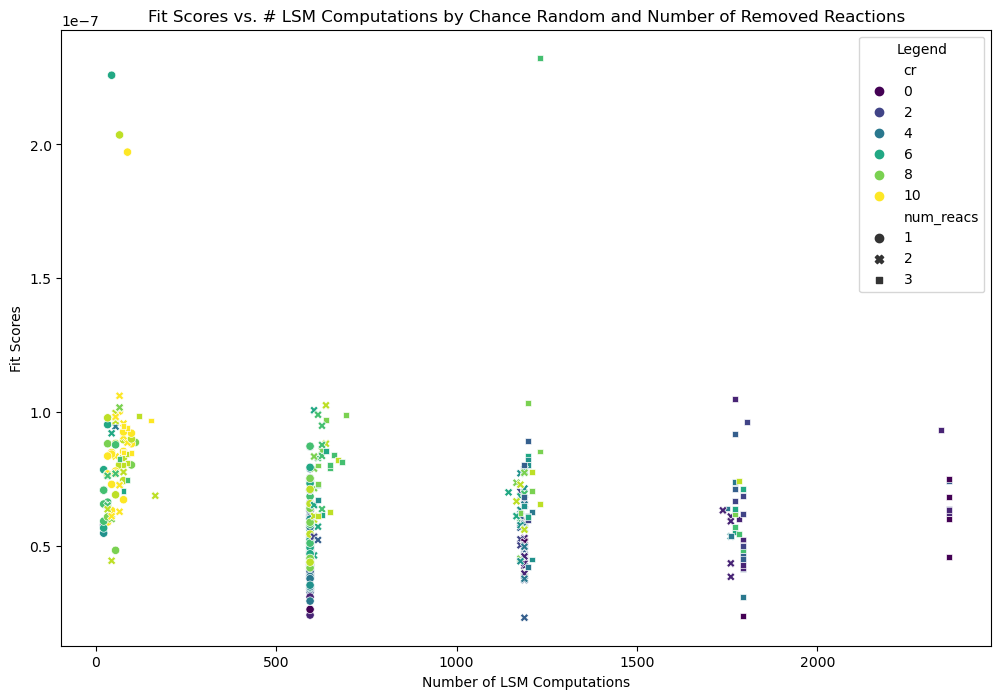

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect data from both experiments
all_experiments = []

# Process seed42 results
for _, row in results_df_efm_seed42.iterrows():
    num_reacs = row['num_reacs']
    cr = row['cr']
    df = row['dataframe']
    df['num_reacs'] = num_reacs
    df['cr'] = cr
    df['experiment'] = 'seed42'  # Add experiment identifier
    all_experiments.append(df)

# Process seed17 results
for _, row in results_df_efm_seed17.iterrows():
    num_reacs = row['num_reacs']
    cr = row['cr']
    df = row['dataframe']
    df['num_reacs'] = num_reacs
    df['cr'] = cr
    df['experiment'] = 'seed17'  # Add experiment identifier
    all_experiments.append(df)

# Combine into a single DataFrame
combined_df = pd.concat(all_experiments)

# Scatter Plot: Scores vs. Computation Time by Chance Random and Experiment
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=combined_df,
    x='Number of LSQ Computations',
    y='Scores',
    hue='cr',  # Differentiate experiments by color
    style='num_reacs',  # Use different markers for num_reacs
    palette='viridis'
)
plt.title('Fit Scores vs. # LSM Computations by Chance Random and Number of Removed Reactions')
plt.xlabel('Number of LSM Computations')
plt.ylabel('Fit Scores')
plt.legend(title='Legend')
plt.savefig("scatter_scores_vs_time_Combined_Model_DFKI.png", dpi=300, bbox_inches='tight')
plt.show()




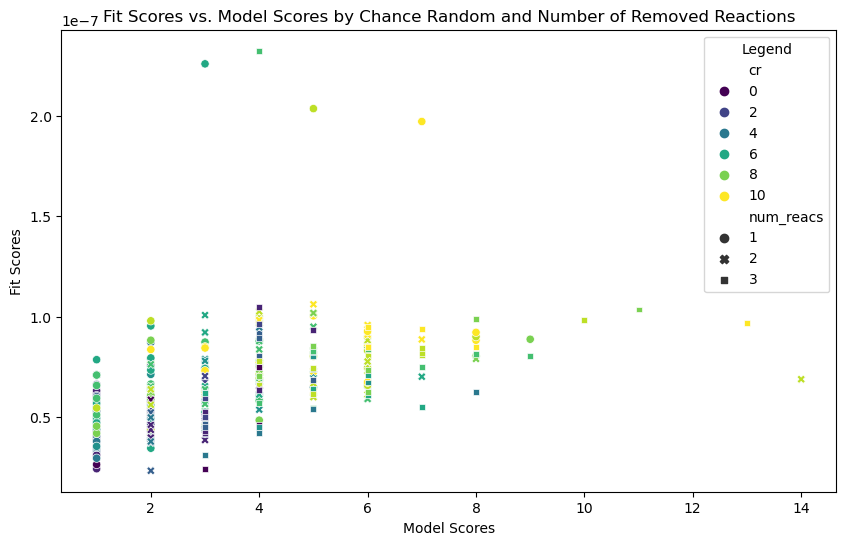

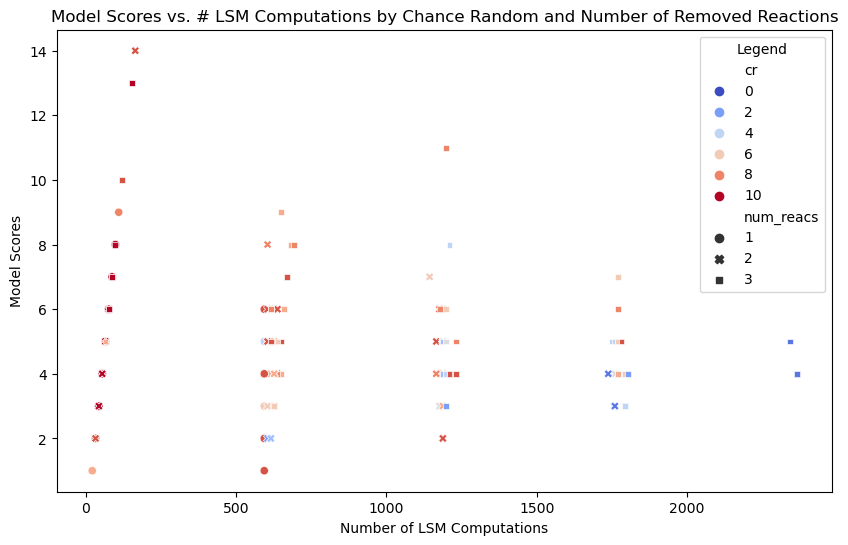

In [85]:
# Scatter Plot: Scores vs. Edit Distances by Temperature and Number of Reactions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_df,
    x='Edit Distances',
    y='Scores',
    hue='cr',
    style='num_reacs',
    palette='viridis'
)
plt.title('Fit Scores vs. Model Scores by Chance Random and Number of Removed Reactions')
plt.xlabel('Model Scores')
plt.ylabel('Fit Scores')
plt.legend(title='Legend')
plt.savefig("scatter_scores_vs_model_scores_DFKI.png", dpi=300, bbox_inches='tight')
plt.show()

# Scatter Plot: Edit Distances vs. Computation Times by Temperature and Number of Reactions
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_df,
    x='Number of LSQ Computations',
    y='Edit Distances',
    hue='cr',
    style='num_reacs',
    palette='coolwarm'
)
plt.title('Model Scores vs. # LSM Computations by Chance Random and Number of Removed Reactions')
plt.xlabel('Number of LSM Computations')
plt.ylabel('Model Scores')
plt.legend(title='Legend')
plt.savefig("scatter_model_scores_vs_computation_time_DFKI.png", dpi=300, bbox_inches='tight')
plt.show()


In [82]:
# Combining the results from the experiments executed with different random seeds.
merged_evo_df_efm = pd.concat([results_df_efm_seed42, results_df_efm_seed17], ignore_index=True)

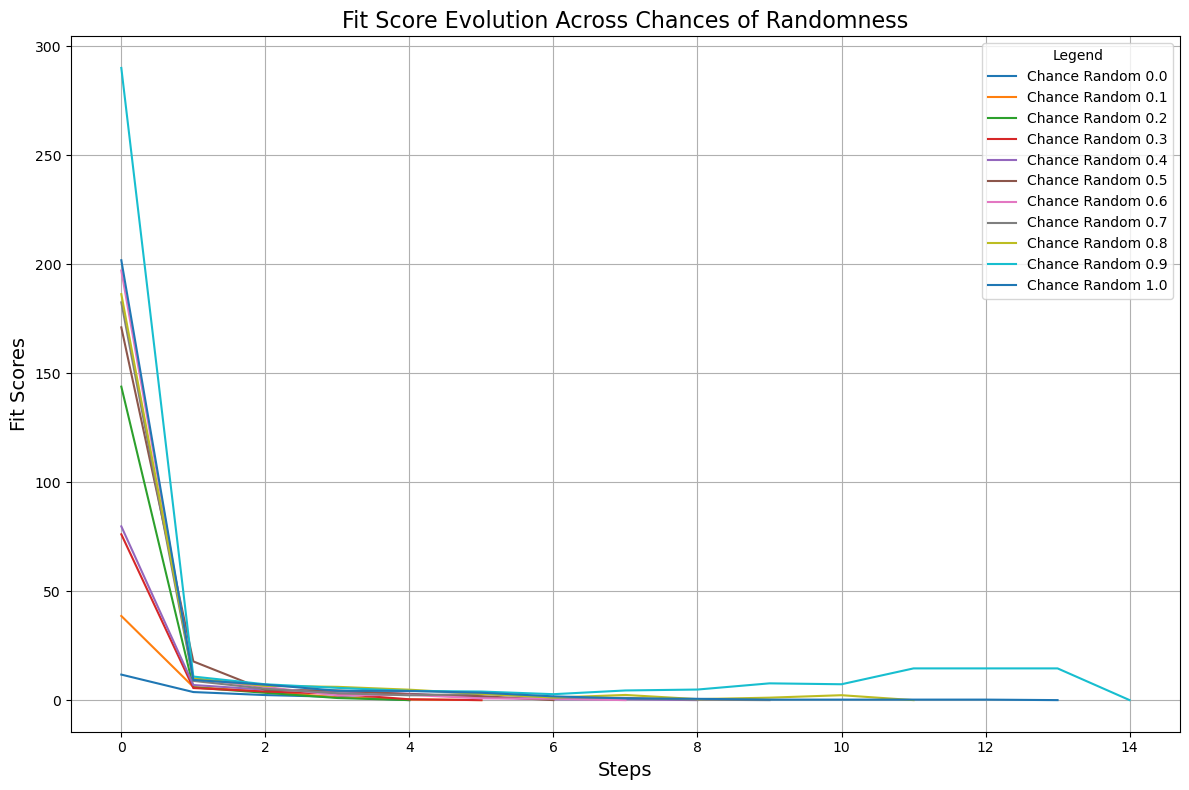

In [83]:
dataframes = merged_evo_df_efm
    
num_reacs_range = range(1,4)    
temp_range = range(0, 11)    
    
plt.figure(figsize=(12, 8))

for temp in temp_range:
    all_scores = []
    max_steps = 0

    for num_reacs in num_reacs_range:
        # Filter for the specific num_reacs and temp
        experiment_df = dataframes[(dataframes['num_reacs'] == num_reacs) & (dataframes['cr'] == temp)]

        if not experiment_df.empty:
            # Access the nested DataFrame for this combination
            for _, row in experiment_df.iterrows():
                nested_df = row['dataframe']  # Access the nested DataFrame
                if 'Score Evolutions' in nested_df.columns:
                    for scores in nested_df['Score Evolutions']:
                        max_steps = max(max_steps, len(scores))
                        all_scores.append(scores)

    # Compute mean scores at each step
    if all_scores:
        score_matrix = np.array(
            [np.pad(s, (0, max_steps - len(s)), constant_values=np.nan) for s in all_scores]
        )
        mean_scores = np.nanmean(score_matrix, axis=0)

        # Plot the mean scores for this temperature
        plt.plot(range(len(mean_scores)), mean_scores, label=f"Chance Random {temp/10}")

plt.xlabel("Steps", fontsize=14)
plt.ylabel("Fit Scores", fontsize=14)
plt.title("Fit Score Evolution Across Chances of Randomness", fontsize=16)
plt.legend(title="Legend", fontsize=10)
plt.grid(True)
plt.tight_layout()  # Sicherstellen, dass das Layout korrekt ist
plt.savefig("lines_scores_vs_steps_DFKI.png", dpi=300)  # Plot speichern
plt.show()  # Plot schließen    
